# Load Libraries

In [85]:
#Load Libraries
import os
import matplotlib
import matplotlib.pyplot as plt
import skimage.data
import cv2
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
import pandas as pd
from pandas import DataFrame
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import skimage
import seaborn as sns
import glob
from sklearn.metrics import precision_score,recall_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, f1_score

### Train and Test data Set Definition

In [86]:
Train_dir = "Images_Train"
Test_dir = "Images_Test"
directories =os.listdir(Train_dir)
directories_test = os.listdir(Test_dir)

### Function to read Train and Test Images 

In [87]:
def read_data(Root_dir,directories):
    images=[]
    labels=[]
    print (Root_dir)
    for directory in directories:
        label_dir = os.path.join(Root_dir, directory)
        print (label_dir)
        file_names = [os.path.join(label_dir,f) for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for file_name in file_names:
            print(file_name)
            images.append(skimage.io.imread(file_name))
            if (directory[-2]=='0'):
                labels.append(int(directory[-1:]))
                print(int(directory[-1:]))
            else:
                labels.append(int(directory[-2:]))
                print(int(directory[-2:]))
    return (images, labels)

## Load Train Data 

In [88]:
def read_data_test(Root_dir,directories):
    images=[]
    labels=[]
    print (Root_dir)
    file_names = [os.path.join(Root_dir,f) for f in os.listdir(Root_dir) if f.endswith(".ppm")]
    for file_name in file_names:
        print(file_name)
        images.append(skimage.io.imread(file_name))
        directory = file_name.split('\\')[1].split('.')[0]
        if (directory[-2]=='0'):
            labels.append(int(directory[-1:]))
            print(int(directory[-1:]))
        else:
            labels.append(int(directory[-2:]))
            print(int(directory[-2:]))
    return (images, labels)

In [89]:
X_train_list, y_train_list = read_data(Train_dir,directories)

Images_Train
Images_Train\00000
Images_Train\00000\00000_00000.ppm
0
Images_Train\00000\00000_00001.ppm
0
Images_Train\00000\00000_00002.ppm
0
Images_Train\00000\00000_00003.ppm
0
Images_Train\00000\00000_00004.ppm
0
Images_Train\00000\00000_00005.ppm
0
Images_Train\00000\00000_00006.ppm
0
Images_Train\00000\00000_00007.ppm
0
Images_Train\00000\00000_00008.ppm
0
Images_Train\00000\00000_00009.ppm
0
Images_Train\00000\00000_00010.ppm
0
Images_Train\00000\00000_00011.ppm
0
Images_Train\00000\00000_00012.ppm
0
Images_Train\00000\00000_00013.ppm
0
Images_Train\00000\00000_00014.ppm
0
Images_Train\00000\00000_00015.ppm
0
Images_Train\00000\00000_00016.ppm
0
Images_Train\00000\00000_00017.ppm
0
Images_Train\00000\00000_00018.ppm
0
Images_Train\00000\00000_00019.ppm
0
Images_Train\00000\00000_00020.ppm
0
Images_Train\00000\00000_00021.ppm
0
Images_Train\00000\00000_00022.ppm
0
Images_Train\00000\00000_00023.ppm
0
Images_Train\00000\00000_00024.ppm
0
Images_Train\00000\00000_00025.ppm
0
Images

1
Images_Train\00001\00000_00023.ppm
1
Images_Train\00001\00000_00024.ppm
1
Images_Train\00001\00000_00025.ppm
1
Images_Train\00001\00000_00026.ppm
1
Images_Train\00001\00000_00027.ppm
1
Images_Train\00001\00000_00028.ppm
1
Images_Train\00001\00000_00029.ppm
1
Images_Train\00001\00001_00000.ppm
1
Images_Train\00001\00001_00001.ppm
1
Images_Train\00001\00001_00002.ppm
1
Images_Train\00001\00001_00003.ppm
1
Images_Train\00001\00001_00004.ppm
1
Images_Train\00001\00001_00005.ppm
1
Images_Train\00001\00001_00006.ppm
1
Images_Train\00001\00001_00007.ppm
1
Images_Train\00001\00001_00008.ppm
1
Images_Train\00001\00001_00009.ppm
1
Images_Train\00001\00001_00010.ppm
1
Images_Train\00001\00001_00011.ppm
1
Images_Train\00001\00001_00012.ppm
1
Images_Train\00001\00001_00013.ppm
1
Images_Train\00001\00001_00014.ppm
1
Images_Train\00001\00001_00015.ppm
1
Images_Train\00001\00001_00016.ppm
1
Images_Train\00001\00001_00017.ppm
1
Images_Train\00001\00001_00018.ppm
1
Images_Train\00001\00001_00019.ppm
1

1
Images_Train\00001\00009_00001.ppm
1
Images_Train\00001\00009_00002.ppm
1
Images_Train\00001\00009_00003.ppm
1
Images_Train\00001\00009_00004.ppm
1
Images_Train\00001\00009_00005.ppm
1
Images_Train\00001\00009_00006.ppm
1
Images_Train\00001\00009_00007.ppm
1
Images_Train\00001\00009_00008.ppm
1
Images_Train\00001\00009_00009.ppm
1
Images_Train\00001\00009_00010.ppm
1
Images_Train\00001\00009_00011.ppm
1
Images_Train\00001\00009_00012.ppm
1
Images_Train\00001\00009_00013.ppm
1
Images_Train\00001\00009_00014.ppm
1
Images_Train\00001\00009_00015.ppm
1
Images_Train\00001\00009_00016.ppm
1
Images_Train\00001\00009_00017.ppm
1
Images_Train\00001\00009_00018.ppm
1
Images_Train\00001\00009_00019.ppm
1
Images_Train\00001\00009_00020.ppm
1
Images_Train\00001\00009_00021.ppm
1
Images_Train\00001\00009_00022.ppm
1
Images_Train\00001\00009_00023.ppm
1
Images_Train\00001\00009_00024.ppm
1
Images_Train\00001\00009_00025.ppm
1
Images_Train\00001\00009_00026.ppm
1
Images_Train\00001\00009_00027.ppm
1

1
Images_Train\00001\00017_00016.ppm
1
Images_Train\00001\00017_00017.ppm
1
Images_Train\00001\00017_00018.ppm
1
Images_Train\00001\00017_00019.ppm
1
Images_Train\00001\00017_00020.ppm
1
Images_Train\00001\00017_00021.ppm
1
Images_Train\00001\00017_00022.ppm
1
Images_Train\00001\00017_00023.ppm
1
Images_Train\00001\00017_00024.ppm
1
Images_Train\00001\00017_00025.ppm
1
Images_Train\00001\00017_00026.ppm
1
Images_Train\00001\00017_00027.ppm
1
Images_Train\00001\00017_00028.ppm
1
Images_Train\00001\00017_00029.ppm
1
Images_Train\00001\00018_00000.ppm
1
Images_Train\00001\00018_00001.ppm
1
Images_Train\00001\00018_00002.ppm
1
Images_Train\00001\00018_00003.ppm
1
Images_Train\00001\00018_00004.ppm
1
Images_Train\00001\00018_00005.ppm
1
Images_Train\00001\00018_00006.ppm
1
Images_Train\00001\00018_00007.ppm
1
Images_Train\00001\00018_00008.ppm
1
Images_Train\00001\00018_00009.ppm
1
Images_Train\00001\00018_00010.ppm
1
Images_Train\00001\00018_00011.ppm
1
Images_Train\00001\00018_00012.ppm
1

1
Images_Train\00001\00025_00015.ppm
1
Images_Train\00001\00025_00016.ppm
1
Images_Train\00001\00025_00017.ppm
1
Images_Train\00001\00025_00018.ppm
1
Images_Train\00001\00025_00019.ppm
1
Images_Train\00001\00025_00020.ppm
1
Images_Train\00001\00025_00021.ppm
1
Images_Train\00001\00025_00022.ppm
1
Images_Train\00001\00025_00023.ppm
1
Images_Train\00001\00025_00024.ppm
1
Images_Train\00001\00025_00025.ppm
1
Images_Train\00001\00025_00026.ppm
1
Images_Train\00001\00025_00027.ppm
1
Images_Train\00001\00025_00028.ppm
1
Images_Train\00001\00025_00029.ppm
1
Images_Train\00001\00026_00000.ppm
1
Images_Train\00001\00026_00001.ppm
1
Images_Train\00001\00026_00002.ppm
1
Images_Train\00001\00026_00003.ppm
1
Images_Train\00001\00026_00004.ppm
1
Images_Train\00001\00026_00005.ppm
1
Images_Train\00001\00026_00006.ppm
1
Images_Train\00001\00026_00007.ppm
1
Images_Train\00001\00026_00008.ppm
1
Images_Train\00001\00026_00009.ppm
1
Images_Train\00001\00026_00010.ppm
1
Images_Train\00001\00026_00011.ppm
1

1
Images_Train\00001\00033_00010.ppm
1
Images_Train\00001\00033_00011.ppm
1
Images_Train\00001\00033_00012.ppm
1
Images_Train\00001\00033_00013.ppm
1
Images_Train\00001\00033_00014.ppm
1
Images_Train\00001\00033_00015.ppm
1
Images_Train\00001\00033_00016.ppm
1
Images_Train\00001\00033_00017.ppm
1
Images_Train\00001\00033_00018.ppm
1
Images_Train\00001\00033_00019.ppm
1
Images_Train\00001\00033_00020.ppm
1
Images_Train\00001\00033_00021.ppm
1
Images_Train\00001\00033_00022.ppm
1
Images_Train\00001\00033_00023.ppm
1
Images_Train\00001\00033_00024.ppm
1
Images_Train\00001\00033_00025.ppm
1
Images_Train\00001\00033_00026.ppm
1
Images_Train\00001\00033_00027.ppm
1
Images_Train\00001\00033_00028.ppm
1
Images_Train\00001\00033_00029.ppm
1
Images_Train\00001\00034_00000.ppm
1
Images_Train\00001\00034_00001.ppm
1
Images_Train\00001\00034_00002.ppm
1
Images_Train\00001\00034_00003.ppm
1
Images_Train\00001\00034_00004.ppm
1
Images_Train\00001\00034_00005.ppm
1
Images_Train\00001\00034_00006.ppm
1

1
Images_Train\00001\00041_00027.ppm
1
Images_Train\00001\00041_00028.ppm
1
Images_Train\00001\00041_00029.ppm
1
Images_Train\00001\00042_00000.ppm
1
Images_Train\00001\00042_00001.ppm
1
Images_Train\00001\00042_00002.ppm
1
Images_Train\00001\00042_00003.ppm
1
Images_Train\00001\00042_00004.ppm
1
Images_Train\00001\00042_00005.ppm
1
Images_Train\00001\00042_00006.ppm
1
Images_Train\00001\00042_00007.ppm
1
Images_Train\00001\00042_00008.ppm
1
Images_Train\00001\00042_00009.ppm
1
Images_Train\00001\00042_00010.ppm
1
Images_Train\00001\00042_00011.ppm
1
Images_Train\00001\00042_00012.ppm
1
Images_Train\00001\00042_00013.ppm
1
Images_Train\00001\00042_00014.ppm
1
Images_Train\00001\00042_00015.ppm
1
Images_Train\00001\00042_00016.ppm
1
Images_Train\00001\00042_00017.ppm
1
Images_Train\00001\00042_00018.ppm
1
Images_Train\00001\00042_00019.ppm
1
Images_Train\00001\00042_00020.ppm
1
Images_Train\00001\00042_00021.ppm
1
Images_Train\00001\00042_00022.ppm
1
Images_Train\00001\00042_00023.ppm
1

1
Images_Train\00001\00050_00013.ppm
1
Images_Train\00001\00050_00014.ppm
1
Images_Train\00001\00050_00015.ppm
1
Images_Train\00001\00050_00016.ppm
1
Images_Train\00001\00050_00017.ppm
1
Images_Train\00001\00050_00018.ppm
1
Images_Train\00001\00050_00019.ppm
1
Images_Train\00001\00050_00020.ppm
1
Images_Train\00001\00050_00021.ppm
1
Images_Train\00001\00050_00022.ppm
1
Images_Train\00001\00050_00023.ppm
1
Images_Train\00001\00050_00024.ppm
1
Images_Train\00001\00050_00025.ppm
1
Images_Train\00001\00050_00026.ppm
1
Images_Train\00001\00050_00027.ppm
1
Images_Train\00001\00050_00028.ppm
1
Images_Train\00001\00050_00029.ppm
1
Images_Train\00001\00051_00000.ppm
1
Images_Train\00001\00051_00001.ppm
1
Images_Train\00001\00051_00002.ppm
1
Images_Train\00001\00051_00003.ppm
1
Images_Train\00001\00051_00004.ppm
1
Images_Train\00001\00051_00005.ppm
1
Images_Train\00001\00051_00006.ppm
1
Images_Train\00001\00051_00007.ppm
1
Images_Train\00001\00051_00008.ppm
1
Images_Train\00001\00051_00009.ppm
1

1
Images_Train\00001\00058_00027.ppm
1
Images_Train\00001\00058_00028.ppm
1
Images_Train\00001\00058_00029.ppm
1
Images_Train\00001\00059_00000.ppm
1
Images_Train\00001\00059_00001.ppm
1
Images_Train\00001\00059_00002.ppm
1
Images_Train\00001\00059_00003.ppm
1
Images_Train\00001\00059_00004.ppm
1
Images_Train\00001\00059_00005.ppm
1
Images_Train\00001\00059_00006.ppm
1
Images_Train\00001\00059_00007.ppm
1
Images_Train\00001\00059_00008.ppm
1
Images_Train\00001\00059_00009.ppm
1
Images_Train\00001\00059_00010.ppm
1
Images_Train\00001\00059_00011.ppm
1
Images_Train\00001\00059_00012.ppm
1
Images_Train\00001\00059_00013.ppm
1
Images_Train\00001\00059_00014.ppm
1
Images_Train\00001\00059_00015.ppm
1
Images_Train\00001\00059_00016.ppm
1
Images_Train\00001\00059_00017.ppm
1
Images_Train\00001\00059_00018.ppm
1
Images_Train\00001\00059_00019.ppm
1
Images_Train\00001\00059_00020.ppm
1
Images_Train\00001\00059_00021.ppm
1
Images_Train\00001\00059_00022.ppm
1
Images_Train\00001\00059_00023.ppm
1

1
Images_Train\00001\00067_00011.ppm
1
Images_Train\00001\00067_00012.ppm
1
Images_Train\00001\00067_00013.ppm
1
Images_Train\00001\00067_00014.ppm
1
Images_Train\00001\00067_00015.ppm
1
Images_Train\00001\00067_00016.ppm
1
Images_Train\00001\00067_00017.ppm
1
Images_Train\00001\00067_00018.ppm
1
Images_Train\00001\00067_00019.ppm
1
Images_Train\00001\00067_00020.ppm
1
Images_Train\00001\00067_00021.ppm
1
Images_Train\00001\00067_00022.ppm
1
Images_Train\00001\00067_00023.ppm
1
Images_Train\00001\00067_00024.ppm
1
Images_Train\00001\00067_00025.ppm
1
Images_Train\00001\00067_00026.ppm
1
Images_Train\00001\00067_00027.ppm
1
Images_Train\00001\00067_00028.ppm
1
Images_Train\00001\00067_00029.ppm
1
Images_Train\00001\00068_00000.ppm
1
Images_Train\00001\00068_00001.ppm
1
Images_Train\00001\00068_00002.ppm
1
Images_Train\00001\00068_00003.ppm
1
Images_Train\00001\00068_00004.ppm
1
Images_Train\00001\00068_00005.ppm
1
Images_Train\00001\00068_00006.ppm
1
Images_Train\00001\00068_00007.ppm
1

2
Images_Train\00002\00001_00014.ppm
2
Images_Train\00002\00001_00015.ppm
2
Images_Train\00002\00001_00016.ppm
2
Images_Train\00002\00001_00017.ppm
2
Images_Train\00002\00001_00018.ppm
2
Images_Train\00002\00001_00019.ppm
2
Images_Train\00002\00001_00020.ppm
2
Images_Train\00002\00001_00021.ppm
2
Images_Train\00002\00001_00022.ppm
2
Images_Train\00002\00001_00023.ppm
2
Images_Train\00002\00001_00024.ppm
2
Images_Train\00002\00001_00025.ppm
2
Images_Train\00002\00001_00026.ppm
2
Images_Train\00002\00001_00027.ppm
2
Images_Train\00002\00001_00028.ppm
2
Images_Train\00002\00001_00029.ppm
2
Images_Train\00002\00002_00000.ppm
2
Images_Train\00002\00002_00001.ppm
2
Images_Train\00002\00002_00002.ppm
2
Images_Train\00002\00002_00003.ppm
2
Images_Train\00002\00002_00004.ppm
2
Images_Train\00002\00002_00005.ppm
2
Images_Train\00002\00002_00006.ppm
2
Images_Train\00002\00002_00007.ppm
2
Images_Train\00002\00002_00008.ppm
2
Images_Train\00002\00002_00009.ppm
2
Images_Train\00002\00002_00010.ppm
2

2
Images_Train\00002\00010_00001.ppm
2
Images_Train\00002\00010_00002.ppm
2
Images_Train\00002\00010_00003.ppm
2
Images_Train\00002\00010_00004.ppm
2
Images_Train\00002\00010_00005.ppm
2
Images_Train\00002\00010_00006.ppm
2
Images_Train\00002\00010_00007.ppm
2
Images_Train\00002\00010_00008.ppm
2
Images_Train\00002\00010_00009.ppm
2
Images_Train\00002\00010_00010.ppm
2
Images_Train\00002\00010_00011.ppm
2
Images_Train\00002\00010_00012.ppm
2
Images_Train\00002\00010_00013.ppm
2
Images_Train\00002\00010_00014.ppm
2
Images_Train\00002\00010_00015.ppm
2
Images_Train\00002\00010_00016.ppm
2
Images_Train\00002\00010_00017.ppm
2
Images_Train\00002\00010_00018.ppm
2
Images_Train\00002\00010_00019.ppm
2
Images_Train\00002\00010_00020.ppm
2
Images_Train\00002\00010_00021.ppm
2
Images_Train\00002\00010_00022.ppm
2
Images_Train\00002\00010_00023.ppm
2
Images_Train\00002\00010_00024.ppm
2
Images_Train\00002\00010_00025.ppm
2
Images_Train\00002\00010_00026.ppm
2
Images_Train\00002\00010_00027.ppm
2

2
Images_Train\00002\00018_00015.ppm
2
Images_Train\00002\00018_00016.ppm
2
Images_Train\00002\00018_00017.ppm
2
Images_Train\00002\00018_00018.ppm
2
Images_Train\00002\00018_00019.ppm
2
Images_Train\00002\00018_00020.ppm
2
Images_Train\00002\00018_00021.ppm
2
Images_Train\00002\00018_00022.ppm
2
Images_Train\00002\00018_00023.ppm
2
Images_Train\00002\00018_00024.ppm
2
Images_Train\00002\00018_00025.ppm
2
Images_Train\00002\00018_00026.ppm
2
Images_Train\00002\00018_00027.ppm
2
Images_Train\00002\00018_00028.ppm
2
Images_Train\00002\00018_00029.ppm
2
Images_Train\00002\00019_00000.ppm
2
Images_Train\00002\00019_00001.ppm
2
Images_Train\00002\00019_00002.ppm
2
Images_Train\00002\00019_00003.ppm
2
Images_Train\00002\00019_00004.ppm
2
Images_Train\00002\00019_00005.ppm
2
Images_Train\00002\00019_00006.ppm
2
Images_Train\00002\00019_00007.ppm
2
Images_Train\00002\00019_00008.ppm
2
Images_Train\00002\00019_00009.ppm
2
Images_Train\00002\00019_00010.ppm
2
Images_Train\00002\00019_00011.ppm
2

2
Images_Train\00002\00027_00009.ppm
2
Images_Train\00002\00027_00010.ppm
2
Images_Train\00002\00027_00011.ppm
2
Images_Train\00002\00027_00012.ppm
2
Images_Train\00002\00027_00013.ppm
2
Images_Train\00002\00027_00014.ppm
2
Images_Train\00002\00027_00015.ppm
2
Images_Train\00002\00027_00016.ppm
2
Images_Train\00002\00027_00017.ppm
2
Images_Train\00002\00027_00018.ppm
2
Images_Train\00002\00027_00019.ppm
2
Images_Train\00002\00027_00020.ppm
2
Images_Train\00002\00027_00021.ppm
2
Images_Train\00002\00027_00022.ppm
2
Images_Train\00002\00027_00023.ppm
2
Images_Train\00002\00027_00024.ppm
2
Images_Train\00002\00027_00025.ppm
2
Images_Train\00002\00027_00026.ppm
2
Images_Train\00002\00027_00027.ppm
2
Images_Train\00002\00027_00028.ppm
2
Images_Train\00002\00027_00029.ppm
2
Images_Train\00002\00028_00000.ppm
2
Images_Train\00002\00028_00001.ppm
2
Images_Train\00002\00028_00002.ppm
2
Images_Train\00002\00028_00003.ppm
2
Images_Train\00002\00028_00004.ppm
2
Images_Train\00002\00028_00005.ppm
2

2
Images_Train\00002\00035_00029.ppm
2
Images_Train\00002\00036_00000.ppm
2
Images_Train\00002\00036_00001.ppm
2
Images_Train\00002\00036_00002.ppm
2
Images_Train\00002\00036_00003.ppm
2
Images_Train\00002\00036_00004.ppm
2
Images_Train\00002\00036_00005.ppm
2
Images_Train\00002\00036_00006.ppm
2
Images_Train\00002\00036_00007.ppm
2
Images_Train\00002\00036_00008.ppm
2
Images_Train\00002\00036_00009.ppm
2
Images_Train\00002\00036_00010.ppm
2
Images_Train\00002\00036_00011.ppm
2
Images_Train\00002\00036_00012.ppm
2
Images_Train\00002\00036_00013.ppm
2
Images_Train\00002\00036_00014.ppm
2
Images_Train\00002\00036_00015.ppm
2
Images_Train\00002\00036_00016.ppm
2
Images_Train\00002\00036_00017.ppm
2
Images_Train\00002\00036_00018.ppm
2
Images_Train\00002\00036_00019.ppm
2
Images_Train\00002\00036_00020.ppm
2
Images_Train\00002\00036_00021.ppm
2
Images_Train\00002\00036_00022.ppm
2
Images_Train\00002\00036_00023.ppm
2
Images_Train\00002\00036_00024.ppm
2
Images_Train\00002\00036_00025.ppm
2

2
Images_Train\00002\00044_00016.ppm
2
Images_Train\00002\00044_00017.ppm
2
Images_Train\00002\00044_00018.ppm
2
Images_Train\00002\00044_00019.ppm
2
Images_Train\00002\00044_00020.ppm
2
Images_Train\00002\00044_00021.ppm
2
Images_Train\00002\00044_00022.ppm
2
Images_Train\00002\00044_00023.ppm
2
Images_Train\00002\00044_00024.ppm
2
Images_Train\00002\00044_00025.ppm
2
Images_Train\00002\00044_00026.ppm
2
Images_Train\00002\00044_00027.ppm
2
Images_Train\00002\00044_00028.ppm
2
Images_Train\00002\00044_00029.ppm
2
Images_Train\00002\00045_00000.ppm
2
Images_Train\00002\00045_00001.ppm
2
Images_Train\00002\00045_00002.ppm
2
Images_Train\00002\00045_00003.ppm
2
Images_Train\00002\00045_00004.ppm
2
Images_Train\00002\00045_00005.ppm
2
Images_Train\00002\00045_00006.ppm
2
Images_Train\00002\00045_00007.ppm
2
Images_Train\00002\00045_00008.ppm
2
Images_Train\00002\00045_00009.ppm
2
Images_Train\00002\00045_00010.ppm
2
Images_Train\00002\00045_00011.ppm
2
Images_Train\00002\00045_00012.ppm
2

2
Images_Train\00002\00053_00001.ppm
2
Images_Train\00002\00053_00002.ppm
2
Images_Train\00002\00053_00003.ppm
2
Images_Train\00002\00053_00004.ppm
2
Images_Train\00002\00053_00005.ppm
2
Images_Train\00002\00053_00006.ppm
2
Images_Train\00002\00053_00007.ppm
2
Images_Train\00002\00053_00008.ppm
2
Images_Train\00002\00053_00009.ppm
2
Images_Train\00002\00053_00010.ppm
2
Images_Train\00002\00053_00011.ppm
2
Images_Train\00002\00053_00012.ppm
2
Images_Train\00002\00053_00013.ppm
2
Images_Train\00002\00053_00014.ppm
2
Images_Train\00002\00053_00015.ppm
2
Images_Train\00002\00053_00016.ppm
2
Images_Train\00002\00053_00017.ppm
2
Images_Train\00002\00053_00018.ppm
2
Images_Train\00002\00053_00019.ppm
2
Images_Train\00002\00053_00020.ppm
2
Images_Train\00002\00053_00021.ppm
2
Images_Train\00002\00053_00022.ppm
2
Images_Train\00002\00053_00023.ppm
2
Images_Train\00002\00053_00024.ppm
2
Images_Train\00002\00053_00025.ppm
2
Images_Train\00002\00053_00026.ppm
2
Images_Train\00002\00053_00027.ppm
2

2
Images_Train\00002\00061_00026.ppm
2
Images_Train\00002\00061_00027.ppm
2
Images_Train\00002\00061_00028.ppm
2
Images_Train\00002\00061_00029.ppm
2
Images_Train\00002\00062_00000.ppm
2
Images_Train\00002\00062_00001.ppm
2
Images_Train\00002\00062_00002.ppm
2
Images_Train\00002\00062_00003.ppm
2
Images_Train\00002\00062_00004.ppm
2
Images_Train\00002\00062_00005.ppm
2
Images_Train\00002\00062_00006.ppm
2
Images_Train\00002\00062_00007.ppm
2
Images_Train\00002\00062_00008.ppm
2
Images_Train\00002\00062_00009.ppm
2
Images_Train\00002\00062_00010.ppm
2
Images_Train\00002\00062_00011.ppm
2
Images_Train\00002\00062_00012.ppm
2
Images_Train\00002\00062_00013.ppm
2
Images_Train\00002\00062_00014.ppm
2
Images_Train\00002\00062_00015.ppm
2
Images_Train\00002\00062_00016.ppm
2
Images_Train\00002\00062_00017.ppm
2
Images_Train\00002\00062_00018.ppm
2
Images_Train\00002\00062_00019.ppm
2
Images_Train\00002\00062_00020.ppm
2
Images_Train\00002\00062_00021.ppm
2
Images_Train\00002\00062_00022.ppm
2

2
Images_Train\00002\00070_00014.ppm
2
Images_Train\00002\00070_00015.ppm
2
Images_Train\00002\00070_00016.ppm
2
Images_Train\00002\00070_00017.ppm
2
Images_Train\00002\00070_00018.ppm
2
Images_Train\00002\00070_00019.ppm
2
Images_Train\00002\00070_00020.ppm
2
Images_Train\00002\00070_00021.ppm
2
Images_Train\00002\00070_00022.ppm
2
Images_Train\00002\00070_00023.ppm
2
Images_Train\00002\00070_00024.ppm
2
Images_Train\00002\00070_00025.ppm
2
Images_Train\00002\00070_00026.ppm
2
Images_Train\00002\00070_00027.ppm
2
Images_Train\00002\00070_00028.ppm
2
Images_Train\00002\00070_00029.ppm
2
Images_Train\00002\00071_00000.ppm
2
Images_Train\00002\00071_00001.ppm
2
Images_Train\00002\00071_00002.ppm
2
Images_Train\00002\00071_00003.ppm
2
Images_Train\00002\00071_00004.ppm
2
Images_Train\00002\00071_00005.ppm
2
Images_Train\00002\00071_00006.ppm
2
Images_Train\00002\00071_00007.ppm
2
Images_Train\00002\00071_00008.ppm
2
Images_Train\00002\00071_00009.ppm
2
Images_Train\00002\00071_00010.ppm
2

3
Images_Train\00003\00003_00025.ppm
3
Images_Train\00003\00003_00026.ppm
3
Images_Train\00003\00003_00027.ppm
3
Images_Train\00003\00003_00028.ppm
3
Images_Train\00003\00003_00029.ppm
3
Images_Train\00003\00004_00000.ppm
3
Images_Train\00003\00004_00001.ppm
3
Images_Train\00003\00004_00002.ppm
3
Images_Train\00003\00004_00003.ppm
3
Images_Train\00003\00004_00004.ppm
3
Images_Train\00003\00004_00005.ppm
3
Images_Train\00003\00004_00006.ppm
3
Images_Train\00003\00004_00007.ppm
3
Images_Train\00003\00004_00008.ppm
3
Images_Train\00003\00004_00009.ppm
3
Images_Train\00003\00004_00010.ppm
3
Images_Train\00003\00004_00011.ppm
3
Images_Train\00003\00004_00012.ppm
3
Images_Train\00003\00004_00013.ppm
3
Images_Train\00003\00004_00014.ppm
3
Images_Train\00003\00004_00015.ppm
3
Images_Train\00003\00004_00016.ppm
3
Images_Train\00003\00004_00017.ppm
3
Images_Train\00003\00004_00018.ppm
3
Images_Train\00003\00004_00019.ppm
3
Images_Train\00003\00004_00020.ppm
3
Images_Train\00003\00004_00021.ppm
3

3
Images_Train\00003\00012_00013.ppm
3
Images_Train\00003\00012_00014.ppm
3
Images_Train\00003\00012_00015.ppm
3
Images_Train\00003\00012_00016.ppm
3
Images_Train\00003\00012_00017.ppm
3
Images_Train\00003\00012_00018.ppm
3
Images_Train\00003\00012_00019.ppm
3
Images_Train\00003\00012_00020.ppm
3
Images_Train\00003\00012_00021.ppm
3
Images_Train\00003\00012_00022.ppm
3
Images_Train\00003\00012_00023.ppm
3
Images_Train\00003\00012_00024.ppm
3
Images_Train\00003\00012_00025.ppm
3
Images_Train\00003\00012_00026.ppm
3
Images_Train\00003\00012_00027.ppm
3
Images_Train\00003\00012_00028.ppm
3
Images_Train\00003\00012_00029.ppm
3
Images_Train\00003\00013_00000.ppm
3
Images_Train\00003\00013_00001.ppm
3
Images_Train\00003\00013_00002.ppm
3
Images_Train\00003\00013_00003.ppm
3
Images_Train\00003\00013_00004.ppm
3
Images_Train\00003\00013_00005.ppm
3
Images_Train\00003\00013_00006.ppm
3
Images_Train\00003\00013_00007.ppm
3
Images_Train\00003\00013_00008.ppm
3
Images_Train\00003\00013_00009.ppm
3

3
Images_Train\00003\00021_00002.ppm
3
Images_Train\00003\00021_00003.ppm
3
Images_Train\00003\00021_00004.ppm
3
Images_Train\00003\00021_00005.ppm
3
Images_Train\00003\00021_00006.ppm
3
Images_Train\00003\00021_00007.ppm
3
Images_Train\00003\00021_00008.ppm
3
Images_Train\00003\00021_00009.ppm
3
Images_Train\00003\00021_00010.ppm
3
Images_Train\00003\00021_00011.ppm
3
Images_Train\00003\00021_00012.ppm
3
Images_Train\00003\00021_00013.ppm
3
Images_Train\00003\00021_00014.ppm
3
Images_Train\00003\00021_00015.ppm
3
Images_Train\00003\00021_00016.ppm
3
Images_Train\00003\00021_00017.ppm
3
Images_Train\00003\00021_00018.ppm
3
Images_Train\00003\00021_00019.ppm
3
Images_Train\00003\00021_00020.ppm
3
Images_Train\00003\00021_00021.ppm
3
Images_Train\00003\00021_00022.ppm
3
Images_Train\00003\00021_00023.ppm
3
Images_Train\00003\00021_00024.ppm
3
Images_Train\00003\00021_00025.ppm
3
Images_Train\00003\00021_00026.ppm
3
Images_Train\00003\00021_00027.ppm
3
Images_Train\00003\00021_00028.ppm
3

Images_Train\00003\00029_00023.ppm
3
Images_Train\00003\00029_00024.ppm
3
Images_Train\00003\00029_00025.ppm
3
Images_Train\00003\00029_00026.ppm
3
Images_Train\00003\00029_00027.ppm
3
Images_Train\00003\00029_00028.ppm
3
Images_Train\00003\00029_00029.ppm
3
Images_Train\00003\00030_00000.ppm
3
Images_Train\00003\00030_00001.ppm
3
Images_Train\00003\00030_00002.ppm
3
Images_Train\00003\00030_00003.ppm
3
Images_Train\00003\00030_00004.ppm
3
Images_Train\00003\00030_00005.ppm
3
Images_Train\00003\00030_00006.ppm
3
Images_Train\00003\00030_00007.ppm
3
Images_Train\00003\00030_00008.ppm
3
Images_Train\00003\00030_00009.ppm
3
Images_Train\00003\00030_00010.ppm
3
Images_Train\00003\00030_00011.ppm
3
Images_Train\00003\00030_00012.ppm
3
Images_Train\00003\00030_00013.ppm
3
Images_Train\00003\00030_00014.ppm
3
Images_Train\00003\00030_00015.ppm
3
Images_Train\00003\00030_00016.ppm
3
Images_Train\00003\00030_00017.ppm
3
Images_Train\00003\00030_00018.ppm
3
Images_Train\00003\00030_00019.ppm
3
I

3
Images_Train\00003\00038_00010.ppm
3
Images_Train\00003\00038_00011.ppm
3
Images_Train\00003\00038_00012.ppm
3
Images_Train\00003\00038_00013.ppm
3
Images_Train\00003\00038_00014.ppm
3
Images_Train\00003\00038_00015.ppm
3
Images_Train\00003\00038_00016.ppm
3
Images_Train\00003\00038_00017.ppm
3
Images_Train\00003\00038_00018.ppm
3
Images_Train\00003\00038_00019.ppm
3
Images_Train\00003\00038_00020.ppm
3
Images_Train\00003\00038_00021.ppm
3
Images_Train\00003\00038_00022.ppm
3
Images_Train\00003\00038_00023.ppm
3
Images_Train\00003\00038_00024.ppm
3
Images_Train\00003\00038_00025.ppm
3
Images_Train\00003\00038_00026.ppm
3
Images_Train\00003\00038_00027.ppm
3
Images_Train\00003\00038_00028.ppm
3
Images_Train\00003\00038_00029.ppm
3
Images_Train\00003\00039_00000.ppm
3
Images_Train\00003\00039_00001.ppm
3
Images_Train\00003\00039_00002.ppm
3
Images_Train\00003\00039_00003.ppm
3
Images_Train\00003\00039_00004.ppm
3
Images_Train\00003\00039_00005.ppm
3
Images_Train\00003\00039_00006.ppm
3

3
Images_Train\00003\00046_00020.ppm
3
Images_Train\00003\00046_00021.ppm
3
Images_Train\00003\00046_00022.ppm
3
Images_Train\00003\00046_00023.ppm
3
Images_Train\00003\00046_00024.ppm
3
Images_Train\00003\00046_00025.ppm
3
Images_Train\00003\00046_00026.ppm
3
Images_Train\00003\00046_00027.ppm
3
Images_Train\00003\00046_00028.ppm
3
Images_Train\00003\00046_00029.ppm
3
Images_Train\00004
Images_Train\00004\00000_00000.ppm
4
Images_Train\00004\00000_00001.ppm
4
Images_Train\00004\00000_00002.ppm
4
Images_Train\00004\00000_00003.ppm
4
Images_Train\00004\00000_00004.ppm
4
Images_Train\00004\00000_00005.ppm
4
Images_Train\00004\00000_00006.ppm
4
Images_Train\00004\00000_00007.ppm
4
Images_Train\00004\00000_00008.ppm
4
Images_Train\00004\00000_00009.ppm
4
Images_Train\00004\00000_00010.ppm
4
Images_Train\00004\00000_00011.ppm
4
Images_Train\00004\00000_00012.ppm
4
Images_Train\00004\00000_00013.ppm
4
Images_Train\00004\00000_00014.ppm
4
Images_Train\00004\00000_00015.ppm
4
Images_Train\0000

4
Images_Train\00004\00007_00028.ppm
4
Images_Train\00004\00007_00029.ppm
4
Images_Train\00004\00008_00000.ppm
4
Images_Train\00004\00008_00001.ppm
4
Images_Train\00004\00008_00002.ppm
4
Images_Train\00004\00008_00003.ppm
4
Images_Train\00004\00008_00004.ppm
4
Images_Train\00004\00008_00005.ppm
4
Images_Train\00004\00008_00006.ppm
4
Images_Train\00004\00008_00007.ppm
4
Images_Train\00004\00008_00008.ppm
4
Images_Train\00004\00008_00009.ppm
4
Images_Train\00004\00008_00010.ppm
4
Images_Train\00004\00008_00011.ppm
4
Images_Train\00004\00008_00012.ppm
4
Images_Train\00004\00008_00013.ppm
4
Images_Train\00004\00008_00014.ppm
4
Images_Train\00004\00008_00015.ppm
4
Images_Train\00004\00008_00016.ppm
4
Images_Train\00004\00008_00017.ppm
4
Images_Train\00004\00008_00018.ppm
4
Images_Train\00004\00008_00019.ppm
4
Images_Train\00004\00008_00020.ppm
4
Images_Train\00004\00008_00021.ppm
4
Images_Train\00004\00008_00022.ppm
4
Images_Train\00004\00008_00023.ppm
4
Images_Train\00004\00008_00024.ppm
4

4
Images_Train\00004\00015_00028.ppm
4
Images_Train\00004\00015_00029.ppm
4
Images_Train\00004\00016_00000.ppm
4
Images_Train\00004\00016_00001.ppm
4
Images_Train\00004\00016_00002.ppm
4
Images_Train\00004\00016_00003.ppm
4
Images_Train\00004\00016_00004.ppm
4
Images_Train\00004\00016_00005.ppm
4
Images_Train\00004\00016_00006.ppm
4
Images_Train\00004\00016_00007.ppm
4
Images_Train\00004\00016_00008.ppm
4
Images_Train\00004\00016_00009.ppm
4
Images_Train\00004\00016_00010.ppm
4
Images_Train\00004\00016_00011.ppm
4
Images_Train\00004\00016_00012.ppm
4
Images_Train\00004\00016_00013.ppm
4
Images_Train\00004\00016_00014.ppm
4
Images_Train\00004\00016_00015.ppm
4
Images_Train\00004\00016_00016.ppm
4
Images_Train\00004\00016_00017.ppm
4
Images_Train\00004\00016_00018.ppm
4
Images_Train\00004\00016_00019.ppm
4
Images_Train\00004\00016_00020.ppm
4
Images_Train\00004\00016_00021.ppm
4
Images_Train\00004\00016_00022.ppm
4
Images_Train\00004\00016_00023.ppm
4
Images_Train\00004\00016_00024.ppm
4

4
Images_Train\00004\00024_00019.ppm
4
Images_Train\00004\00024_00020.ppm
4
Images_Train\00004\00024_00021.ppm
4
Images_Train\00004\00024_00022.ppm
4
Images_Train\00004\00024_00023.ppm
4
Images_Train\00004\00024_00024.ppm
4
Images_Train\00004\00024_00025.ppm
4
Images_Train\00004\00024_00026.ppm
4
Images_Train\00004\00024_00027.ppm
4
Images_Train\00004\00024_00028.ppm
4
Images_Train\00004\00024_00029.ppm
4
Images_Train\00004\00025_00000.ppm
4
Images_Train\00004\00025_00001.ppm
4
Images_Train\00004\00025_00002.ppm
4
Images_Train\00004\00025_00003.ppm
4
Images_Train\00004\00025_00004.ppm
4
Images_Train\00004\00025_00005.ppm
4
Images_Train\00004\00025_00006.ppm
4
Images_Train\00004\00025_00007.ppm
4
Images_Train\00004\00025_00008.ppm
4
Images_Train\00004\00025_00009.ppm
4
Images_Train\00004\00025_00010.ppm
4
Images_Train\00004\00025_00011.ppm
4
Images_Train\00004\00025_00012.ppm
4
Images_Train\00004\00025_00013.ppm
4
Images_Train\00004\00025_00014.ppm
4
Images_Train\00004\00025_00015.ppm
4

4
Images_Train\00004\00033_00007.ppm
4
Images_Train\00004\00033_00008.ppm
4
Images_Train\00004\00033_00009.ppm
4
Images_Train\00004\00033_00010.ppm
4
Images_Train\00004\00033_00011.ppm
4
Images_Train\00004\00033_00012.ppm
4
Images_Train\00004\00033_00013.ppm
4
Images_Train\00004\00033_00014.ppm
4
Images_Train\00004\00033_00015.ppm
4
Images_Train\00004\00033_00016.ppm
4
Images_Train\00004\00033_00017.ppm
4
Images_Train\00004\00033_00018.ppm
4
Images_Train\00004\00033_00019.ppm
4
Images_Train\00004\00033_00020.ppm
4
Images_Train\00004\00033_00021.ppm
4
Images_Train\00004\00033_00022.ppm
4
Images_Train\00004\00033_00023.ppm
4
Images_Train\00004\00033_00024.ppm
4
Images_Train\00004\00033_00025.ppm
4
Images_Train\00004\00033_00026.ppm
4
Images_Train\00004\00033_00027.ppm
4
Images_Train\00004\00033_00028.ppm
4
Images_Train\00004\00033_00029.ppm
4
Images_Train\00004\00034_00000.ppm
4
Images_Train\00004\00034_00001.ppm
4
Images_Train\00004\00034_00002.ppm
4
Images_Train\00004\00034_00003.ppm
4

4
Images_Train\00004\00041_00024.ppm
4
Images_Train\00004\00041_00025.ppm
4
Images_Train\00004\00041_00026.ppm
4
Images_Train\00004\00041_00027.ppm
4
Images_Train\00004\00041_00028.ppm
4
Images_Train\00004\00041_00029.ppm
4
Images_Train\00004\00042_00000.ppm
4
Images_Train\00004\00042_00001.ppm
4
Images_Train\00004\00042_00002.ppm
4
Images_Train\00004\00042_00003.ppm
4
Images_Train\00004\00042_00004.ppm
4
Images_Train\00004\00042_00005.ppm
4
Images_Train\00004\00042_00006.ppm
4
Images_Train\00004\00042_00007.ppm
4
Images_Train\00004\00042_00008.ppm
4
Images_Train\00004\00042_00009.ppm
4
Images_Train\00004\00042_00010.ppm
4
Images_Train\00004\00042_00011.ppm
4
Images_Train\00004\00042_00012.ppm
4
Images_Train\00004\00042_00013.ppm
4
Images_Train\00004\00042_00014.ppm
4
Images_Train\00004\00042_00015.ppm
4
Images_Train\00004\00042_00016.ppm
4
Images_Train\00004\00042_00017.ppm
4
Images_Train\00004\00042_00018.ppm
4
Images_Train\00004\00042_00019.ppm
4
Images_Train\00004\00042_00020.ppm
4

4
Images_Train\00004\00050_00013.ppm
4
Images_Train\00004\00050_00014.ppm
4
Images_Train\00004\00050_00015.ppm
4
Images_Train\00004\00050_00016.ppm
4
Images_Train\00004\00050_00017.ppm
4
Images_Train\00004\00050_00018.ppm
4
Images_Train\00004\00050_00019.ppm
4
Images_Train\00004\00050_00020.ppm
4
Images_Train\00004\00050_00021.ppm
4
Images_Train\00004\00050_00022.ppm
4
Images_Train\00004\00050_00023.ppm
4
Images_Train\00004\00050_00024.ppm
4
Images_Train\00004\00050_00025.ppm
4
Images_Train\00004\00050_00026.ppm
4
Images_Train\00004\00050_00027.ppm
4
Images_Train\00004\00050_00028.ppm
4
Images_Train\00004\00050_00029.ppm
4
Images_Train\00004\00051_00000.ppm
4
Images_Train\00004\00051_00001.ppm
4
Images_Train\00004\00051_00002.ppm
4
Images_Train\00004\00051_00003.ppm
4
Images_Train\00004\00051_00004.ppm
4
Images_Train\00004\00051_00005.ppm
4
Images_Train\00004\00051_00006.ppm
4
Images_Train\00004\00051_00007.ppm
4
Images_Train\00004\00051_00008.ppm
4
Images_Train\00004\00051_00009.ppm
4

4
Images_Train\00004\00059_00004.ppm
4
Images_Train\00004\00059_00005.ppm
4
Images_Train\00004\00059_00006.ppm
4
Images_Train\00004\00059_00007.ppm
4
Images_Train\00004\00059_00008.ppm
4
Images_Train\00004\00059_00009.ppm
4
Images_Train\00004\00059_00010.ppm
4
Images_Train\00004\00059_00011.ppm
4
Images_Train\00004\00059_00012.ppm
4
Images_Train\00004\00059_00013.ppm
4
Images_Train\00004\00059_00014.ppm
4
Images_Train\00004\00059_00015.ppm
4
Images_Train\00004\00059_00016.ppm
4
Images_Train\00004\00059_00017.ppm
4
Images_Train\00004\00059_00018.ppm
4
Images_Train\00004\00059_00019.ppm
4
Images_Train\00004\00059_00020.ppm
4
Images_Train\00004\00059_00021.ppm
4
Images_Train\00004\00059_00022.ppm
4
Images_Train\00004\00059_00023.ppm
4
Images_Train\00004\00059_00024.ppm
4
Images_Train\00004\00059_00025.ppm
4
Images_Train\00004\00059_00026.ppm
4
Images_Train\00004\00059_00027.ppm
4
Images_Train\00004\00059_00028.ppm
4
Images_Train\00004\00059_00029.ppm
4
Images_Train\00004\00060_00000.ppm
4

5
Images_Train\00005\00001_00013.ppm
5
Images_Train\00005\00001_00014.ppm
5
Images_Train\00005\00001_00015.ppm
5
Images_Train\00005\00001_00016.ppm
5
Images_Train\00005\00001_00017.ppm
5
Images_Train\00005\00001_00018.ppm
5
Images_Train\00005\00001_00019.ppm
5
Images_Train\00005\00001_00020.ppm
5
Images_Train\00005\00001_00021.ppm
5
Images_Train\00005\00001_00022.ppm
5
Images_Train\00005\00001_00023.ppm
5
Images_Train\00005\00001_00024.ppm
5
Images_Train\00005\00001_00025.ppm
5
Images_Train\00005\00001_00026.ppm
5
Images_Train\00005\00001_00027.ppm
5
Images_Train\00005\00001_00028.ppm
5
Images_Train\00005\00001_00029.ppm
5
Images_Train\00005\00002_00000.ppm
5
Images_Train\00005\00002_00001.ppm
5
Images_Train\00005\00002_00002.ppm
5
Images_Train\00005\00002_00003.ppm
5
Images_Train\00005\00002_00004.ppm
5
Images_Train\00005\00002_00005.ppm
5
Images_Train\00005\00002_00006.ppm
5
Images_Train\00005\00002_00007.ppm
5
Images_Train\00005\00002_00008.ppm
5
Images_Train\00005\00002_00009.ppm
5

5
Images_Train\00005\00010_00004.ppm
5
Images_Train\00005\00010_00005.ppm
5
Images_Train\00005\00010_00006.ppm
5
Images_Train\00005\00010_00007.ppm
5
Images_Train\00005\00010_00008.ppm
5
Images_Train\00005\00010_00009.ppm
5
Images_Train\00005\00010_00010.ppm
5
Images_Train\00005\00010_00011.ppm
5
Images_Train\00005\00010_00012.ppm
5
Images_Train\00005\00010_00013.ppm
5
Images_Train\00005\00010_00014.ppm
5
Images_Train\00005\00010_00015.ppm
5
Images_Train\00005\00010_00016.ppm
5
Images_Train\00005\00010_00017.ppm
5
Images_Train\00005\00010_00018.ppm
5
Images_Train\00005\00010_00019.ppm
5
Images_Train\00005\00010_00020.ppm
5
Images_Train\00005\00010_00021.ppm
5
Images_Train\00005\00010_00022.ppm
5
Images_Train\00005\00010_00023.ppm
5
Images_Train\00005\00010_00024.ppm
5
Images_Train\00005\00010_00025.ppm
5
Images_Train\00005\00010_00026.ppm
5
Images_Train\00005\00010_00027.ppm
5
Images_Train\00005\00010_00028.ppm
5
Images_Train\00005\00010_00029.ppm
5
Images_Train\00005\00011_00000.ppm
5

5
Images_Train\00005\00018_00022.ppm
5
Images_Train\00005\00018_00023.ppm
5
Images_Train\00005\00018_00024.ppm
5
Images_Train\00005\00018_00025.ppm
5
Images_Train\00005\00018_00026.ppm
5
Images_Train\00005\00018_00027.ppm
5
Images_Train\00005\00018_00028.ppm
5
Images_Train\00005\00018_00029.ppm
5
Images_Train\00005\00019_00000.ppm
5
Images_Train\00005\00019_00001.ppm
5
Images_Train\00005\00019_00002.ppm
5
Images_Train\00005\00019_00003.ppm
5
Images_Train\00005\00019_00004.ppm
5
Images_Train\00005\00019_00005.ppm
5
Images_Train\00005\00019_00006.ppm
5
Images_Train\00005\00019_00007.ppm
5
Images_Train\00005\00019_00008.ppm
5
Images_Train\00005\00019_00009.ppm
5
Images_Train\00005\00019_00010.ppm
5
Images_Train\00005\00019_00011.ppm
5
Images_Train\00005\00019_00012.ppm
5
Images_Train\00005\00019_00013.ppm
5
Images_Train\00005\00019_00014.ppm
5
Images_Train\00005\00019_00015.ppm
5
Images_Train\00005\00019_00016.ppm
5
Images_Train\00005\00019_00017.ppm
5
Images_Train\00005\00019_00018.ppm
5

5
Images_Train\00005\00027_00018.ppm
5
Images_Train\00005\00027_00019.ppm
5
Images_Train\00005\00027_00020.ppm
5
Images_Train\00005\00027_00021.ppm
5
Images_Train\00005\00027_00022.ppm
5
Images_Train\00005\00027_00023.ppm
5
Images_Train\00005\00027_00024.ppm
5
Images_Train\00005\00027_00025.ppm
5
Images_Train\00005\00027_00026.ppm
5
Images_Train\00005\00027_00027.ppm
5
Images_Train\00005\00027_00028.ppm
5
Images_Train\00005\00027_00029.ppm
5
Images_Train\00005\00028_00000.ppm
5
Images_Train\00005\00028_00001.ppm
5
Images_Train\00005\00028_00002.ppm
5
Images_Train\00005\00028_00003.ppm
5
Images_Train\00005\00028_00004.ppm
5
Images_Train\00005\00028_00005.ppm
5
Images_Train\00005\00028_00006.ppm
5
Images_Train\00005\00028_00007.ppm
5
Images_Train\00005\00028_00008.ppm
5
Images_Train\00005\00028_00009.ppm
5
Images_Train\00005\00028_00010.ppm
5
Images_Train\00005\00028_00011.ppm
5
Images_Train\00005\00028_00012.ppm
5
Images_Train\00005\00028_00013.ppm
5
Images_Train\00005\00028_00014.ppm
5

5
Images_Train\00005\00036_00002.ppm
5
Images_Train\00005\00036_00003.ppm
5
Images_Train\00005\00036_00004.ppm
5
Images_Train\00005\00036_00005.ppm
5
Images_Train\00005\00036_00006.ppm
5
Images_Train\00005\00036_00007.ppm
5
Images_Train\00005\00036_00008.ppm
5
Images_Train\00005\00036_00009.ppm
5
Images_Train\00005\00036_00010.ppm
5
Images_Train\00005\00036_00011.ppm
5
Images_Train\00005\00036_00012.ppm
5
Images_Train\00005\00036_00013.ppm
5
Images_Train\00005\00036_00014.ppm
5
Images_Train\00005\00036_00015.ppm
5
Images_Train\00005\00036_00016.ppm
5
Images_Train\00005\00036_00017.ppm
5
Images_Train\00005\00036_00018.ppm
5
Images_Train\00005\00036_00019.ppm
5
Images_Train\00005\00036_00020.ppm
5
Images_Train\00005\00036_00021.ppm
5
Images_Train\00005\00036_00022.ppm
5
Images_Train\00005\00036_00023.ppm
5
Images_Train\00005\00036_00024.ppm
5
Images_Train\00005\00036_00025.ppm
5
Images_Train\00005\00036_00026.ppm
5
Images_Train\00005\00036_00027.ppm
5
Images_Train\00005\00036_00028.ppm
5

5
Images_Train\00005\00044_00019.ppm
5
Images_Train\00005\00044_00020.ppm
5
Images_Train\00005\00044_00021.ppm
5
Images_Train\00005\00044_00022.ppm
5
Images_Train\00005\00044_00023.ppm
5
Images_Train\00005\00044_00024.ppm
5
Images_Train\00005\00044_00025.ppm
5
Images_Train\00005\00044_00026.ppm
5
Images_Train\00005\00044_00027.ppm
5
Images_Train\00005\00044_00028.ppm
5
Images_Train\00005\00044_00029.ppm
5
Images_Train\00005\00045_00000.ppm
5
Images_Train\00005\00045_00001.ppm
5
Images_Train\00005\00045_00002.ppm
5
Images_Train\00005\00045_00003.ppm
5
Images_Train\00005\00045_00004.ppm
5
Images_Train\00005\00045_00005.ppm
5
Images_Train\00005\00045_00006.ppm
5
Images_Train\00005\00045_00007.ppm
5
Images_Train\00005\00045_00008.ppm
5
Images_Train\00005\00045_00009.ppm
5
Images_Train\00005\00045_00010.ppm
5
Images_Train\00005\00045_00011.ppm
5
Images_Train\00005\00045_00012.ppm
5
Images_Train\00005\00045_00013.ppm
5
Images_Train\00005\00045_00014.ppm
5
Images_Train\00005\00045_00015.ppm
5

5
Images_Train\00005\00053_00008.ppm
5
Images_Train\00005\00053_00009.ppm
5
Images_Train\00005\00053_00010.ppm
5
Images_Train\00005\00053_00011.ppm
5
Images_Train\00005\00053_00012.ppm
5
Images_Train\00005\00053_00013.ppm
5
Images_Train\00005\00053_00014.ppm
5
Images_Train\00005\00053_00015.ppm
5
Images_Train\00005\00053_00016.ppm
5
Images_Train\00005\00053_00017.ppm
5
Images_Train\00005\00053_00018.ppm
5
Images_Train\00005\00053_00019.ppm
5
Images_Train\00005\00053_00020.ppm
5
Images_Train\00005\00053_00021.ppm
5
Images_Train\00005\00053_00022.ppm
5
Images_Train\00005\00053_00023.ppm
5
Images_Train\00005\00053_00024.ppm
5
Images_Train\00005\00053_00025.ppm
5
Images_Train\00005\00053_00026.ppm
5
Images_Train\00005\00053_00027.ppm
5
Images_Train\00005\00053_00028.ppm
5
Images_Train\00005\00053_00029.ppm
5
Images_Train\00005\00054_00000.ppm
5
Images_Train\00005\00054_00001.ppm
5
Images_Train\00005\00054_00002.ppm
5
Images_Train\00005\00054_00003.ppm
5
Images_Train\00005\00054_00004.ppm
5

5
Images_Train\00005\00061_00028.ppm
5
Images_Train\00005\00061_00029.ppm
5
Images_Train\00006
Images_Train\00006\00000_00000.ppm
6
Images_Train\00006\00000_00001.ppm
6
Images_Train\00006\00000_00002.ppm
6
Images_Train\00006\00000_00003.ppm
6
Images_Train\00006\00000_00004.ppm
6
Images_Train\00006\00000_00005.ppm
6
Images_Train\00006\00000_00006.ppm
6
Images_Train\00006\00000_00007.ppm
6
Images_Train\00006\00000_00008.ppm
6
Images_Train\00006\00000_00009.ppm
6
Images_Train\00006\00000_00010.ppm
6
Images_Train\00006\00000_00011.ppm
6
Images_Train\00006\00000_00012.ppm
6
Images_Train\00006\00000_00013.ppm
6
Images_Train\00006\00000_00014.ppm
6
Images_Train\00006\00000_00015.ppm
6
Images_Train\00006\00000_00016.ppm
6
Images_Train\00006\00000_00017.ppm
6
Images_Train\00006\00000_00018.ppm
6
Images_Train\00006\00000_00019.ppm
6
Images_Train\00006\00000_00020.ppm
6
Images_Train\00006\00000_00021.ppm
6
Images_Train\00006\00000_00022.ppm
6
Images_Train\00006\00000_00023.ppm
6
Images_Train\0000

6
Images_Train\00006\00008_00018.ppm
6
Images_Train\00006\00008_00019.ppm
6
Images_Train\00006\00008_00020.ppm
6
Images_Train\00006\00008_00021.ppm
6
Images_Train\00006\00008_00022.ppm
6
Images_Train\00006\00008_00023.ppm
6
Images_Train\00006\00008_00024.ppm
6
Images_Train\00006\00008_00025.ppm
6
Images_Train\00006\00008_00026.ppm
6
Images_Train\00006\00008_00027.ppm
6
Images_Train\00006\00008_00028.ppm
6
Images_Train\00006\00008_00029.ppm
6
Images_Train\00006\00009_00000.ppm
6
Images_Train\00006\00009_00001.ppm
6
Images_Train\00006\00009_00002.ppm
6
Images_Train\00006\00009_00003.ppm
6
Images_Train\00006\00009_00004.ppm
6
Images_Train\00006\00009_00005.ppm
6
Images_Train\00006\00009_00006.ppm
6
Images_Train\00006\00009_00007.ppm
6
Images_Train\00006\00009_00008.ppm
6
Images_Train\00006\00009_00009.ppm
6
Images_Train\00006\00009_00010.ppm
6
Images_Train\00006\00009_00011.ppm
6
Images_Train\00006\00009_00012.ppm
6
Images_Train\00006\00009_00013.ppm
6
Images_Train\00006\00009_00014.ppm
6

7
Images_Train\00007\00002_00023.ppm
7
Images_Train\00007\00002_00024.ppm
7
Images_Train\00007\00002_00025.ppm
7
Images_Train\00007\00002_00026.ppm
7
Images_Train\00007\00002_00027.ppm
7
Images_Train\00007\00002_00028.ppm
7
Images_Train\00007\00002_00029.ppm
7
Images_Train\00007\00003_00000.ppm
7
Images_Train\00007\00003_00001.ppm
7
Images_Train\00007\00003_00002.ppm
7
Images_Train\00007\00003_00003.ppm
7
Images_Train\00007\00003_00004.ppm
7
Images_Train\00007\00003_00005.ppm
7
Images_Train\00007\00003_00006.ppm
7
Images_Train\00007\00003_00007.ppm
7
Images_Train\00007\00003_00008.ppm
7
Images_Train\00007\00003_00009.ppm
7
Images_Train\00007\00003_00010.ppm
7
Images_Train\00007\00003_00011.ppm
7
Images_Train\00007\00003_00012.ppm
7
Images_Train\00007\00003_00013.ppm
7
Images_Train\00007\00003_00014.ppm
7
Images_Train\00007\00003_00015.ppm
7
Images_Train\00007\00003_00016.ppm
7
Images_Train\00007\00003_00017.ppm
7
Images_Train\00007\00003_00018.ppm
7
Images_Train\00007\00003_00019.ppm
7

7
Images_Train\00007\00011_00008.ppm
7
Images_Train\00007\00011_00009.ppm
7
Images_Train\00007\00011_00010.ppm
7
Images_Train\00007\00011_00011.ppm
7
Images_Train\00007\00011_00012.ppm
7
Images_Train\00007\00011_00013.ppm
7
Images_Train\00007\00011_00014.ppm
7
Images_Train\00007\00011_00015.ppm
7
Images_Train\00007\00011_00016.ppm
7
Images_Train\00007\00011_00017.ppm
7
Images_Train\00007\00011_00018.ppm
7
Images_Train\00007\00011_00019.ppm
7
Images_Train\00007\00011_00020.ppm
7
Images_Train\00007\00011_00021.ppm
7
Images_Train\00007\00011_00022.ppm
7
Images_Train\00007\00011_00023.ppm
7
Images_Train\00007\00011_00024.ppm
7
Images_Train\00007\00011_00025.ppm
7
Images_Train\00007\00011_00026.ppm
7
Images_Train\00007\00011_00027.ppm
7
Images_Train\00007\00011_00028.ppm
7
Images_Train\00007\00011_00029.ppm
7
Images_Train\00007\00012_00000.ppm
7
Images_Train\00007\00012_00001.ppm
7
Images_Train\00007\00012_00002.ppm
7
Images_Train\00007\00012_00003.ppm
7
Images_Train\00007\00012_00004.ppm
7

7
Images_Train\00007\00019_00020.ppm
7
Images_Train\00007\00019_00021.ppm
7
Images_Train\00007\00019_00022.ppm
7
Images_Train\00007\00019_00023.ppm
7
Images_Train\00007\00019_00024.ppm
7
Images_Train\00007\00019_00025.ppm
7
Images_Train\00007\00019_00026.ppm
7
Images_Train\00007\00019_00027.ppm
7
Images_Train\00007\00019_00028.ppm
7
Images_Train\00007\00019_00029.ppm
7
Images_Train\00007\00020_00000.ppm
7
Images_Train\00007\00020_00001.ppm
7
Images_Train\00007\00020_00002.ppm
7
Images_Train\00007\00020_00003.ppm
7
Images_Train\00007\00020_00004.ppm
7
Images_Train\00007\00020_00005.ppm
7
Images_Train\00007\00020_00006.ppm
7
Images_Train\00007\00020_00007.ppm
7
Images_Train\00007\00020_00008.ppm
7
Images_Train\00007\00020_00009.ppm
7
Images_Train\00007\00020_00010.ppm
7
Images_Train\00007\00020_00011.ppm
7
Images_Train\00007\00020_00012.ppm
7
Images_Train\00007\00020_00013.ppm
7
Images_Train\00007\00020_00014.ppm
7
Images_Train\00007\00020_00015.ppm
7
Images_Train\00007\00020_00016.ppm
7

7
Images_Train\00007\00028_00005.ppm
7
Images_Train\00007\00028_00006.ppm
7
Images_Train\00007\00028_00007.ppm
7
Images_Train\00007\00028_00008.ppm
7
Images_Train\00007\00028_00009.ppm
7
Images_Train\00007\00028_00010.ppm
7
Images_Train\00007\00028_00011.ppm
7
Images_Train\00007\00028_00012.ppm
7
Images_Train\00007\00028_00013.ppm
7
Images_Train\00007\00028_00014.ppm
7
Images_Train\00007\00028_00015.ppm
7
Images_Train\00007\00028_00016.ppm
7
Images_Train\00007\00028_00017.ppm
7
Images_Train\00007\00028_00018.ppm
7
Images_Train\00007\00028_00019.ppm
7
Images_Train\00007\00028_00020.ppm
7
Images_Train\00007\00028_00021.ppm
7
Images_Train\00007\00028_00022.ppm
7
Images_Train\00007\00028_00023.ppm
7
Images_Train\00007\00028_00024.ppm
7
Images_Train\00007\00028_00025.ppm
7
Images_Train\00007\00028_00026.ppm
7
Images_Train\00007\00028_00027.ppm
7
Images_Train\00007\00028_00028.ppm
7
Images_Train\00007\00028_00029.ppm
7
Images_Train\00007\00029_00000.ppm
7
Images_Train\00007\00029_00001.ppm
7

7
Images_Train\00007\00036_00029.ppm
7
Images_Train\00007\00037_00000.ppm
7
Images_Train\00007\00037_00001.ppm
7
Images_Train\00007\00037_00002.ppm
7
Images_Train\00007\00037_00003.ppm
7
Images_Train\00007\00037_00004.ppm
7
Images_Train\00007\00037_00005.ppm
7
Images_Train\00007\00037_00006.ppm
7
Images_Train\00007\00037_00007.ppm
7
Images_Train\00007\00037_00008.ppm
7
Images_Train\00007\00037_00009.ppm
7
Images_Train\00007\00037_00010.ppm
7
Images_Train\00007\00037_00011.ppm
7
Images_Train\00007\00037_00012.ppm
7
Images_Train\00007\00037_00013.ppm
7
Images_Train\00007\00037_00014.ppm
7
Images_Train\00007\00037_00015.ppm
7
Images_Train\00007\00037_00016.ppm
7
Images_Train\00007\00037_00017.ppm
7
Images_Train\00007\00037_00018.ppm
7
Images_Train\00007\00037_00019.ppm
7
Images_Train\00007\00037_00020.ppm
7
Images_Train\00007\00037_00021.ppm
7
Images_Train\00007\00037_00022.ppm
7
Images_Train\00007\00037_00023.ppm
7
Images_Train\00007\00037_00024.ppm
7
Images_Train\00007\00037_00025.ppm
7

7
Images_Train\00007\00044_00029.ppm
7
Images_Train\00007\00045_00000.ppm
7
Images_Train\00007\00045_00001.ppm
7
Images_Train\00007\00045_00002.ppm
7
Images_Train\00007\00045_00003.ppm
7
Images_Train\00007\00045_00004.ppm
7
Images_Train\00007\00045_00005.ppm
7
Images_Train\00007\00045_00006.ppm
7
Images_Train\00007\00045_00007.ppm
7
Images_Train\00007\00045_00008.ppm
7
Images_Train\00007\00045_00009.ppm
7
Images_Train\00007\00045_00010.ppm
7
Images_Train\00007\00045_00011.ppm
7
Images_Train\00007\00045_00012.ppm
7
Images_Train\00007\00045_00013.ppm
7
Images_Train\00007\00045_00014.ppm
7
Images_Train\00007\00045_00015.ppm
7
Images_Train\00007\00045_00016.ppm
7
Images_Train\00007\00045_00017.ppm
7
Images_Train\00007\00045_00018.ppm
7
Images_Train\00007\00045_00019.ppm
7
Images_Train\00007\00045_00020.ppm
7
Images_Train\00007\00045_00021.ppm
7
Images_Train\00007\00045_00022.ppm
7
Images_Train\00007\00045_00023.ppm
7
Images_Train\00007\00045_00024.ppm
7
Images_Train\00007\00045_00025.ppm
7

8
Images_Train\00008\00005_00016.ppm
8
Images_Train\00008\00005_00017.ppm
8
Images_Train\00008\00005_00018.ppm
8
Images_Train\00008\00005_00019.ppm
8
Images_Train\00008\00005_00020.ppm
8
Images_Train\00008\00005_00021.ppm
8
Images_Train\00008\00005_00022.ppm
8
Images_Train\00008\00005_00023.ppm
8
Images_Train\00008\00005_00024.ppm
8
Images_Train\00008\00005_00025.ppm
8
Images_Train\00008\00005_00026.ppm
8
Images_Train\00008\00005_00027.ppm
8
Images_Train\00008\00005_00028.ppm
8
Images_Train\00008\00005_00029.ppm
8
Images_Train\00008\00006_00000.ppm
8
Images_Train\00008\00006_00001.ppm
8
Images_Train\00008\00006_00002.ppm
8
Images_Train\00008\00006_00003.ppm
8
Images_Train\00008\00006_00004.ppm
8
Images_Train\00008\00006_00005.ppm
8
Images_Train\00008\00006_00006.ppm
8
Images_Train\00008\00006_00007.ppm
8
Images_Train\00008\00006_00008.ppm
8
Images_Train\00008\00006_00009.ppm
8
Images_Train\00008\00006_00010.ppm
8
Images_Train\00008\00006_00011.ppm
8
Images_Train\00008\00006_00012.ppm
8

8
Images_Train\00008\00013_00025.ppm
8
Images_Train\00008\00013_00026.ppm
8
Images_Train\00008\00013_00027.ppm
8
Images_Train\00008\00013_00028.ppm
8
Images_Train\00008\00013_00029.ppm
8
Images_Train\00008\00014_00000.ppm
8
Images_Train\00008\00014_00001.ppm
8
Images_Train\00008\00014_00002.ppm
8
Images_Train\00008\00014_00003.ppm
8
Images_Train\00008\00014_00004.ppm
8
Images_Train\00008\00014_00005.ppm
8
Images_Train\00008\00014_00006.ppm
8
Images_Train\00008\00014_00007.ppm
8
Images_Train\00008\00014_00008.ppm
8
Images_Train\00008\00014_00009.ppm
8
Images_Train\00008\00014_00010.ppm
8
Images_Train\00008\00014_00011.ppm
8
Images_Train\00008\00014_00012.ppm
8
Images_Train\00008\00014_00013.ppm
8
Images_Train\00008\00014_00014.ppm
8
Images_Train\00008\00014_00015.ppm
8
Images_Train\00008\00014_00016.ppm
8
Images_Train\00008\00014_00017.ppm
8
Images_Train\00008\00014_00018.ppm
8
Images_Train\00008\00014_00019.ppm
8
Images_Train\00008\00014_00020.ppm
8
Images_Train\00008\00014_00021.ppm
8

8
Images_Train\00008\00022_00010.ppm
8
Images_Train\00008\00022_00011.ppm
8
Images_Train\00008\00022_00012.ppm
8
Images_Train\00008\00022_00013.ppm
8
Images_Train\00008\00022_00014.ppm
8
Images_Train\00008\00022_00015.ppm
8
Images_Train\00008\00022_00016.ppm
8
Images_Train\00008\00022_00017.ppm
8
Images_Train\00008\00022_00018.ppm
8
Images_Train\00008\00022_00019.ppm
8
Images_Train\00008\00022_00020.ppm
8
Images_Train\00008\00022_00021.ppm
8
Images_Train\00008\00022_00022.ppm
8
Images_Train\00008\00022_00023.ppm
8
Images_Train\00008\00022_00024.ppm
8
Images_Train\00008\00022_00025.ppm
8
Images_Train\00008\00022_00026.ppm
8
Images_Train\00008\00022_00027.ppm
8
Images_Train\00008\00022_00028.ppm
8
Images_Train\00008\00022_00029.ppm
8
Images_Train\00008\00023_00000.ppm
8
Images_Train\00008\00023_00001.ppm
8
Images_Train\00008\00023_00002.ppm
8
Images_Train\00008\00023_00003.ppm
8
Images_Train\00008\00023_00004.ppm
8
Images_Train\00008\00023_00005.ppm
8
Images_Train\00008\00023_00006.ppm
8

8
Images_Train\00008\00030_00029.ppm
8
Images_Train\00008\00031_00000.ppm
8
Images_Train\00008\00031_00001.ppm
8
Images_Train\00008\00031_00002.ppm
8
Images_Train\00008\00031_00003.ppm
8
Images_Train\00008\00031_00004.ppm
8
Images_Train\00008\00031_00005.ppm
8
Images_Train\00008\00031_00006.ppm
8
Images_Train\00008\00031_00007.ppm
8
Images_Train\00008\00031_00008.ppm
8
Images_Train\00008\00031_00009.ppm
8
Images_Train\00008\00031_00010.ppm
8
Images_Train\00008\00031_00011.ppm
8
Images_Train\00008\00031_00012.ppm
8
Images_Train\00008\00031_00013.ppm
8
Images_Train\00008\00031_00014.ppm
8
Images_Train\00008\00031_00015.ppm
8
Images_Train\00008\00031_00016.ppm
8
Images_Train\00008\00031_00017.ppm
8
Images_Train\00008\00031_00018.ppm
8
Images_Train\00008\00031_00019.ppm
8
Images_Train\00008\00031_00020.ppm
8
Images_Train\00008\00031_00021.ppm
8
Images_Train\00008\00031_00022.ppm
8
Images_Train\00008\00031_00023.ppm
8
Images_Train\00008\00031_00024.ppm
8
Images_Train\00008\00031_00025.ppm
8

8
Images_Train\00008\00039_00014.ppm
8
Images_Train\00008\00039_00015.ppm
8
Images_Train\00008\00039_00016.ppm
8
Images_Train\00008\00039_00017.ppm
8
Images_Train\00008\00039_00018.ppm
8
Images_Train\00008\00039_00019.ppm
8
Images_Train\00008\00039_00020.ppm
8
Images_Train\00008\00039_00021.ppm
8
Images_Train\00008\00039_00022.ppm
8
Images_Train\00008\00039_00023.ppm
8
Images_Train\00008\00039_00024.ppm
8
Images_Train\00008\00039_00025.ppm
8
Images_Train\00008\00039_00026.ppm
8
Images_Train\00008\00039_00027.ppm
8
Images_Train\00008\00039_00028.ppm
8
Images_Train\00008\00039_00029.ppm
8
Images_Train\00008\00040_00000.ppm
8
Images_Train\00008\00040_00001.ppm
8
Images_Train\00008\00040_00002.ppm
8
Images_Train\00008\00040_00003.ppm
8
Images_Train\00008\00040_00004.ppm
8
Images_Train\00008\00040_00005.ppm
8
Images_Train\00008\00040_00006.ppm
8
Images_Train\00008\00040_00007.ppm
8
Images_Train\00008\00040_00008.ppm
8
Images_Train\00008\00040_00009.ppm
8
Images_Train\00008\00040_00010.ppm
8

9
Images_Train\00009\00000_00018.ppm
9
Images_Train\00009\00000_00019.ppm
9
Images_Train\00009\00000_00020.ppm
9
Images_Train\00009\00000_00021.ppm
9
Images_Train\00009\00000_00022.ppm
9
Images_Train\00009\00000_00023.ppm
9
Images_Train\00009\00000_00024.ppm
9
Images_Train\00009\00000_00025.ppm
9
Images_Train\00009\00000_00026.ppm
9
Images_Train\00009\00000_00027.ppm
9
Images_Train\00009\00000_00028.ppm
9
Images_Train\00009\00000_00029.ppm
9
Images_Train\00009\00001_00000.ppm
9
Images_Train\00009\00001_00001.ppm
9
Images_Train\00009\00001_00002.ppm
9
Images_Train\00009\00001_00003.ppm
9
Images_Train\00009\00001_00004.ppm
9
Images_Train\00009\00001_00005.ppm
9
Images_Train\00009\00001_00006.ppm
9
Images_Train\00009\00001_00007.ppm
9
Images_Train\00009\00001_00008.ppm
9
Images_Train\00009\00001_00009.ppm
9
Images_Train\00009\00001_00010.ppm
9
Images_Train\00009\00001_00011.ppm
9
Images_Train\00009\00001_00012.ppm
9
Images_Train\00009\00001_00013.ppm
9
Images_Train\00009\00001_00014.ppm
9

9
Images_Train\00009\00009_00002.ppm
9
Images_Train\00009\00009_00003.ppm
9
Images_Train\00009\00009_00004.ppm
9
Images_Train\00009\00009_00005.ppm
9
Images_Train\00009\00009_00006.ppm
9
Images_Train\00009\00009_00007.ppm
9
Images_Train\00009\00009_00008.ppm
9
Images_Train\00009\00009_00009.ppm
9
Images_Train\00009\00009_00010.ppm
9
Images_Train\00009\00009_00011.ppm
9
Images_Train\00009\00009_00012.ppm
9
Images_Train\00009\00009_00013.ppm
9
Images_Train\00009\00009_00014.ppm
9
Images_Train\00009\00009_00015.ppm
9
Images_Train\00009\00009_00016.ppm
9
Images_Train\00009\00009_00017.ppm
9
Images_Train\00009\00009_00018.ppm
9
Images_Train\00009\00009_00019.ppm
9
Images_Train\00009\00009_00020.ppm
9
Images_Train\00009\00009_00021.ppm
9
Images_Train\00009\00009_00022.ppm
9
Images_Train\00009\00009_00023.ppm
9
Images_Train\00009\00009_00024.ppm
9
Images_Train\00009\00009_00025.ppm
9
Images_Train\00009\00009_00026.ppm
9
Images_Train\00009\00009_00027.ppm
9
Images_Train\00009\00009_00028.ppm
9

9
Images_Train\00009\00017_00020.ppm
9
Images_Train\00009\00017_00021.ppm
9
Images_Train\00009\00017_00022.ppm
9
Images_Train\00009\00017_00023.ppm
9
Images_Train\00009\00017_00024.ppm
9
Images_Train\00009\00017_00025.ppm
9
Images_Train\00009\00017_00026.ppm
9
Images_Train\00009\00017_00027.ppm
9
Images_Train\00009\00017_00028.ppm
9
Images_Train\00009\00017_00029.ppm
9
Images_Train\00009\00018_00000.ppm
9
Images_Train\00009\00018_00001.ppm
9
Images_Train\00009\00018_00002.ppm
9
Images_Train\00009\00018_00003.ppm
9
Images_Train\00009\00018_00004.ppm
9
Images_Train\00009\00018_00005.ppm
9
Images_Train\00009\00018_00006.ppm
9
Images_Train\00009\00018_00007.ppm
9
Images_Train\00009\00018_00008.ppm
9
Images_Train\00009\00018_00009.ppm
9
Images_Train\00009\00018_00010.ppm
9
Images_Train\00009\00018_00011.ppm
9
Images_Train\00009\00018_00012.ppm
9
Images_Train\00009\00018_00013.ppm
9
Images_Train\00009\00018_00014.ppm
9
Images_Train\00009\00018_00015.ppm
9
Images_Train\00009\00018_00016.ppm
9

9
Images_Train\00009\00026_00012.ppm
9
Images_Train\00009\00026_00013.ppm
9
Images_Train\00009\00026_00014.ppm
9
Images_Train\00009\00026_00015.ppm
9
Images_Train\00009\00026_00016.ppm
9
Images_Train\00009\00026_00017.ppm
9
Images_Train\00009\00026_00018.ppm
9
Images_Train\00009\00026_00019.ppm
9
Images_Train\00009\00026_00020.ppm
9
Images_Train\00009\00026_00021.ppm
9
Images_Train\00009\00026_00022.ppm
9
Images_Train\00009\00026_00023.ppm
9
Images_Train\00009\00026_00024.ppm
9
Images_Train\00009\00026_00025.ppm
9
Images_Train\00009\00026_00026.ppm
9
Images_Train\00009\00026_00027.ppm
9
Images_Train\00009\00026_00028.ppm
9
Images_Train\00009\00026_00029.ppm
9
Images_Train\00009\00027_00000.ppm
9
Images_Train\00009\00027_00001.ppm
9
Images_Train\00009\00027_00002.ppm
9
Images_Train\00009\00027_00003.ppm
9
Images_Train\00009\00027_00004.ppm
9
Images_Train\00009\00027_00005.ppm
9
Images_Train\00009\00027_00006.ppm
9
Images_Train\00009\00027_00007.ppm
9
Images_Train\00009\00027_00008.ppm
9

9
Images_Train\00009\00034_00018.ppm
9
Images_Train\00009\00034_00019.ppm
9
Images_Train\00009\00034_00020.ppm
9
Images_Train\00009\00034_00021.ppm
9
Images_Train\00009\00034_00022.ppm
9
Images_Train\00009\00034_00023.ppm
9
Images_Train\00009\00034_00024.ppm
9
Images_Train\00009\00034_00025.ppm
9
Images_Train\00009\00034_00026.ppm
9
Images_Train\00009\00034_00027.ppm
9
Images_Train\00009\00034_00028.ppm
9
Images_Train\00009\00034_00029.ppm
9
Images_Train\00009\00035_00000.ppm
9
Images_Train\00009\00035_00001.ppm
9
Images_Train\00009\00035_00002.ppm
9
Images_Train\00009\00035_00003.ppm
9
Images_Train\00009\00035_00004.ppm
9
Images_Train\00009\00035_00005.ppm
9
Images_Train\00009\00035_00006.ppm
9
Images_Train\00009\00035_00007.ppm
9
Images_Train\00009\00035_00008.ppm
9
Images_Train\00009\00035_00009.ppm
9
Images_Train\00009\00035_00010.ppm
9
Images_Train\00009\00035_00011.ppm
9
Images_Train\00009\00035_00012.ppm
9
Images_Train\00009\00035_00013.ppm
9
Images_Train\00009\00035_00014.ppm
9

9
Images_Train\00009\00043_00005.ppm
9
Images_Train\00009\00043_00006.ppm
9
Images_Train\00009\00043_00007.ppm
9
Images_Train\00009\00043_00008.ppm
9
Images_Train\00009\00043_00009.ppm
9
Images_Train\00009\00043_00010.ppm
9
Images_Train\00009\00043_00011.ppm
9
Images_Train\00009\00043_00012.ppm
9
Images_Train\00009\00043_00013.ppm
9
Images_Train\00009\00043_00014.ppm
9
Images_Train\00009\00043_00015.ppm
9
Images_Train\00009\00043_00016.ppm
9
Images_Train\00009\00043_00017.ppm
9
Images_Train\00009\00043_00018.ppm
9
Images_Train\00009\00043_00019.ppm
9
Images_Train\00009\00043_00020.ppm
9
Images_Train\00009\00043_00021.ppm
9
Images_Train\00009\00043_00022.ppm
9
Images_Train\00009\00043_00023.ppm
9
Images_Train\00009\00043_00024.ppm
9
Images_Train\00009\00043_00025.ppm
9
Images_Train\00009\00043_00026.ppm
9
Images_Train\00009\00043_00027.ppm
9
Images_Train\00009\00043_00028.ppm
9
Images_Train\00009\00043_00029.ppm
9
Images_Train\00009\00044_00000.ppm
9
Images_Train\00009\00044_00001.ppm
9

10
Images_Train\00010\00002_00001.ppm
10
Images_Train\00010\00002_00002.ppm
10
Images_Train\00010\00002_00003.ppm
10
Images_Train\00010\00002_00004.ppm
10
Images_Train\00010\00002_00005.ppm
10
Images_Train\00010\00002_00006.ppm
10
Images_Train\00010\00002_00007.ppm
10
Images_Train\00010\00002_00008.ppm
10
Images_Train\00010\00002_00009.ppm
10
Images_Train\00010\00002_00010.ppm
10
Images_Train\00010\00002_00011.ppm
10
Images_Train\00010\00002_00012.ppm
10
Images_Train\00010\00002_00013.ppm
10
Images_Train\00010\00002_00014.ppm
10
Images_Train\00010\00002_00015.ppm
10
Images_Train\00010\00002_00016.ppm
10
Images_Train\00010\00002_00017.ppm
10
Images_Train\00010\00002_00018.ppm
10
Images_Train\00010\00002_00019.ppm
10
Images_Train\00010\00002_00020.ppm
10
Images_Train\00010\00002_00021.ppm
10
Images_Train\00010\00002_00022.ppm
10
Images_Train\00010\00002_00023.ppm
10
Images_Train\00010\00002_00024.ppm
10
Images_Train\00010\00002_00025.ppm
10
Images_Train\00010\00002_00026.ppm
10
Images_Tr

10
Images_Train\00010\00009_00028.ppm
10
Images_Train\00010\00009_00029.ppm
10
Images_Train\00010\00010_00000.ppm
10
Images_Train\00010\00010_00001.ppm
10
Images_Train\00010\00010_00002.ppm
10
Images_Train\00010\00010_00003.ppm
10
Images_Train\00010\00010_00004.ppm
10
Images_Train\00010\00010_00005.ppm
10
Images_Train\00010\00010_00006.ppm
10
Images_Train\00010\00010_00007.ppm
10
Images_Train\00010\00010_00008.ppm
10
Images_Train\00010\00010_00009.ppm
10
Images_Train\00010\00010_00010.ppm
10
Images_Train\00010\00010_00011.ppm
10
Images_Train\00010\00010_00012.ppm
10
Images_Train\00010\00010_00013.ppm
10
Images_Train\00010\00010_00014.ppm
10
Images_Train\00010\00010_00015.ppm
10
Images_Train\00010\00010_00016.ppm
10
Images_Train\00010\00010_00017.ppm
10
Images_Train\00010\00010_00018.ppm
10
Images_Train\00010\00010_00019.ppm
10
Images_Train\00010\00010_00020.ppm
10
Images_Train\00010\00010_00021.ppm
10
Images_Train\00010\00010_00022.ppm
10
Images_Train\00010\00010_00023.ppm
10
Images_Tr

10
Images_Train\00010\00018_00018.ppm
10
Images_Train\00010\00018_00019.ppm
10
Images_Train\00010\00018_00020.ppm
10
Images_Train\00010\00018_00021.ppm
10
Images_Train\00010\00018_00022.ppm
10
Images_Train\00010\00018_00023.ppm
10
Images_Train\00010\00018_00024.ppm
10
Images_Train\00010\00018_00025.ppm
10
Images_Train\00010\00018_00026.ppm
10
Images_Train\00010\00018_00027.ppm
10
Images_Train\00010\00018_00028.ppm
10
Images_Train\00010\00018_00029.ppm
10
Images_Train\00010\00019_00000.ppm
10
Images_Train\00010\00019_00001.ppm
10
Images_Train\00010\00019_00002.ppm
10
Images_Train\00010\00019_00003.ppm
10
Images_Train\00010\00019_00004.ppm
10
Images_Train\00010\00019_00005.ppm
10
Images_Train\00010\00019_00006.ppm
10
Images_Train\00010\00019_00007.ppm
10
Images_Train\00010\00019_00008.ppm
10
Images_Train\00010\00019_00009.ppm
10
Images_Train\00010\00019_00010.ppm
10
Images_Train\00010\00019_00011.ppm
10
Images_Train\00010\00019_00012.ppm
10
Images_Train\00010\00019_00013.ppm
10
Images_Tr

10
Images_Train\00010\00027_00003.ppm
10
Images_Train\00010\00027_00004.ppm
10
Images_Train\00010\00027_00005.ppm
10
Images_Train\00010\00027_00006.ppm
10
Images_Train\00010\00027_00007.ppm
10
Images_Train\00010\00027_00008.ppm
10
Images_Train\00010\00027_00009.ppm
10
Images_Train\00010\00027_00010.ppm
10
Images_Train\00010\00027_00011.ppm
10
Images_Train\00010\00027_00012.ppm
10
Images_Train\00010\00027_00013.ppm
10
Images_Train\00010\00027_00014.ppm
10
Images_Train\00010\00027_00015.ppm
10
Images_Train\00010\00027_00016.ppm
10
Images_Train\00010\00027_00017.ppm
10
Images_Train\00010\00027_00018.ppm
10
Images_Train\00010\00027_00019.ppm
10
Images_Train\00010\00027_00020.ppm
10
Images_Train\00010\00027_00021.ppm
10
Images_Train\00010\00027_00022.ppm
10
Images_Train\00010\00027_00023.ppm
10
Images_Train\00010\00027_00024.ppm
10
Images_Train\00010\00027_00025.ppm
10
Images_Train\00010\00027_00026.ppm
10
Images_Train\00010\00027_00027.ppm
10
Images_Train\00010\00027_00028.ppm
10
Images_Tr

10
Images_Train\00010\00035_00028.ppm
10
Images_Train\00010\00035_00029.ppm
10
Images_Train\00010\00036_00000.ppm
10
Images_Train\00010\00036_00001.ppm
10
Images_Train\00010\00036_00002.ppm
10
Images_Train\00010\00036_00003.ppm
10
Images_Train\00010\00036_00004.ppm
10
Images_Train\00010\00036_00005.ppm
10
Images_Train\00010\00036_00006.ppm
10
Images_Train\00010\00036_00007.ppm
10
Images_Train\00010\00036_00008.ppm
10
Images_Train\00010\00036_00009.ppm
10
Images_Train\00010\00036_00010.ppm
10
Images_Train\00010\00036_00011.ppm
10
Images_Train\00010\00036_00012.ppm
10
Images_Train\00010\00036_00013.ppm
10
Images_Train\00010\00036_00014.ppm
10
Images_Train\00010\00036_00015.ppm
10
Images_Train\00010\00036_00016.ppm
10
Images_Train\00010\00036_00017.ppm
10
Images_Train\00010\00036_00018.ppm
10
Images_Train\00010\00036_00019.ppm
10
Images_Train\00010\00036_00020.ppm
10
Images_Train\00010\00036_00021.ppm
10
Images_Train\00010\00036_00022.ppm
10
Images_Train\00010\00036_00023.ppm
10
Images_Tr

10
Images_Train\00010\00044_00017.ppm
10
Images_Train\00010\00044_00018.ppm
10
Images_Train\00010\00044_00019.ppm
10
Images_Train\00010\00044_00020.ppm
10
Images_Train\00010\00044_00021.ppm
10
Images_Train\00010\00044_00022.ppm
10
Images_Train\00010\00044_00023.ppm
10
Images_Train\00010\00044_00024.ppm
10
Images_Train\00010\00044_00025.ppm
10
Images_Train\00010\00044_00026.ppm
10
Images_Train\00010\00044_00027.ppm
10
Images_Train\00010\00044_00028.ppm
10
Images_Train\00010\00044_00029.ppm
10
Images_Train\00010\00045_00000.ppm
10
Images_Train\00010\00045_00001.ppm
10
Images_Train\00010\00045_00002.ppm
10
Images_Train\00010\00045_00003.ppm
10
Images_Train\00010\00045_00004.ppm
10
Images_Train\00010\00045_00005.ppm
10
Images_Train\00010\00045_00006.ppm
10
Images_Train\00010\00045_00007.ppm
10
Images_Train\00010\00045_00008.ppm
10
Images_Train\00010\00045_00009.ppm
10
Images_Train\00010\00045_00010.ppm
10
Images_Train\00010\00045_00011.ppm
10
Images_Train\00010\00045_00012.ppm
10
Images_Tr

10
Images_Train\00010\00053_00007.ppm
10
Images_Train\00010\00053_00008.ppm
10
Images_Train\00010\00053_00009.ppm
10
Images_Train\00010\00053_00010.ppm
10
Images_Train\00010\00053_00011.ppm
10
Images_Train\00010\00053_00012.ppm
10
Images_Train\00010\00053_00013.ppm
10
Images_Train\00010\00053_00014.ppm
10
Images_Train\00010\00053_00015.ppm
10
Images_Train\00010\00053_00016.ppm
10
Images_Train\00010\00053_00017.ppm
10
Images_Train\00010\00053_00018.ppm
10
Images_Train\00010\00053_00019.ppm
10
Images_Train\00010\00053_00020.ppm
10
Images_Train\00010\00053_00021.ppm
10
Images_Train\00010\00053_00022.ppm
10
Images_Train\00010\00053_00023.ppm
10
Images_Train\00010\00053_00024.ppm
10
Images_Train\00010\00053_00025.ppm
10
Images_Train\00010\00053_00026.ppm
10
Images_Train\00010\00053_00027.ppm
10
Images_Train\00010\00053_00028.ppm
10
Images_Train\00010\00053_00029.ppm
10
Images_Train\00010\00054_00000.ppm
10
Images_Train\00010\00054_00001.ppm
10
Images_Train\00010\00054_00002.ppm
10
Images_Tr

10
Images_Train\00010\00061_00028.ppm
10
Images_Train\00010\00061_00029.ppm
10
Images_Train\00010\00062_00000.ppm
10
Images_Train\00010\00062_00001.ppm
10
Images_Train\00010\00062_00002.ppm
10
Images_Train\00010\00062_00003.ppm
10
Images_Train\00010\00062_00004.ppm
10
Images_Train\00010\00062_00005.ppm
10
Images_Train\00010\00062_00006.ppm
10
Images_Train\00010\00062_00007.ppm
10
Images_Train\00010\00062_00008.ppm
10
Images_Train\00010\00062_00009.ppm
10
Images_Train\00010\00062_00010.ppm
10
Images_Train\00010\00062_00011.ppm
10
Images_Train\00010\00062_00012.ppm
10
Images_Train\00010\00062_00013.ppm
10
Images_Train\00010\00062_00014.ppm
10
Images_Train\00010\00062_00015.ppm
10
Images_Train\00010\00062_00016.ppm
10
Images_Train\00010\00062_00017.ppm
10
Images_Train\00010\00062_00018.ppm
10
Images_Train\00010\00062_00019.ppm
10
Images_Train\00010\00062_00020.ppm
10
Images_Train\00010\00062_00021.ppm
10
Images_Train\00010\00062_00022.ppm
10
Images_Train\00010\00062_00023.ppm
10
Images_Tr

11
Images_Train\00011\00003_00001.ppm
11
Images_Train\00011\00003_00002.ppm
11
Images_Train\00011\00003_00003.ppm
11
Images_Train\00011\00003_00004.ppm
11
Images_Train\00011\00003_00005.ppm
11
Images_Train\00011\00003_00006.ppm
11
Images_Train\00011\00003_00007.ppm
11
Images_Train\00011\00003_00008.ppm
11
Images_Train\00011\00003_00009.ppm
11
Images_Train\00011\00003_00010.ppm
11
Images_Train\00011\00003_00011.ppm
11
Images_Train\00011\00003_00012.ppm
11
Images_Train\00011\00003_00013.ppm
11
Images_Train\00011\00003_00014.ppm
11
Images_Train\00011\00003_00015.ppm
11
Images_Train\00011\00003_00016.ppm
11
Images_Train\00011\00003_00017.ppm
11
Images_Train\00011\00003_00018.ppm
11
Images_Train\00011\00003_00019.ppm
11
Images_Train\00011\00003_00020.ppm
11
Images_Train\00011\00003_00021.ppm
11
Images_Train\00011\00003_00022.ppm
11
Images_Train\00011\00003_00023.ppm
11
Images_Train\00011\00003_00024.ppm
11
Images_Train\00011\00003_00025.ppm
11
Images_Train\00011\00003_00026.ppm
11
Images_Tr

11
Images_Train\00011\00011_00023.ppm
11
Images_Train\00011\00011_00024.ppm
11
Images_Train\00011\00011_00025.ppm
11
Images_Train\00011\00011_00026.ppm
11
Images_Train\00011\00011_00027.ppm
11
Images_Train\00011\00011_00028.ppm
11
Images_Train\00011\00011_00029.ppm
11
Images_Train\00011\00012_00000.ppm
11
Images_Train\00011\00012_00001.ppm
11
Images_Train\00011\00012_00002.ppm
11
Images_Train\00011\00012_00003.ppm
11
Images_Train\00011\00012_00004.ppm
11
Images_Train\00011\00012_00005.ppm
11
Images_Train\00011\00012_00006.ppm
11
Images_Train\00011\00012_00007.ppm
11
Images_Train\00011\00012_00008.ppm
11
Images_Train\00011\00012_00009.ppm
11
Images_Train\00011\00012_00010.ppm
11
Images_Train\00011\00012_00011.ppm
11
Images_Train\00011\00012_00012.ppm
11
Images_Train\00011\00012_00013.ppm
11
Images_Train\00011\00012_00014.ppm
11
Images_Train\00011\00012_00015.ppm
11
Images_Train\00011\00012_00016.ppm
11
Images_Train\00011\00012_00017.ppm
11
Images_Train\00011\00012_00018.ppm
11
Images_Tr

11
Images_Train\00011\00019_00003.ppm
11
Images_Train\00011\00019_00004.ppm
11
Images_Train\00011\00019_00005.ppm
11
Images_Train\00011\00019_00006.ppm
11
Images_Train\00011\00019_00007.ppm
11
Images_Train\00011\00019_00008.ppm
11
Images_Train\00011\00019_00009.ppm
11
Images_Train\00011\00019_00010.ppm
11
Images_Train\00011\00019_00011.ppm
11
Images_Train\00011\00019_00012.ppm
11
Images_Train\00011\00019_00013.ppm
11
Images_Train\00011\00019_00014.ppm
11
Images_Train\00011\00019_00015.ppm
11
Images_Train\00011\00019_00016.ppm
11
Images_Train\00011\00019_00017.ppm
11
Images_Train\00011\00019_00018.ppm
11
Images_Train\00011\00019_00019.ppm
11
Images_Train\00011\00019_00020.ppm
11
Images_Train\00011\00019_00021.ppm
11
Images_Train\00011\00019_00022.ppm
11
Images_Train\00011\00019_00023.ppm
11
Images_Train\00011\00019_00024.ppm
11
Images_Train\00011\00019_00025.ppm
11
Images_Train\00011\00019_00026.ppm
11
Images_Train\00011\00019_00027.ppm
11
Images_Train\00011\00019_00028.ppm
11
Images_Tr

11
Images_Train\00011\00027_00018.ppm
11
Images_Train\00011\00027_00019.ppm
11
Images_Train\00011\00027_00020.ppm
11
Images_Train\00011\00027_00021.ppm
11
Images_Train\00011\00027_00022.ppm
11
Images_Train\00011\00027_00023.ppm
11
Images_Train\00011\00027_00024.ppm
11
Images_Train\00011\00027_00025.ppm
11
Images_Train\00011\00027_00026.ppm
11
Images_Train\00011\00027_00027.ppm
11
Images_Train\00011\00027_00028.ppm
11
Images_Train\00011\00027_00029.ppm
11
Images_Train\00011\00028_00000.ppm
11
Images_Train\00011\00028_00001.ppm
11
Images_Train\00011\00028_00002.ppm
11
Images_Train\00011\00028_00003.ppm
11
Images_Train\00011\00028_00004.ppm
11
Images_Train\00011\00028_00005.ppm
11
Images_Train\00011\00028_00006.ppm
11
Images_Train\00011\00028_00007.ppm
11
Images_Train\00011\00028_00008.ppm
11
Images_Train\00011\00028_00009.ppm
11
Images_Train\00011\00028_00010.ppm
11
Images_Train\00011\00028_00011.ppm
11
Images_Train\00011\00028_00012.ppm
11
Images_Train\00011\00028_00013.ppm
11
Images_Tr

11
Images_Train\00011\00035_00027.ppm
11
Images_Train\00011\00035_00028.ppm
11
Images_Train\00011\00035_00029.ppm
11
Images_Train\00011\00036_00000.ppm
11
Images_Train\00011\00036_00001.ppm
11
Images_Train\00011\00036_00002.ppm
11
Images_Train\00011\00036_00003.ppm
11
Images_Train\00011\00036_00004.ppm
11
Images_Train\00011\00036_00005.ppm
11
Images_Train\00011\00036_00006.ppm
11
Images_Train\00011\00036_00007.ppm
11
Images_Train\00011\00036_00008.ppm
11
Images_Train\00011\00036_00009.ppm
11
Images_Train\00011\00036_00010.ppm
11
Images_Train\00011\00036_00011.ppm
11
Images_Train\00011\00036_00012.ppm
11
Images_Train\00011\00036_00013.ppm
11
Images_Train\00011\00036_00014.ppm
11
Images_Train\00011\00036_00015.ppm
11
Images_Train\00011\00036_00016.ppm
11
Images_Train\00011\00036_00017.ppm
11
Images_Train\00011\00036_00018.ppm
11
Images_Train\00011\00036_00019.ppm
11
Images_Train\00011\00036_00020.ppm
11
Images_Train\00011\00036_00021.ppm
11
Images_Train\00011\00036_00022.ppm
11
Images_Tr

12
Images_Train\00012\00000_00001.ppm
12
Images_Train\00012\00000_00002.ppm
12
Images_Train\00012\00000_00003.ppm
12
Images_Train\00012\00000_00004.ppm
12
Images_Train\00012\00000_00005.ppm
12
Images_Train\00012\00000_00006.ppm
12
Images_Train\00012\00000_00007.ppm
12
Images_Train\00012\00000_00008.ppm
12
Images_Train\00012\00000_00009.ppm
12
Images_Train\00012\00000_00010.ppm
12
Images_Train\00012\00000_00011.ppm
12
Images_Train\00012\00000_00012.ppm
12
Images_Train\00012\00000_00013.ppm
12
Images_Train\00012\00000_00014.ppm
12
Images_Train\00012\00000_00015.ppm
12
Images_Train\00012\00000_00016.ppm
12
Images_Train\00012\00000_00017.ppm
12
Images_Train\00012\00000_00018.ppm
12
Images_Train\00012\00000_00019.ppm
12
Images_Train\00012\00000_00020.ppm
12
Images_Train\00012\00000_00021.ppm
12
Images_Train\00012\00000_00022.ppm
12
Images_Train\00012\00000_00023.ppm
12
Images_Train\00012\00000_00024.ppm
12
Images_Train\00012\00000_00025.ppm
12
Images_Train\00012\00000_00026.ppm
12
Images_Tr

12
Images_Train\00012\00008_00021.ppm
12
Images_Train\00012\00008_00022.ppm
12
Images_Train\00012\00008_00023.ppm
12
Images_Train\00012\00008_00024.ppm
12
Images_Train\00012\00008_00025.ppm
12
Images_Train\00012\00008_00026.ppm
12
Images_Train\00012\00008_00027.ppm
12
Images_Train\00012\00008_00028.ppm
12
Images_Train\00012\00008_00029.ppm
12
Images_Train\00012\00009_00000.ppm
12
Images_Train\00012\00009_00001.ppm
12
Images_Train\00012\00009_00002.ppm
12
Images_Train\00012\00009_00003.ppm
12
Images_Train\00012\00009_00004.ppm
12
Images_Train\00012\00009_00005.ppm
12
Images_Train\00012\00009_00006.ppm
12
Images_Train\00012\00009_00007.ppm
12
Images_Train\00012\00009_00008.ppm
12
Images_Train\00012\00009_00009.ppm
12
Images_Train\00012\00009_00010.ppm
12
Images_Train\00012\00009_00011.ppm
12
Images_Train\00012\00009_00012.ppm
12
Images_Train\00012\00009_00013.ppm
12
Images_Train\00012\00009_00014.ppm
12
Images_Train\00012\00009_00015.ppm
12
Images_Train\00012\00009_00016.ppm
12
Images_Tr

12
Images_Train\00012\00016_00027.ppm
12
Images_Train\00012\00016_00028.ppm
12
Images_Train\00012\00016_00029.ppm
12
Images_Train\00012\00017_00000.ppm
12
Images_Train\00012\00017_00001.ppm
12
Images_Train\00012\00017_00002.ppm
12
Images_Train\00012\00017_00003.ppm
12
Images_Train\00012\00017_00004.ppm
12
Images_Train\00012\00017_00005.ppm
12
Images_Train\00012\00017_00006.ppm
12
Images_Train\00012\00017_00007.ppm
12
Images_Train\00012\00017_00008.ppm
12
Images_Train\00012\00017_00009.ppm
12
Images_Train\00012\00017_00010.ppm
12
Images_Train\00012\00017_00011.ppm
12
Images_Train\00012\00017_00012.ppm
12
Images_Train\00012\00017_00013.ppm
12
Images_Train\00012\00017_00014.ppm
12
Images_Train\00012\00017_00015.ppm
12
Images_Train\00012\00017_00016.ppm
12
Images_Train\00012\00017_00017.ppm
12
Images_Train\00012\00017_00018.ppm
12
Images_Train\00012\00017_00019.ppm
12
Images_Train\00012\00017_00020.ppm
12
Images_Train\00012\00017_00021.ppm
12
Images_Train\00012\00017_00022.ppm
12
Images_Tr

12
Images_Train\00012\00025_00017.ppm
12
Images_Train\00012\00025_00018.ppm
12
Images_Train\00012\00025_00019.ppm
12
Images_Train\00012\00025_00020.ppm
12
Images_Train\00012\00025_00021.ppm
12
Images_Train\00012\00025_00022.ppm
12
Images_Train\00012\00025_00023.ppm
12
Images_Train\00012\00025_00024.ppm
12
Images_Train\00012\00025_00025.ppm
12
Images_Train\00012\00025_00026.ppm
12
Images_Train\00012\00025_00027.ppm
12
Images_Train\00012\00025_00028.ppm
12
Images_Train\00012\00025_00029.ppm
12
Images_Train\00012\00026_00000.ppm
12
Images_Train\00012\00026_00001.ppm
12
Images_Train\00012\00026_00002.ppm
12
Images_Train\00012\00026_00003.ppm
12
Images_Train\00012\00026_00004.ppm
12
Images_Train\00012\00026_00005.ppm
12
Images_Train\00012\00026_00006.ppm
12
Images_Train\00012\00026_00007.ppm
12
Images_Train\00012\00026_00008.ppm
12
Images_Train\00012\00026_00009.ppm
12
Images_Train\00012\00026_00010.ppm
12
Images_Train\00012\00026_00011.ppm
12
Images_Train\00012\00026_00012.ppm
12
Images_Tr

12
Images_Train\00012\00034_00002.ppm
12
Images_Train\00012\00034_00003.ppm
12
Images_Train\00012\00034_00004.ppm
12
Images_Train\00012\00034_00005.ppm
12
Images_Train\00012\00034_00006.ppm
12
Images_Train\00012\00034_00007.ppm
12
Images_Train\00012\00034_00008.ppm
12
Images_Train\00012\00034_00009.ppm
12
Images_Train\00012\00034_00010.ppm
12
Images_Train\00012\00034_00011.ppm
12
Images_Train\00012\00034_00012.ppm
12
Images_Train\00012\00034_00013.ppm
12
Images_Train\00012\00034_00014.ppm
12
Images_Train\00012\00034_00015.ppm
12
Images_Train\00012\00034_00016.ppm
12
Images_Train\00012\00034_00017.ppm
12
Images_Train\00012\00034_00018.ppm
12
Images_Train\00012\00034_00019.ppm
12
Images_Train\00012\00034_00020.ppm
12
Images_Train\00012\00034_00021.ppm
12
Images_Train\00012\00034_00022.ppm
12
Images_Train\00012\00034_00023.ppm
12
Images_Train\00012\00034_00024.ppm
12
Images_Train\00012\00034_00025.ppm
12
Images_Train\00012\00034_00026.ppm
12
Images_Train\00012\00034_00027.ppm
12
Images_Tr

12
Images_Train\00012\00042_00015.ppm
12
Images_Train\00012\00042_00016.ppm
12
Images_Train\00012\00042_00017.ppm
12
Images_Train\00012\00042_00018.ppm
12
Images_Train\00012\00042_00019.ppm
12
Images_Train\00012\00042_00020.ppm
12
Images_Train\00012\00042_00021.ppm
12
Images_Train\00012\00042_00022.ppm
12
Images_Train\00012\00042_00023.ppm
12
Images_Train\00012\00042_00024.ppm
12
Images_Train\00012\00042_00025.ppm
12
Images_Train\00012\00042_00026.ppm
12
Images_Train\00012\00042_00027.ppm
12
Images_Train\00012\00042_00028.ppm
12
Images_Train\00012\00042_00029.ppm
12
Images_Train\00012\00043_00000.ppm
12
Images_Train\00012\00043_00001.ppm
12
Images_Train\00012\00043_00002.ppm
12
Images_Train\00012\00043_00003.ppm
12
Images_Train\00012\00043_00004.ppm
12
Images_Train\00012\00043_00005.ppm
12
Images_Train\00012\00043_00006.ppm
12
Images_Train\00012\00043_00007.ppm
12
Images_Train\00012\00043_00008.ppm
12
Images_Train\00012\00043_00009.ppm
12
Images_Train\00012\00043_00010.ppm
12
Images_Tr

12
Images_Train\00012\00051_00000.ppm
12
Images_Train\00012\00051_00001.ppm
12
Images_Train\00012\00051_00002.ppm
12
Images_Train\00012\00051_00003.ppm
12
Images_Train\00012\00051_00004.ppm
12
Images_Train\00012\00051_00005.ppm
12
Images_Train\00012\00051_00006.ppm
12
Images_Train\00012\00051_00007.ppm
12
Images_Train\00012\00051_00008.ppm
12
Images_Train\00012\00051_00009.ppm
12
Images_Train\00012\00051_00010.ppm
12
Images_Train\00012\00051_00011.ppm
12
Images_Train\00012\00051_00012.ppm
12
Images_Train\00012\00051_00013.ppm
12
Images_Train\00012\00051_00014.ppm
12
Images_Train\00012\00051_00015.ppm
12
Images_Train\00012\00051_00016.ppm
12
Images_Train\00012\00051_00017.ppm
12
Images_Train\00012\00051_00018.ppm
12
Images_Train\00012\00051_00019.ppm
12
Images_Train\00012\00051_00020.ppm
12
Images_Train\00012\00051_00021.ppm
12
Images_Train\00012\00051_00022.ppm
12
Images_Train\00012\00051_00023.ppm
12
Images_Train\00012\00051_00024.ppm
12
Images_Train\00012\00051_00025.ppm
12
Images_Tr

12
Images_Train\00012\00059_00012.ppm
12
Images_Train\00012\00059_00013.ppm
12
Images_Train\00012\00059_00014.ppm
12
Images_Train\00012\00059_00015.ppm
12
Images_Train\00012\00059_00016.ppm
12
Images_Train\00012\00059_00017.ppm
12
Images_Train\00012\00059_00018.ppm
12
Images_Train\00012\00059_00019.ppm
12
Images_Train\00012\00059_00020.ppm
12
Images_Train\00012\00059_00021.ppm
12
Images_Train\00012\00059_00022.ppm
12
Images_Train\00012\00059_00023.ppm
12
Images_Train\00012\00059_00024.ppm
12
Images_Train\00012\00059_00025.ppm
12
Images_Train\00012\00059_00026.ppm
12
Images_Train\00012\00059_00027.ppm
12
Images_Train\00012\00059_00028.ppm
12
Images_Train\00012\00059_00029.ppm
12
Images_Train\00012\00060_00000.ppm
12
Images_Train\00012\00060_00001.ppm
12
Images_Train\00012\00060_00002.ppm
12
Images_Train\00012\00060_00003.ppm
12
Images_Train\00012\00060_00004.ppm
12
Images_Train\00012\00060_00005.ppm
12
Images_Train\00012\00060_00006.ppm
12
Images_Train\00012\00060_00007.ppm
12
Images_Tr

12
Images_Train\00012\00067_00029.ppm
12
Images_Train\00012\00068_00000.ppm
12
Images_Train\00012\00068_00001.ppm
12
Images_Train\00012\00068_00002.ppm
12
Images_Train\00012\00068_00003.ppm
12
Images_Train\00012\00068_00004.ppm
12
Images_Train\00012\00068_00005.ppm
12
Images_Train\00012\00068_00006.ppm
12
Images_Train\00012\00068_00007.ppm
12
Images_Train\00012\00068_00008.ppm
12
Images_Train\00012\00068_00009.ppm
12
Images_Train\00012\00068_00010.ppm
12
Images_Train\00012\00068_00011.ppm
12
Images_Train\00012\00068_00012.ppm
12
Images_Train\00012\00068_00013.ppm
12
Images_Train\00012\00068_00014.ppm
12
Images_Train\00012\00068_00015.ppm
12
Images_Train\00012\00068_00016.ppm
12
Images_Train\00012\00068_00017.ppm
12
Images_Train\00012\00068_00018.ppm
12
Images_Train\00012\00068_00019.ppm
12
Images_Train\00012\00068_00020.ppm
12
Images_Train\00012\00068_00021.ppm
12
Images_Train\00012\00068_00022.ppm
12
Images_Train\00012\00068_00023.ppm
12
Images_Train\00012\00068_00024.ppm
12
Images_Tr

13
Images_Train\00013\00006_00003.ppm
13
Images_Train\00013\00006_00004.ppm
13
Images_Train\00013\00006_00005.ppm
13
Images_Train\00013\00006_00006.ppm
13
Images_Train\00013\00006_00007.ppm
13
Images_Train\00013\00006_00008.ppm
13
Images_Train\00013\00006_00009.ppm
13
Images_Train\00013\00006_00010.ppm
13
Images_Train\00013\00006_00011.ppm
13
Images_Train\00013\00006_00012.ppm
13
Images_Train\00013\00006_00013.ppm
13
Images_Train\00013\00006_00014.ppm
13
Images_Train\00013\00006_00015.ppm
13
Images_Train\00013\00006_00016.ppm
13
Images_Train\00013\00006_00017.ppm
13
Images_Train\00013\00006_00018.ppm
13
Images_Train\00013\00006_00019.ppm
13
Images_Train\00013\00006_00020.ppm
13
Images_Train\00013\00006_00021.ppm
13
Images_Train\00013\00006_00022.ppm
13
Images_Train\00013\00006_00023.ppm
13
Images_Train\00013\00006_00024.ppm
13
Images_Train\00013\00006_00025.ppm
13
Images_Train\00013\00006_00026.ppm
13
Images_Train\00013\00006_00027.ppm
13
Images_Train\00013\00006_00028.ppm
13
Images_Tr

13
Images_Train\00013\00014_00016.ppm
13
Images_Train\00013\00014_00017.ppm
13
Images_Train\00013\00014_00018.ppm
13
Images_Train\00013\00014_00019.ppm
13
Images_Train\00013\00014_00020.ppm
13
Images_Train\00013\00014_00021.ppm
13
Images_Train\00013\00014_00022.ppm
13
Images_Train\00013\00014_00023.ppm
13
Images_Train\00013\00014_00024.ppm
13
Images_Train\00013\00014_00025.ppm
13
Images_Train\00013\00014_00026.ppm
13
Images_Train\00013\00014_00027.ppm
13
Images_Train\00013\00014_00028.ppm
13
Images_Train\00013\00014_00029.ppm
13
Images_Train\00013\00015_00000.ppm
13
Images_Train\00013\00015_00001.ppm
13
Images_Train\00013\00015_00002.ppm
13
Images_Train\00013\00015_00003.ppm
13
Images_Train\00013\00015_00004.ppm
13
Images_Train\00013\00015_00005.ppm
13
Images_Train\00013\00015_00006.ppm
13
Images_Train\00013\00015_00007.ppm
13
Images_Train\00013\00015_00008.ppm
13
Images_Train\00013\00015_00009.ppm
13
Images_Train\00013\00015_00010.ppm
13
Images_Train\00013\00015_00011.ppm
13
Images_Tr

13
Images_Train\00013\00023_00002.ppm
13
Images_Train\00013\00023_00003.ppm
13
Images_Train\00013\00023_00004.ppm
13
Images_Train\00013\00023_00005.ppm
13
Images_Train\00013\00023_00006.ppm
13
Images_Train\00013\00023_00007.ppm
13
Images_Train\00013\00023_00008.ppm
13
Images_Train\00013\00023_00009.ppm
13
Images_Train\00013\00023_00010.ppm
13
Images_Train\00013\00023_00011.ppm
13
Images_Train\00013\00023_00012.ppm
13
Images_Train\00013\00023_00013.ppm
13
Images_Train\00013\00023_00014.ppm
13
Images_Train\00013\00023_00015.ppm
13
Images_Train\00013\00023_00016.ppm
13
Images_Train\00013\00023_00017.ppm
13
Images_Train\00013\00023_00018.ppm
13
Images_Train\00013\00023_00019.ppm
13
Images_Train\00013\00023_00020.ppm
13
Images_Train\00013\00023_00021.ppm
13
Images_Train\00013\00023_00022.ppm
13
Images_Train\00013\00023_00023.ppm
13
Images_Train\00013\00023_00024.ppm
13
Images_Train\00013\00023_00025.ppm
13
Images_Train\00013\00023_00026.ppm
13
Images_Train\00013\00023_00027.ppm
13
Images_Tr

13
Images_Train\00013\00031_00016.ppm
13
Images_Train\00013\00031_00017.ppm
13
Images_Train\00013\00031_00018.ppm
13
Images_Train\00013\00031_00019.ppm
13
Images_Train\00013\00031_00020.ppm
13
Images_Train\00013\00031_00021.ppm
13
Images_Train\00013\00031_00022.ppm
13
Images_Train\00013\00031_00023.ppm
13
Images_Train\00013\00031_00024.ppm
13
Images_Train\00013\00031_00025.ppm
13
Images_Train\00013\00031_00026.ppm
13
Images_Train\00013\00031_00027.ppm
13
Images_Train\00013\00031_00028.ppm
13
Images_Train\00013\00031_00029.ppm
13
Images_Train\00013\00032_00000.ppm
13
Images_Train\00013\00032_00001.ppm
13
Images_Train\00013\00032_00002.ppm
13
Images_Train\00013\00032_00003.ppm
13
Images_Train\00013\00032_00004.ppm
13
Images_Train\00013\00032_00005.ppm
13
Images_Train\00013\00032_00006.ppm
13
Images_Train\00013\00032_00007.ppm
13
Images_Train\00013\00032_00008.ppm
13
Images_Train\00013\00032_00009.ppm
13
Images_Train\00013\00032_00010.ppm
13
Images_Train\00013\00032_00011.ppm
13
Images_Tr

13
Images_Train\00013\00040_00001.ppm
13
Images_Train\00013\00040_00002.ppm
13
Images_Train\00013\00040_00003.ppm
13
Images_Train\00013\00040_00004.ppm
13
Images_Train\00013\00040_00005.ppm
13
Images_Train\00013\00040_00006.ppm
13
Images_Train\00013\00040_00007.ppm
13
Images_Train\00013\00040_00008.ppm
13
Images_Train\00013\00040_00009.ppm
13
Images_Train\00013\00040_00010.ppm
13
Images_Train\00013\00040_00011.ppm
13
Images_Train\00013\00040_00012.ppm
13
Images_Train\00013\00040_00013.ppm
13
Images_Train\00013\00040_00014.ppm
13
Images_Train\00013\00040_00015.ppm
13
Images_Train\00013\00040_00016.ppm
13
Images_Train\00013\00040_00017.ppm
13
Images_Train\00013\00040_00018.ppm
13
Images_Train\00013\00040_00019.ppm
13
Images_Train\00013\00040_00020.ppm
13
Images_Train\00013\00040_00021.ppm
13
Images_Train\00013\00040_00022.ppm
13
Images_Train\00013\00040_00023.ppm
13
Images_Train\00013\00040_00024.ppm
13
Images_Train\00013\00040_00025.ppm
13
Images_Train\00013\00040_00026.ppm
13
Images_Tr

13
Images_Train\00013\00048_00001.ppm
13
Images_Train\00013\00048_00002.ppm
13
Images_Train\00013\00048_00003.ppm
13
Images_Train\00013\00048_00004.ppm
13
Images_Train\00013\00048_00005.ppm
13
Images_Train\00013\00048_00006.ppm
13
Images_Train\00013\00048_00007.ppm
13
Images_Train\00013\00048_00008.ppm
13
Images_Train\00013\00048_00009.ppm
13
Images_Train\00013\00048_00010.ppm
13
Images_Train\00013\00048_00011.ppm
13
Images_Train\00013\00048_00012.ppm
13
Images_Train\00013\00048_00013.ppm
13
Images_Train\00013\00048_00014.ppm
13
Images_Train\00013\00048_00015.ppm
13
Images_Train\00013\00048_00016.ppm
13
Images_Train\00013\00048_00017.ppm
13
Images_Train\00013\00048_00018.ppm
13
Images_Train\00013\00048_00019.ppm
13
Images_Train\00013\00048_00020.ppm
13
Images_Train\00013\00048_00021.ppm
13
Images_Train\00013\00048_00022.ppm
13
Images_Train\00013\00048_00023.ppm
13
Images_Train\00013\00048_00024.ppm
13
Images_Train\00013\00048_00025.ppm
13
Images_Train\00013\00048_00026.ppm
13
Images_Tr

13
Images_Train\00013\00055_00029.ppm
13
Images_Train\00013\00056_00000.ppm
13
Images_Train\00013\00056_00001.ppm
13
Images_Train\00013\00056_00002.ppm
13
Images_Train\00013\00056_00003.ppm
13
Images_Train\00013\00056_00004.ppm
13
Images_Train\00013\00056_00005.ppm
13
Images_Train\00013\00056_00006.ppm
13
Images_Train\00013\00056_00007.ppm
13
Images_Train\00013\00056_00008.ppm
13
Images_Train\00013\00056_00009.ppm
13
Images_Train\00013\00056_00010.ppm
13
Images_Train\00013\00056_00011.ppm
13
Images_Train\00013\00056_00012.ppm
13
Images_Train\00013\00056_00013.ppm
13
Images_Train\00013\00056_00014.ppm
13
Images_Train\00013\00056_00015.ppm
13
Images_Train\00013\00056_00016.ppm
13
Images_Train\00013\00056_00017.ppm
13
Images_Train\00013\00056_00018.ppm
13
Images_Train\00013\00056_00019.ppm
13
Images_Train\00013\00056_00020.ppm
13
Images_Train\00013\00056_00021.ppm
13
Images_Train\00013\00056_00022.ppm
13
Images_Train\00013\00056_00023.ppm
13
Images_Train\00013\00056_00024.ppm
13
Images_Tr

13
Images_Train\00013\00064_00014.ppm
13
Images_Train\00013\00064_00015.ppm
13
Images_Train\00013\00064_00016.ppm
13
Images_Train\00013\00064_00017.ppm
13
Images_Train\00013\00064_00018.ppm
13
Images_Train\00013\00064_00019.ppm
13
Images_Train\00013\00064_00020.ppm
13
Images_Train\00013\00064_00021.ppm
13
Images_Train\00013\00064_00022.ppm
13
Images_Train\00013\00064_00023.ppm
13
Images_Train\00013\00064_00024.ppm
13
Images_Train\00013\00064_00025.ppm
13
Images_Train\00013\00064_00026.ppm
13
Images_Train\00013\00064_00027.ppm
13
Images_Train\00013\00064_00028.ppm
13
Images_Train\00013\00064_00029.ppm
13
Images_Train\00013\00065_00000.ppm
13
Images_Train\00013\00065_00001.ppm
13
Images_Train\00013\00065_00002.ppm
13
Images_Train\00013\00065_00003.ppm
13
Images_Train\00013\00065_00004.ppm
13
Images_Train\00013\00065_00005.ppm
13
Images_Train\00013\00065_00006.ppm
13
Images_Train\00013\00065_00007.ppm
13
Images_Train\00013\00065_00008.ppm
13
Images_Train\00013\00065_00009.ppm
13
Images_Tr

14
Images_Train\00014\00000_00017.ppm
14
Images_Train\00014\00000_00018.ppm
14
Images_Train\00014\00000_00019.ppm
14
Images_Train\00014\00000_00020.ppm
14
Images_Train\00014\00000_00021.ppm
14
Images_Train\00014\00000_00022.ppm
14
Images_Train\00014\00000_00023.ppm
14
Images_Train\00014\00000_00024.ppm
14
Images_Train\00014\00000_00025.ppm
14
Images_Train\00014\00000_00026.ppm
14
Images_Train\00014\00000_00027.ppm
14
Images_Train\00014\00000_00028.ppm
14
Images_Train\00014\00000_00029.ppm
14
Images_Train\00014\00001_00000.ppm
14
Images_Train\00014\00001_00001.ppm
14
Images_Train\00014\00001_00002.ppm
14
Images_Train\00014\00001_00003.ppm
14
Images_Train\00014\00001_00004.ppm
14
Images_Train\00014\00001_00005.ppm
14
Images_Train\00014\00001_00006.ppm
14
Images_Train\00014\00001_00007.ppm
14
Images_Train\00014\00001_00008.ppm
14
Images_Train\00014\00001_00009.ppm
14
Images_Train\00014\00001_00010.ppm
14
Images_Train\00014\00001_00011.ppm
14
Images_Train\00014\00001_00012.ppm
14
Images_Tr

14
Images_Train\00014\00009_00003.ppm
14
Images_Train\00014\00009_00004.ppm
14
Images_Train\00014\00009_00005.ppm
14
Images_Train\00014\00009_00006.ppm
14
Images_Train\00014\00009_00007.ppm
14
Images_Train\00014\00009_00008.ppm
14
Images_Train\00014\00009_00009.ppm
14
Images_Train\00014\00009_00010.ppm
14
Images_Train\00014\00009_00011.ppm
14
Images_Train\00014\00009_00012.ppm
14
Images_Train\00014\00009_00013.ppm
14
Images_Train\00014\00009_00014.ppm
14
Images_Train\00014\00009_00015.ppm
14
Images_Train\00014\00009_00016.ppm
14
Images_Train\00014\00009_00017.ppm
14
Images_Train\00014\00009_00018.ppm
14
Images_Train\00014\00009_00019.ppm
14
Images_Train\00014\00009_00020.ppm
14
Images_Train\00014\00009_00021.ppm
14
Images_Train\00014\00009_00022.ppm
14
Images_Train\00014\00009_00023.ppm
14
Images_Train\00014\00009_00024.ppm
14
Images_Train\00014\00009_00025.ppm
14
Images_Train\00014\00009_00026.ppm
14
Images_Train\00014\00009_00027.ppm
14
Images_Train\00014\00009_00028.ppm
14
Images_Tr

14
Images_Train\00014\00017_00013.ppm
14
Images_Train\00014\00017_00014.ppm
14
Images_Train\00014\00017_00015.ppm
14
Images_Train\00014\00017_00016.ppm
14
Images_Train\00014\00017_00017.ppm
14
Images_Train\00014\00017_00018.ppm
14
Images_Train\00014\00017_00019.ppm
14
Images_Train\00014\00017_00020.ppm
14
Images_Train\00014\00017_00021.ppm
14
Images_Train\00014\00017_00022.ppm
14
Images_Train\00014\00017_00023.ppm
14
Images_Train\00014\00017_00024.ppm
14
Images_Train\00014\00017_00025.ppm
14
Images_Train\00014\00017_00026.ppm
14
Images_Train\00014\00017_00027.ppm
14
Images_Train\00014\00017_00028.ppm
14
Images_Train\00014\00017_00029.ppm
14
Images_Train\00014\00018_00000.ppm
14
Images_Train\00014\00018_00001.ppm
14
Images_Train\00014\00018_00002.ppm
14
Images_Train\00014\00018_00003.ppm
14
Images_Train\00014\00018_00004.ppm
14
Images_Train\00014\00018_00005.ppm
14
Images_Train\00014\00018_00006.ppm
14
Images_Train\00014\00018_00007.ppm
14
Images_Train\00014\00018_00008.ppm
14
Images_Tr

14
Images_Train\00014\00025_00026.ppm
14
Images_Train\00014\00025_00027.ppm
14
Images_Train\00014\00025_00028.ppm
14
Images_Train\00014\00025_00029.ppm
14
Images_Train\00015
Images_Train\00015\00000_00000.ppm
15
Images_Train\00015\00000_00001.ppm
15
Images_Train\00015\00000_00002.ppm
15
Images_Train\00015\00000_00003.ppm
15
Images_Train\00015\00000_00004.ppm
15
Images_Train\00015\00000_00005.ppm
15
Images_Train\00015\00000_00006.ppm
15
Images_Train\00015\00000_00007.ppm
15
Images_Train\00015\00000_00008.ppm
15
Images_Train\00015\00000_00009.ppm
15
Images_Train\00015\00000_00010.ppm
15
Images_Train\00015\00000_00011.ppm
15
Images_Train\00015\00000_00012.ppm
15
Images_Train\00015\00000_00013.ppm
15
Images_Train\00015\00000_00014.ppm
15
Images_Train\00015\00000_00015.ppm
15
Images_Train\00015\00000_00016.ppm
15
Images_Train\00015\00000_00017.ppm
15
Images_Train\00015\00000_00018.ppm
15
Images_Train\00015\00000_00019.ppm
15
Images_Train\00015\00000_00020.ppm
15
Images_Train\00015\00000_000

15
Images_Train\00015\00008_00012.ppm
15
Images_Train\00015\00008_00013.ppm
15
Images_Train\00015\00008_00014.ppm
15
Images_Train\00015\00008_00015.ppm
15
Images_Train\00015\00008_00016.ppm
15
Images_Train\00015\00008_00017.ppm
15
Images_Train\00015\00008_00018.ppm
15
Images_Train\00015\00008_00019.ppm
15
Images_Train\00015\00008_00020.ppm
15
Images_Train\00015\00008_00021.ppm
15
Images_Train\00015\00008_00022.ppm
15
Images_Train\00015\00008_00023.ppm
15
Images_Train\00015\00008_00024.ppm
15
Images_Train\00015\00008_00025.ppm
15
Images_Train\00015\00008_00026.ppm
15
Images_Train\00015\00008_00027.ppm
15
Images_Train\00015\00008_00028.ppm
15
Images_Train\00015\00008_00029.ppm
15
Images_Train\00015\00009_00000.ppm
15
Images_Train\00015\00009_00001.ppm
15
Images_Train\00015\00009_00002.ppm
15
Images_Train\00015\00009_00003.ppm
15
Images_Train\00015\00009_00004.ppm
15
Images_Train\00015\00009_00005.ppm
15
Images_Train\00015\00009_00006.ppm
15
Images_Train\00015\00009_00007.ppm
15
Images_Tr

15
Images_Train\00015\00017_00002.ppm
15
Images_Train\00015\00017_00003.ppm
15
Images_Train\00015\00017_00004.ppm
15
Images_Train\00015\00017_00005.ppm
15
Images_Train\00015\00017_00006.ppm
15
Images_Train\00015\00017_00007.ppm
15
Images_Train\00015\00017_00008.ppm
15
Images_Train\00015\00017_00009.ppm
15
Images_Train\00015\00017_00010.ppm
15
Images_Train\00015\00017_00011.ppm
15
Images_Train\00015\00017_00012.ppm
15
Images_Train\00015\00017_00013.ppm
15
Images_Train\00015\00017_00014.ppm
15
Images_Train\00015\00017_00015.ppm
15
Images_Train\00015\00017_00016.ppm
15
Images_Train\00015\00017_00017.ppm
15
Images_Train\00015\00017_00018.ppm
15
Images_Train\00015\00017_00019.ppm
15
Images_Train\00015\00017_00020.ppm
15
Images_Train\00015\00017_00021.ppm
15
Images_Train\00015\00017_00022.ppm
15
Images_Train\00015\00017_00023.ppm
15
Images_Train\00015\00017_00024.ppm
15
Images_Train\00015\00017_00025.ppm
15
Images_Train\00015\00017_00026.ppm
15
Images_Train\00015\00017_00027.ppm
15
Images_Tr

16
Images_Train\00016\00004_00016.ppm
16
Images_Train\00016\00004_00017.ppm
16
Images_Train\00016\00004_00018.ppm
16
Images_Train\00016\00004_00019.ppm
16
Images_Train\00016\00004_00020.ppm
16
Images_Train\00016\00004_00021.ppm
16
Images_Train\00016\00004_00022.ppm
16
Images_Train\00016\00004_00023.ppm
16
Images_Train\00016\00004_00024.ppm
16
Images_Train\00016\00004_00025.ppm
16
Images_Train\00016\00004_00026.ppm
16
Images_Train\00016\00004_00027.ppm
16
Images_Train\00016\00004_00028.ppm
16
Images_Train\00016\00004_00029.ppm
16
Images_Train\00016\00005_00000.ppm
16
Images_Train\00016\00005_00001.ppm
16
Images_Train\00016\00005_00002.ppm
16
Images_Train\00016\00005_00003.ppm
16
Images_Train\00016\00005_00004.ppm
16
Images_Train\00016\00005_00005.ppm
16
Images_Train\00016\00005_00006.ppm
16
Images_Train\00016\00005_00007.ppm
16
Images_Train\00016\00005_00008.ppm
16
Images_Train\00016\00005_00009.ppm
16
Images_Train\00016\00005_00010.ppm
16
Images_Train\00016\00005_00011.ppm
16
Images_Tr

16
Images_Train\00016\00012_00028.ppm
16
Images_Train\00016\00012_00029.ppm
16
Images_Train\00016\00013_00000.ppm
16
Images_Train\00016\00013_00001.ppm
16
Images_Train\00016\00013_00002.ppm
16
Images_Train\00016\00013_00003.ppm
16
Images_Train\00016\00013_00004.ppm
16
Images_Train\00016\00013_00005.ppm
16
Images_Train\00016\00013_00006.ppm
16
Images_Train\00016\00013_00007.ppm
16
Images_Train\00016\00013_00008.ppm
16
Images_Train\00016\00013_00009.ppm
16
Images_Train\00016\00013_00010.ppm
16
Images_Train\00016\00013_00011.ppm
16
Images_Train\00016\00013_00012.ppm
16
Images_Train\00016\00013_00013.ppm
16
Images_Train\00016\00013_00014.ppm
16
Images_Train\00016\00013_00015.ppm
16
Images_Train\00016\00013_00016.ppm
16
Images_Train\00016\00013_00017.ppm
16
Images_Train\00016\00013_00018.ppm
16
Images_Train\00016\00013_00019.ppm
16
Images_Train\00016\00013_00020.ppm
16
Images_Train\00016\00013_00021.ppm
16
Images_Train\00016\00013_00022.ppm
16
Images_Train\00016\00013_00023.ppm
16
Images_Tr

17
Images_Train\00017\00007_00016.ppm
17
Images_Train\00017\00007_00017.ppm
17
Images_Train\00017\00007_00018.ppm
17
Images_Train\00017\00007_00019.ppm
17
Images_Train\00017\00007_00020.ppm
17
Images_Train\00017\00007_00021.ppm
17
Images_Train\00017\00007_00022.ppm
17
Images_Train\00017\00007_00023.ppm
17
Images_Train\00017\00007_00024.ppm
17
Images_Train\00017\00007_00025.ppm
17
Images_Train\00017\00007_00026.ppm
17
Images_Train\00017\00007_00027.ppm
17
Images_Train\00017\00007_00028.ppm
17
Images_Train\00017\00007_00029.ppm
17
Images_Train\00017\00008_00000.ppm
17
Images_Train\00017\00008_00001.ppm
17
Images_Train\00017\00008_00002.ppm
17
Images_Train\00017\00008_00003.ppm
17
Images_Train\00017\00008_00004.ppm
17
Images_Train\00017\00008_00005.ppm
17
Images_Train\00017\00008_00006.ppm
17
Images_Train\00017\00008_00007.ppm
17
Images_Train\00017\00008_00008.ppm
17
Images_Train\00017\00008_00009.ppm
17
Images_Train\00017\00008_00010.ppm
17
Images_Train\00017\00008_00011.ppm
17
Images_Tr

17
Images_Train\00017\00016_00011.ppm
17
Images_Train\00017\00016_00012.ppm
17
Images_Train\00017\00016_00013.ppm
17
Images_Train\00017\00016_00014.ppm
17
Images_Train\00017\00016_00015.ppm
17
Images_Train\00017\00016_00016.ppm
17
Images_Train\00017\00016_00017.ppm
17
Images_Train\00017\00016_00018.ppm
17
Images_Train\00017\00016_00019.ppm
17
Images_Train\00017\00016_00020.ppm
17
Images_Train\00017\00016_00021.ppm
17
Images_Train\00017\00016_00022.ppm
17
Images_Train\00017\00016_00023.ppm
17
Images_Train\00017\00016_00024.ppm
17
Images_Train\00017\00016_00025.ppm
17
Images_Train\00017\00016_00026.ppm
17
Images_Train\00017\00016_00027.ppm
17
Images_Train\00017\00016_00028.ppm
17
Images_Train\00017\00016_00029.ppm
17
Images_Train\00017\00017_00000.ppm
17
Images_Train\00017\00017_00001.ppm
17
Images_Train\00017\00017_00002.ppm
17
Images_Train\00017\00017_00003.ppm
17
Images_Train\00017\00017_00004.ppm
17
Images_Train\00017\00017_00005.ppm
17
Images_Train\00017\00017_00006.ppm
17
Images_Tr

17
Images_Train\00017\00024_00027.ppm
17
Images_Train\00017\00024_00028.ppm
17
Images_Train\00017\00024_00029.ppm
17
Images_Train\00017\00025_00000.ppm
17
Images_Train\00017\00025_00001.ppm
17
Images_Train\00017\00025_00002.ppm
17
Images_Train\00017\00025_00003.ppm
17
Images_Train\00017\00025_00004.ppm
17
Images_Train\00017\00025_00005.ppm
17
Images_Train\00017\00025_00006.ppm
17
Images_Train\00017\00025_00007.ppm
17
Images_Train\00017\00025_00008.ppm
17
Images_Train\00017\00025_00009.ppm
17
Images_Train\00017\00025_00010.ppm
17
Images_Train\00017\00025_00011.ppm
17
Images_Train\00017\00025_00012.ppm
17
Images_Train\00017\00025_00013.ppm
17
Images_Train\00017\00025_00014.ppm
17
Images_Train\00017\00025_00015.ppm
17
Images_Train\00017\00025_00016.ppm
17
Images_Train\00017\00025_00017.ppm
17
Images_Train\00017\00025_00018.ppm
17
Images_Train\00017\00025_00019.ppm
17
Images_Train\00017\00025_00020.ppm
17
Images_Train\00017\00025_00021.ppm
17
Images_Train\00017\00025_00022.ppm
17
Images_Tr

17
Images_Train\00017\00033_00009.ppm
17
Images_Train\00017\00033_00010.ppm
17
Images_Train\00017\00033_00011.ppm
17
Images_Train\00017\00033_00012.ppm
17
Images_Train\00017\00033_00013.ppm
17
Images_Train\00017\00033_00014.ppm
17
Images_Train\00017\00033_00015.ppm
17
Images_Train\00017\00033_00016.ppm
17
Images_Train\00017\00033_00017.ppm
17
Images_Train\00017\00033_00018.ppm
17
Images_Train\00017\00033_00019.ppm
17
Images_Train\00017\00033_00020.ppm
17
Images_Train\00017\00033_00021.ppm
17
Images_Train\00017\00033_00022.ppm
17
Images_Train\00017\00033_00023.ppm
17
Images_Train\00017\00033_00024.ppm
17
Images_Train\00017\00033_00025.ppm
17
Images_Train\00017\00033_00026.ppm
17
Images_Train\00017\00033_00027.ppm
17
Images_Train\00017\00033_00028.ppm
17
Images_Train\00017\00033_00029.ppm
17
Images_Train\00017\00034_00000.ppm
17
Images_Train\00017\00034_00001.ppm
17
Images_Train\00017\00034_00002.ppm
17
Images_Train\00017\00034_00003.ppm
17
Images_Train\00017\00034_00004.ppm
17
Images_Tr

18
Images_Train\00018\00004_00014.ppm
18
Images_Train\00018\00004_00015.ppm
18
Images_Train\00018\00004_00016.ppm
18
Images_Train\00018\00004_00017.ppm
18
Images_Train\00018\00004_00018.ppm
18
Images_Train\00018\00004_00019.ppm
18
Images_Train\00018\00004_00020.ppm
18
Images_Train\00018\00004_00021.ppm
18
Images_Train\00018\00004_00022.ppm
18
Images_Train\00018\00004_00023.ppm
18
Images_Train\00018\00004_00024.ppm
18
Images_Train\00018\00004_00025.ppm
18
Images_Train\00018\00004_00026.ppm
18
Images_Train\00018\00004_00027.ppm
18
Images_Train\00018\00004_00028.ppm
18
Images_Train\00018\00004_00029.ppm
18
Images_Train\00018\00005_00000.ppm
18
Images_Train\00018\00005_00001.ppm
18
Images_Train\00018\00005_00002.ppm
18
Images_Train\00018\00005_00003.ppm
18
Images_Train\00018\00005_00004.ppm
18
Images_Train\00018\00005_00005.ppm
18
Images_Train\00018\00005_00006.ppm
18
Images_Train\00018\00005_00007.ppm
18
Images_Train\00018\00005_00008.ppm
18
Images_Train\00018\00005_00009.ppm
18
Images_Tr

18
Images_Train\00018\00012_00016.ppm
18
Images_Train\00018\00012_00017.ppm
18
Images_Train\00018\00012_00018.ppm
18
Images_Train\00018\00012_00019.ppm
18
Images_Train\00018\00012_00020.ppm
18
Images_Train\00018\00012_00021.ppm
18
Images_Train\00018\00012_00022.ppm
18
Images_Train\00018\00012_00023.ppm
18
Images_Train\00018\00012_00024.ppm
18
Images_Train\00018\00012_00025.ppm
18
Images_Train\00018\00012_00026.ppm
18
Images_Train\00018\00012_00027.ppm
18
Images_Train\00018\00012_00028.ppm
18
Images_Train\00018\00012_00029.ppm
18
Images_Train\00018\00013_00000.ppm
18
Images_Train\00018\00013_00001.ppm
18
Images_Train\00018\00013_00002.ppm
18
Images_Train\00018\00013_00003.ppm
18
Images_Train\00018\00013_00004.ppm
18
Images_Train\00018\00013_00005.ppm
18
Images_Train\00018\00013_00006.ppm
18
Images_Train\00018\00013_00007.ppm
18
Images_Train\00018\00013_00008.ppm
18
Images_Train\00018\00013_00009.ppm
18
Images_Train\00018\00013_00010.ppm
18
Images_Train\00018\00013_00011.ppm
18
Images_Tr

18
Images_Train\00018\00020_00023.ppm
18
Images_Train\00018\00020_00024.ppm
18
Images_Train\00018\00020_00025.ppm
18
Images_Train\00018\00020_00026.ppm
18
Images_Train\00018\00020_00027.ppm
18
Images_Train\00018\00020_00028.ppm
18
Images_Train\00018\00020_00029.ppm
18
Images_Train\00018\00021_00000.ppm
18
Images_Train\00018\00021_00001.ppm
18
Images_Train\00018\00021_00002.ppm
18
Images_Train\00018\00021_00003.ppm
18
Images_Train\00018\00021_00004.ppm
18
Images_Train\00018\00021_00005.ppm
18
Images_Train\00018\00021_00006.ppm
18
Images_Train\00018\00021_00007.ppm
18
Images_Train\00018\00021_00008.ppm
18
Images_Train\00018\00021_00009.ppm
18
Images_Train\00018\00021_00010.ppm
18
Images_Train\00018\00021_00011.ppm
18
Images_Train\00018\00021_00012.ppm
18
Images_Train\00018\00021_00013.ppm
18
Images_Train\00018\00021_00014.ppm
18
Images_Train\00018\00021_00015.ppm
18
Images_Train\00018\00021_00016.ppm
18
Images_Train\00018\00021_00017.ppm
18
Images_Train\00018\00021_00018.ppm
18
Images_Tr

18
Images_Train\00018\00028_00028.ppm
18
Images_Train\00018\00028_00029.ppm
18
Images_Train\00018\00029_00000.ppm
18
Images_Train\00018\00029_00001.ppm
18
Images_Train\00018\00029_00002.ppm
18
Images_Train\00018\00029_00003.ppm
18
Images_Train\00018\00029_00004.ppm
18
Images_Train\00018\00029_00005.ppm
18
Images_Train\00018\00029_00006.ppm
18
Images_Train\00018\00029_00007.ppm
18
Images_Train\00018\00029_00008.ppm
18
Images_Train\00018\00029_00009.ppm
18
Images_Train\00018\00029_00010.ppm
18
Images_Train\00018\00029_00011.ppm
18
Images_Train\00018\00029_00012.ppm
18
Images_Train\00018\00029_00013.ppm
18
Images_Train\00018\00029_00014.ppm
18
Images_Train\00018\00029_00015.ppm
18
Images_Train\00018\00029_00016.ppm
18
Images_Train\00018\00029_00017.ppm
18
Images_Train\00018\00029_00018.ppm
18
Images_Train\00018\00029_00019.ppm
18
Images_Train\00018\00029_00020.ppm
18
Images_Train\00018\00029_00021.ppm
18
Images_Train\00018\00029_00022.ppm
18
Images_Train\00018\00029_00023.ppm
18
Images_Tr

18
Images_Train\00018\00037_00015.ppm
18
Images_Train\00018\00037_00016.ppm
18
Images_Train\00018\00037_00017.ppm
18
Images_Train\00018\00037_00018.ppm
18
Images_Train\00018\00037_00019.ppm
18
Images_Train\00018\00037_00020.ppm
18
Images_Train\00018\00037_00021.ppm
18
Images_Train\00018\00037_00022.ppm
18
Images_Train\00018\00037_00023.ppm
18
Images_Train\00018\00037_00024.ppm
18
Images_Train\00018\00037_00025.ppm
18
Images_Train\00018\00037_00026.ppm
18
Images_Train\00018\00037_00027.ppm
18
Images_Train\00018\00037_00028.ppm
18
Images_Train\00018\00037_00029.ppm
18
Images_Train\00018\00038_00000.ppm
18
Images_Train\00018\00038_00001.ppm
18
Images_Train\00018\00038_00002.ppm
18
Images_Train\00018\00038_00003.ppm
18
Images_Train\00018\00038_00004.ppm
18
Images_Train\00018\00038_00005.ppm
18
Images_Train\00018\00038_00006.ppm
18
Images_Train\00018\00038_00007.ppm
18
Images_Train\00018\00038_00008.ppm
18
Images_Train\00018\00038_00009.ppm
18
Images_Train\00018\00038_00010.ppm
18
Images_Tr

19
Images_Train\00019\00005_00027.ppm
19
Images_Train\00019\00005_00028.ppm
19
Images_Train\00019\00005_00029.ppm
19
Images_Train\00019\00006_00000.ppm
19
Images_Train\00019\00006_00001.ppm
19
Images_Train\00019\00006_00002.ppm
19
Images_Train\00019\00006_00003.ppm
19
Images_Train\00019\00006_00004.ppm
19
Images_Train\00019\00006_00005.ppm
19
Images_Train\00019\00006_00006.ppm
19
Images_Train\00019\00006_00007.ppm
19
Images_Train\00019\00006_00008.ppm
19
Images_Train\00019\00006_00009.ppm
19
Images_Train\00019\00006_00010.ppm
19
Images_Train\00019\00006_00011.ppm
19
Images_Train\00019\00006_00012.ppm
19
Images_Train\00019\00006_00013.ppm
19
Images_Train\00019\00006_00014.ppm
19
Images_Train\00019\00006_00015.ppm
19
Images_Train\00019\00006_00016.ppm
19
Images_Train\00019\00006_00017.ppm
19
Images_Train\00019\00006_00018.ppm
19
Images_Train\00019\00006_00019.ppm
19
Images_Train\00019\00006_00020.ppm
19
Images_Train\00019\00006_00021.ppm
19
Images_Train\00019\00006_00022.ppm
19
Images_Tr

20
Images_Train\00020\00007_00011.ppm
20
Images_Train\00020\00007_00012.ppm
20
Images_Train\00020\00007_00013.ppm
20
Images_Train\00020\00007_00014.ppm
20
Images_Train\00020\00007_00015.ppm
20
Images_Train\00020\00007_00016.ppm
20
Images_Train\00020\00007_00017.ppm
20
Images_Train\00020\00007_00018.ppm
20
Images_Train\00020\00007_00019.ppm
20
Images_Train\00020\00007_00020.ppm
20
Images_Train\00020\00007_00021.ppm
20
Images_Train\00020\00007_00022.ppm
20
Images_Train\00020\00007_00023.ppm
20
Images_Train\00020\00007_00024.ppm
20
Images_Train\00020\00007_00025.ppm
20
Images_Train\00020\00007_00026.ppm
20
Images_Train\00020\00007_00027.ppm
20
Images_Train\00020\00007_00028.ppm
20
Images_Train\00020\00007_00029.ppm
20
Images_Train\00020\00008_00000.ppm
20
Images_Train\00020\00008_00001.ppm
20
Images_Train\00020\00008_00002.ppm
20
Images_Train\00020\00008_00003.ppm
20
Images_Train\00020\00008_00004.ppm
20
Images_Train\00020\00008_00005.ppm
20
Images_Train\00020\00008_00006.ppm
20
Images_Tr

21
Images_Train\00021\00003_00029.ppm
21
Images_Train\00021\00004_00000.ppm
21
Images_Train\00021\00004_00001.ppm
21
Images_Train\00021\00004_00002.ppm
21
Images_Train\00021\00004_00003.ppm
21
Images_Train\00021\00004_00004.ppm
21
Images_Train\00021\00004_00005.ppm
21
Images_Train\00021\00004_00006.ppm
21
Images_Train\00021\00004_00007.ppm
21
Images_Train\00021\00004_00008.ppm
21
Images_Train\00021\00004_00009.ppm
21
Images_Train\00021\00004_00010.ppm
21
Images_Train\00021\00004_00011.ppm
21
Images_Train\00021\00004_00012.ppm
21
Images_Train\00021\00004_00013.ppm
21
Images_Train\00021\00004_00014.ppm
21
Images_Train\00021\00004_00015.ppm
21
Images_Train\00021\00004_00016.ppm
21
Images_Train\00021\00004_00017.ppm
21
Images_Train\00021\00004_00018.ppm
21
Images_Train\00021\00004_00019.ppm
21
Images_Train\00021\00004_00020.ppm
21
Images_Train\00021\00004_00021.ppm
21
Images_Train\00021\00004_00022.ppm
21
Images_Train\00021\00004_00023.ppm
21
Images_Train\00021\00004_00024.ppm
21
Images_Tr

22
Images_Train\00022\00001_00009.ppm
22
Images_Train\00022\00001_00010.ppm
22
Images_Train\00022\00001_00011.ppm
22
Images_Train\00022\00001_00012.ppm
22
Images_Train\00022\00001_00013.ppm
22
Images_Train\00022\00001_00014.ppm
22
Images_Train\00022\00001_00015.ppm
22
Images_Train\00022\00001_00016.ppm
22
Images_Train\00022\00001_00017.ppm
22
Images_Train\00022\00001_00018.ppm
22
Images_Train\00022\00001_00019.ppm
22
Images_Train\00022\00001_00020.ppm
22
Images_Train\00022\00001_00021.ppm
22
Images_Train\00022\00001_00022.ppm
22
Images_Train\00022\00001_00023.ppm
22
Images_Train\00022\00001_00024.ppm
22
Images_Train\00022\00001_00025.ppm
22
Images_Train\00022\00001_00026.ppm
22
Images_Train\00022\00001_00027.ppm
22
Images_Train\00022\00001_00028.ppm
22
Images_Train\00022\00001_00029.ppm
22
Images_Train\00022\00002_00000.ppm
22
Images_Train\00022\00002_00001.ppm
22
Images_Train\00022\00002_00002.ppm
22
Images_Train\00022\00002_00003.ppm
22
Images_Train\00022\00002_00004.ppm
22
Images_Tr

22
Images_Train\00022\00009_00029.ppm
22
Images_Train\00022\00010_00000.ppm
22
Images_Train\00022\00010_00001.ppm
22
Images_Train\00022\00010_00002.ppm
22
Images_Train\00022\00010_00003.ppm
22
Images_Train\00022\00010_00004.ppm
22
Images_Train\00022\00010_00005.ppm
22
Images_Train\00022\00010_00006.ppm
22
Images_Train\00022\00010_00007.ppm
22
Images_Train\00022\00010_00008.ppm
22
Images_Train\00022\00010_00009.ppm
22
Images_Train\00022\00010_00010.ppm
22
Images_Train\00022\00010_00011.ppm
22
Images_Train\00022\00010_00012.ppm
22
Images_Train\00022\00010_00013.ppm
22
Images_Train\00022\00010_00014.ppm
22
Images_Train\00022\00010_00015.ppm
22
Images_Train\00022\00010_00016.ppm
22
Images_Train\00022\00010_00017.ppm
22
Images_Train\00022\00010_00018.ppm
22
Images_Train\00022\00010_00019.ppm
22
Images_Train\00022\00010_00020.ppm
22
Images_Train\00022\00010_00021.ppm
22
Images_Train\00022\00010_00022.ppm
22
Images_Train\00022\00010_00023.ppm
22
Images_Train\00022\00010_00024.ppm
22
Images_Tr

23
Images_Train\00023\00004_00005.ppm
23
Images_Train\00023\00004_00006.ppm
23
Images_Train\00023\00004_00007.ppm
23
Images_Train\00023\00004_00008.ppm
23
Images_Train\00023\00004_00009.ppm
23
Images_Train\00023\00004_00010.ppm
23
Images_Train\00023\00004_00011.ppm
23
Images_Train\00023\00004_00012.ppm
23
Images_Train\00023\00004_00013.ppm
23
Images_Train\00023\00004_00014.ppm
23
Images_Train\00023\00004_00015.ppm
23
Images_Train\00023\00004_00016.ppm
23
Images_Train\00023\00004_00017.ppm
23
Images_Train\00023\00004_00018.ppm
23
Images_Train\00023\00004_00019.ppm
23
Images_Train\00023\00004_00020.ppm
23
Images_Train\00023\00004_00021.ppm
23
Images_Train\00023\00004_00022.ppm
23
Images_Train\00023\00004_00023.ppm
23
Images_Train\00023\00004_00024.ppm
23
Images_Train\00023\00004_00025.ppm
23
Images_Train\00023\00004_00026.ppm
23
Images_Train\00023\00004_00027.ppm
23
Images_Train\00023\00004_00028.ppm
23
Images_Train\00023\00004_00029.ppm
23
Images_Train\00023\00005_00000.ppm
23
Images_Tr

24
Images_Train\00024\00000_00021.ppm
24
Images_Train\00024\00000_00022.ppm
24
Images_Train\00024\00000_00023.ppm
24
Images_Train\00024\00000_00024.ppm
24
Images_Train\00024\00000_00025.ppm
24
Images_Train\00024\00000_00026.ppm
24
Images_Train\00024\00000_00027.ppm
24
Images_Train\00024\00000_00028.ppm
24
Images_Train\00024\00000_00029.ppm
24
Images_Train\00024\00001_00000.ppm
24
Images_Train\00024\00001_00001.ppm
24
Images_Train\00024\00001_00002.ppm
24
Images_Train\00024\00001_00003.ppm
24
Images_Train\00024\00001_00004.ppm
24
Images_Train\00024\00001_00005.ppm
24
Images_Train\00024\00001_00006.ppm
24
Images_Train\00024\00001_00007.ppm
24
Images_Train\00024\00001_00008.ppm
24
Images_Train\00024\00001_00009.ppm
24
Images_Train\00024\00001_00010.ppm
24
Images_Train\00024\00001_00011.ppm
24
Images_Train\00024\00001_00012.ppm
24
Images_Train\00024\00001_00013.ppm
24
Images_Train\00024\00001_00014.ppm
24
Images_Train\00024\00001_00015.ppm
24
Images_Train\00024\00001_00016.ppm
24
Images_Tr

24
Images_Train\00024\00008_00005.ppm
24
Images_Train\00024\00008_00006.ppm
24
Images_Train\00024\00008_00007.ppm
24
Images_Train\00024\00008_00008.ppm
24
Images_Train\00024\00008_00009.ppm
24
Images_Train\00024\00008_00010.ppm
24
Images_Train\00024\00008_00011.ppm
24
Images_Train\00024\00008_00012.ppm
24
Images_Train\00024\00008_00013.ppm
24
Images_Train\00024\00008_00014.ppm
24
Images_Train\00024\00008_00015.ppm
24
Images_Train\00024\00008_00016.ppm
24
Images_Train\00024\00008_00017.ppm
24
Images_Train\00024\00008_00018.ppm
24
Images_Train\00024\00008_00019.ppm
24
Images_Train\00024\00008_00020.ppm
24
Images_Train\00024\00008_00021.ppm
24
Images_Train\00024\00008_00022.ppm
24
Images_Train\00024\00008_00023.ppm
24
Images_Train\00024\00008_00024.ppm
24
Images_Train\00024\00008_00025.ppm
24
Images_Train\00024\00008_00026.ppm
24
Images_Train\00024\00008_00027.ppm
24
Images_Train\00024\00008_00028.ppm
24
Images_Train\00024\00008_00029.ppm
24
Images_Train\00025
Images_Train\00025\00000_000

25
Images_Train\00025\00006_00020.ppm
25
Images_Train\00025\00006_00021.ppm
25
Images_Train\00025\00006_00022.ppm
25
Images_Train\00025\00006_00023.ppm
25
Images_Train\00025\00006_00024.ppm
25
Images_Train\00025\00006_00025.ppm
25
Images_Train\00025\00006_00026.ppm
25
Images_Train\00025\00006_00027.ppm
25
Images_Train\00025\00006_00028.ppm
25
Images_Train\00025\00006_00029.ppm
25
Images_Train\00025\00007_00000.ppm
25
Images_Train\00025\00007_00001.ppm
25
Images_Train\00025\00007_00002.ppm
25
Images_Train\00025\00007_00003.ppm
25
Images_Train\00025\00007_00004.ppm
25
Images_Train\00025\00007_00005.ppm
25
Images_Train\00025\00007_00006.ppm
25
Images_Train\00025\00007_00007.ppm
25
Images_Train\00025\00007_00008.ppm
25
Images_Train\00025\00007_00009.ppm
25
Images_Train\00025\00007_00010.ppm
25
Images_Train\00025\00007_00011.ppm
25
Images_Train\00025\00007_00012.ppm
25
Images_Train\00025\00007_00013.ppm
25
Images_Train\00025\00007_00014.ppm
25
Images_Train\00025\00007_00015.ppm
25
Images_Tr

25
Images_Train\00025\00014_00015.ppm
25
Images_Train\00025\00014_00016.ppm
25
Images_Train\00025\00014_00017.ppm
25
Images_Train\00025\00014_00018.ppm
25
Images_Train\00025\00014_00019.ppm
25
Images_Train\00025\00014_00020.ppm
25
Images_Train\00025\00014_00021.ppm
25
Images_Train\00025\00014_00022.ppm
25
Images_Train\00025\00014_00023.ppm
25
Images_Train\00025\00014_00024.ppm
25
Images_Train\00025\00014_00025.ppm
25
Images_Train\00025\00014_00026.ppm
25
Images_Train\00025\00014_00027.ppm
25
Images_Train\00025\00014_00028.ppm
25
Images_Train\00025\00014_00029.ppm
25
Images_Train\00025\00015_00000.ppm
25
Images_Train\00025\00015_00001.ppm
25
Images_Train\00025\00015_00002.ppm
25
Images_Train\00025\00015_00003.ppm
25
Images_Train\00025\00015_00004.ppm
25
Images_Train\00025\00015_00005.ppm
25
Images_Train\00025\00015_00006.ppm
25
Images_Train\00025\00015_00007.ppm
25
Images_Train\00025\00015_00008.ppm
25
Images_Train\00025\00015_00009.ppm
25
Images_Train\00025\00015_00010.ppm
25
Images_Tr

25
Images_Train\00025\00022_00018.ppm
25
Images_Train\00025\00022_00019.ppm
25
Images_Train\00025\00022_00020.ppm
25
Images_Train\00025\00022_00021.ppm
25
Images_Train\00025\00022_00022.ppm
25
Images_Train\00025\00022_00023.ppm
25
Images_Train\00025\00022_00024.ppm
25
Images_Train\00025\00022_00025.ppm
25
Images_Train\00025\00022_00026.ppm
25
Images_Train\00025\00022_00027.ppm
25
Images_Train\00025\00022_00028.ppm
25
Images_Train\00025\00022_00029.ppm
25
Images_Train\00025\00023_00000.ppm
25
Images_Train\00025\00023_00001.ppm
25
Images_Train\00025\00023_00002.ppm
25
Images_Train\00025\00023_00003.ppm
25
Images_Train\00025\00023_00004.ppm
25
Images_Train\00025\00023_00005.ppm
25
Images_Train\00025\00023_00006.ppm
25
Images_Train\00025\00023_00007.ppm
25
Images_Train\00025\00023_00008.ppm
25
Images_Train\00025\00023_00009.ppm
25
Images_Train\00025\00023_00010.ppm
25
Images_Train\00025\00023_00011.ppm
25
Images_Train\00025\00023_00012.ppm
25
Images_Train\00025\00023_00013.ppm
25
Images_Tr

25
Images_Train\00025\00037_00010.ppm
25
Images_Train\00025\00037_00011.ppm
25
Images_Train\00025\00037_00012.ppm
25
Images_Train\00025\00037_00013.ppm
25
Images_Train\00025\00037_00014.ppm
25
Images_Train\00025\00037_00015.ppm
25
Images_Train\00025\00037_00016.ppm
25
Images_Train\00025\00037_00017.ppm
25
Images_Train\00025\00037_00018.ppm
25
Images_Train\00025\00037_00019.ppm
25
Images_Train\00025\00037_00020.ppm
25
Images_Train\00025\00037_00021.ppm
25
Images_Train\00025\00037_00022.ppm
25
Images_Train\00025\00037_00023.ppm
25
Images_Train\00025\00037_00024.ppm
25
Images_Train\00025\00037_00025.ppm
25
Images_Train\00025\00037_00026.ppm
25
Images_Train\00025\00037_00027.ppm
25
Images_Train\00025\00037_00028.ppm
25
Images_Train\00025\00037_00029.ppm
25
Images_Train\00025\00038_00000.ppm
25
Images_Train\00025\00038_00001.ppm
25
Images_Train\00025\00038_00002.ppm
25
Images_Train\00025\00038_00003.ppm
25
Images_Train\00025\00038_00004.ppm
25
Images_Train\00025\00038_00005.ppm
25
Images_Tr

25
Images_Train\00025\00045_00020.ppm
25
Images_Train\00025\00045_00021.ppm
25
Images_Train\00025\00045_00022.ppm
25
Images_Train\00025\00045_00023.ppm
25
Images_Train\00025\00045_00024.ppm
25
Images_Train\00025\00045_00025.ppm
25
Images_Train\00025\00045_00026.ppm
25
Images_Train\00025\00045_00027.ppm
25
Images_Train\00025\00045_00028.ppm
25
Images_Train\00025\00045_00029.ppm
25
Images_Train\00025\00046_00000.ppm
25
Images_Train\00025\00046_00001.ppm
25
Images_Train\00025\00046_00002.ppm
25
Images_Train\00025\00046_00003.ppm
25
Images_Train\00025\00046_00004.ppm
25
Images_Train\00025\00046_00005.ppm
25
Images_Train\00025\00046_00006.ppm
25
Images_Train\00025\00046_00007.ppm
25
Images_Train\00025\00046_00008.ppm
25
Images_Train\00025\00046_00009.ppm
25
Images_Train\00025\00046_00010.ppm
25
Images_Train\00025\00046_00011.ppm
25
Images_Train\00025\00046_00012.ppm
25
Images_Train\00025\00046_00013.ppm
25
Images_Train\00025\00046_00014.ppm
25
Images_Train\00025\00046_00015.ppm
25
Images_Tr

26
Images_Train\00026\00003_00025.ppm
26
Images_Train\00026\00003_00026.ppm
26
Images_Train\00026\00003_00027.ppm
26
Images_Train\00026\00003_00028.ppm
26
Images_Train\00026\00003_00029.ppm
26
Images_Train\00026\00004_00000.ppm
26
Images_Train\00026\00004_00001.ppm
26
Images_Train\00026\00004_00002.ppm
26
Images_Train\00026\00004_00003.ppm
26
Images_Train\00026\00004_00004.ppm
26
Images_Train\00026\00004_00005.ppm
26
Images_Train\00026\00004_00006.ppm
26
Images_Train\00026\00004_00007.ppm
26
Images_Train\00026\00004_00008.ppm
26
Images_Train\00026\00004_00009.ppm
26
Images_Train\00026\00004_00010.ppm
26
Images_Train\00026\00004_00011.ppm
26
Images_Train\00026\00004_00012.ppm
26
Images_Train\00026\00004_00013.ppm
26
Images_Train\00026\00004_00014.ppm
26
Images_Train\00026\00004_00015.ppm
26
Images_Train\00026\00004_00016.ppm
26
Images_Train\00026\00004_00017.ppm
26
Images_Train\00026\00004_00018.ppm
26
Images_Train\00026\00004_00019.ppm
26
Images_Train\00026\00004_00020.ppm
26
Images_Tr

26
Images_Train\00026\00012_00012.ppm
26
Images_Train\00026\00012_00013.ppm
26
Images_Train\00026\00012_00014.ppm
26
Images_Train\00026\00012_00015.ppm
26
Images_Train\00026\00012_00016.ppm
26
Images_Train\00026\00012_00017.ppm
26
Images_Train\00026\00012_00018.ppm
26
Images_Train\00026\00012_00019.ppm
26
Images_Train\00026\00012_00020.ppm
26
Images_Train\00026\00012_00021.ppm
26
Images_Train\00026\00012_00022.ppm
26
Images_Train\00026\00012_00023.ppm
26
Images_Train\00026\00012_00024.ppm
26
Images_Train\00026\00012_00025.ppm
26
Images_Train\00026\00012_00026.ppm
26
Images_Train\00026\00012_00027.ppm
26
Images_Train\00026\00012_00028.ppm
26
Images_Train\00026\00012_00029.ppm
26
Images_Train\00026\00013_00000.ppm
26
Images_Train\00026\00013_00001.ppm
26
Images_Train\00026\00013_00002.ppm
26
Images_Train\00026\00013_00003.ppm
26
Images_Train\00026\00013_00004.ppm
26
Images_Train\00026\00013_00005.ppm
26
Images_Train\00026\00013_00006.ppm
26
Images_Train\00026\00013_00007.ppm
26
Images_Tr

27
Images_Train\00027\00000_00018.ppm
27
Images_Train\00027\00000_00019.ppm
27
Images_Train\00027\00000_00020.ppm
27
Images_Train\00027\00000_00021.ppm
27
Images_Train\00027\00000_00022.ppm
27
Images_Train\00027\00000_00023.ppm
27
Images_Train\00027\00000_00024.ppm
27
Images_Train\00027\00000_00025.ppm
27
Images_Train\00027\00000_00026.ppm
27
Images_Train\00027\00000_00027.ppm
27
Images_Train\00027\00000_00028.ppm
27
Images_Train\00027\00000_00029.ppm
27
Images_Train\00027\00001_00000.ppm
27
Images_Train\00027\00001_00001.ppm
27
Images_Train\00027\00001_00002.ppm
27
Images_Train\00027\00001_00003.ppm
27
Images_Train\00027\00001_00004.ppm
27
Images_Train\00027\00001_00005.ppm
27
Images_Train\00027\00001_00006.ppm
27
Images_Train\00027\00001_00007.ppm
27
Images_Train\00027\00001_00008.ppm
27
Images_Train\00027\00001_00009.ppm
27
Images_Train\00027\00001_00010.ppm
27
Images_Train\00027\00001_00011.ppm
27
Images_Train\00027\00001_00012.ppm
27
Images_Train\00027\00001_00013.ppm
27
Images_Tr

28
Images_Train\00028\00007_00022.ppm
28
Images_Train\00028\00007_00023.ppm
28
Images_Train\00028\00007_00024.ppm
28
Images_Train\00028\00007_00025.ppm
28
Images_Train\00028\00007_00026.ppm
28
Images_Train\00028\00007_00027.ppm
28
Images_Train\00028\00007_00028.ppm
28
Images_Train\00028\00007_00029.ppm
28
Images_Train\00028\00008_00000.ppm
28
Images_Train\00028\00008_00001.ppm
28
Images_Train\00028\00008_00002.ppm
28
Images_Train\00028\00008_00003.ppm
28
Images_Train\00028\00008_00004.ppm
28
Images_Train\00028\00008_00005.ppm
28
Images_Train\00028\00008_00006.ppm
28
Images_Train\00028\00008_00007.ppm
28
Images_Train\00028\00008_00008.ppm
28
Images_Train\00028\00008_00009.ppm
28
Images_Train\00028\00008_00010.ppm
28
Images_Train\00028\00008_00011.ppm
28
Images_Train\00028\00008_00012.ppm
28
Images_Train\00028\00008_00013.ppm
28
Images_Train\00028\00008_00014.ppm
28
Images_Train\00028\00008_00015.ppm
28
Images_Train\00028\00008_00016.ppm
28
Images_Train\00028\00008_00017.ppm
28
Images_Tr

28
Images_Train\00028\00016_00002.ppm
28
Images_Train\00028\00016_00003.ppm
28
Images_Train\00028\00016_00004.ppm
28
Images_Train\00028\00016_00005.ppm
28
Images_Train\00028\00016_00006.ppm
28
Images_Train\00028\00016_00007.ppm
28
Images_Train\00028\00016_00008.ppm
28
Images_Train\00028\00016_00009.ppm
28
Images_Train\00028\00016_00010.ppm
28
Images_Train\00028\00016_00011.ppm
28
Images_Train\00028\00016_00012.ppm
28
Images_Train\00028\00016_00013.ppm
28
Images_Train\00028\00016_00014.ppm
28
Images_Train\00028\00016_00015.ppm
28
Images_Train\00028\00016_00016.ppm
28
Images_Train\00028\00016_00017.ppm
28
Images_Train\00028\00016_00018.ppm
28
Images_Train\00028\00016_00019.ppm
28
Images_Train\00028\00016_00020.ppm
28
Images_Train\00028\00016_00021.ppm
28
Images_Train\00028\00016_00022.ppm
28
Images_Train\00028\00016_00023.ppm
28
Images_Train\00028\00016_00024.ppm
28
Images_Train\00028\00016_00025.ppm
28
Images_Train\00028\00016_00026.ppm
28
Images_Train\00028\00016_00027.ppm
28
Images_Tr

29
Images_Train\00029\00006_00005.ppm
29
Images_Train\00029\00006_00006.ppm
29
Images_Train\00029\00006_00007.ppm
29
Images_Train\00029\00006_00008.ppm
29
Images_Train\00029\00006_00009.ppm
29
Images_Train\00029\00006_00010.ppm
29
Images_Train\00029\00006_00011.ppm
29
Images_Train\00029\00006_00012.ppm
29
Images_Train\00029\00006_00013.ppm
29
Images_Train\00029\00006_00014.ppm
29
Images_Train\00029\00006_00015.ppm
29
Images_Train\00029\00006_00016.ppm
29
Images_Train\00029\00006_00017.ppm
29
Images_Train\00029\00006_00018.ppm
29
Images_Train\00029\00006_00019.ppm
29
Images_Train\00029\00006_00020.ppm
29
Images_Train\00029\00006_00021.ppm
29
Images_Train\00029\00006_00022.ppm
29
Images_Train\00029\00006_00023.ppm
29
Images_Train\00029\00006_00024.ppm
29
Images_Train\00029\00006_00025.ppm
29
Images_Train\00029\00006_00026.ppm
29
Images_Train\00029\00006_00027.ppm
29
Images_Train\00029\00006_00028.ppm
29
Images_Train\00029\00006_00029.ppm
29
Images_Train\00029\00007_00000.ppm
29
Images_Tr

30
Images_Train\00030\00005_00017.ppm
30
Images_Train\00030\00005_00018.ppm
30
Images_Train\00030\00005_00019.ppm
30
Images_Train\00030\00005_00020.ppm
30
Images_Train\00030\00005_00021.ppm
30
Images_Train\00030\00005_00022.ppm
30
Images_Train\00030\00005_00023.ppm
30
Images_Train\00030\00005_00024.ppm
30
Images_Train\00030\00005_00025.ppm
30
Images_Train\00030\00005_00026.ppm
30
Images_Train\00030\00005_00027.ppm
30
Images_Train\00030\00005_00028.ppm
30
Images_Train\00030\00005_00029.ppm
30
Images_Train\00030\00006_00000.ppm
30
Images_Train\00030\00006_00001.ppm
30
Images_Train\00030\00006_00002.ppm
30
Images_Train\00030\00006_00003.ppm
30
Images_Train\00030\00006_00004.ppm
30
Images_Train\00030\00006_00005.ppm
30
Images_Train\00030\00006_00006.ppm
30
Images_Train\00030\00006_00007.ppm
30
Images_Train\00030\00006_00008.ppm
30
Images_Train\00030\00006_00009.ppm
30
Images_Train\00030\00006_00010.ppm
30
Images_Train\00030\00006_00011.ppm
30
Images_Train\00030\00006_00012.ppm
30
Images_Tr

30
Images_Train\00030\00014_00006.ppm
30
Images_Train\00030\00014_00007.ppm
30
Images_Train\00030\00014_00008.ppm
30
Images_Train\00030\00014_00009.ppm
30
Images_Train\00030\00014_00010.ppm
30
Images_Train\00030\00014_00011.ppm
30
Images_Train\00030\00014_00012.ppm
30
Images_Train\00030\00014_00013.ppm
30
Images_Train\00030\00014_00014.ppm
30
Images_Train\00030\00014_00015.ppm
30
Images_Train\00030\00014_00016.ppm
30
Images_Train\00030\00014_00017.ppm
30
Images_Train\00030\00014_00018.ppm
30
Images_Train\00030\00014_00019.ppm
30
Images_Train\00030\00014_00020.ppm
30
Images_Train\00030\00014_00021.ppm
30
Images_Train\00030\00014_00022.ppm
30
Images_Train\00030\00014_00023.ppm
30
Images_Train\00030\00014_00024.ppm
30
Images_Train\00030\00014_00025.ppm
30
Images_Train\00030\00014_00026.ppm
30
Images_Train\00030\00014_00027.ppm
30
Images_Train\00030\00014_00028.ppm
30
Images_Train\00030\00014_00029.ppm
30
Images_Train\00031
Images_Train\00031\00000_00000.ppm
31
Images_Train\00031\00000_000

31
Images_Train\00031\00007_00020.ppm
31
Images_Train\00031\00007_00021.ppm
31
Images_Train\00031\00007_00022.ppm
31
Images_Train\00031\00007_00023.ppm
31
Images_Train\00031\00007_00024.ppm
31
Images_Train\00031\00007_00025.ppm
31
Images_Train\00031\00007_00026.ppm
31
Images_Train\00031\00007_00027.ppm
31
Images_Train\00031\00007_00028.ppm
31
Images_Train\00031\00007_00029.ppm
31
Images_Train\00031\00008_00000.ppm
31
Images_Train\00031\00008_00001.ppm
31
Images_Train\00031\00008_00002.ppm
31
Images_Train\00031\00008_00003.ppm
31
Images_Train\00031\00008_00004.ppm
31
Images_Train\00031\00008_00005.ppm
31
Images_Train\00031\00008_00006.ppm
31
Images_Train\00031\00008_00007.ppm
31
Images_Train\00031\00008_00008.ppm
31
Images_Train\00031\00008_00009.ppm
31
Images_Train\00031\00008_00010.ppm
31
Images_Train\00031\00008_00011.ppm
31
Images_Train\00031\00008_00012.ppm
31
Images_Train\00031\00008_00013.ppm
31
Images_Train\00031\00008_00014.ppm
31
Images_Train\00031\00008_00015.ppm
31
Images_Tr

31
Images_Train\00031\00016_00005.ppm
31
Images_Train\00031\00016_00006.ppm
31
Images_Train\00031\00016_00007.ppm
31
Images_Train\00031\00016_00008.ppm
31
Images_Train\00031\00016_00009.ppm
31
Images_Train\00031\00016_00010.ppm
31
Images_Train\00031\00016_00011.ppm
31
Images_Train\00031\00016_00012.ppm
31
Images_Train\00031\00016_00013.ppm
31
Images_Train\00031\00016_00014.ppm
31
Images_Train\00031\00016_00015.ppm
31
Images_Train\00031\00016_00016.ppm
31
Images_Train\00031\00016_00017.ppm
31
Images_Train\00031\00016_00018.ppm
31
Images_Train\00031\00016_00019.ppm
31
Images_Train\00031\00016_00020.ppm
31
Images_Train\00031\00016_00021.ppm
31
Images_Train\00031\00016_00022.ppm
31
Images_Train\00031\00016_00023.ppm
31
Images_Train\00031\00016_00024.ppm
31
Images_Train\00031\00016_00025.ppm
31
Images_Train\00031\00016_00026.ppm
31
Images_Train\00031\00016_00027.ppm
31
Images_Train\00031\00016_00028.ppm
31
Images_Train\00031\00016_00029.ppm
31
Images_Train\00031\00017_00000.ppm
31
Images_Tr

31
Images_Train\00031\00024_00020.ppm
31
Images_Train\00031\00024_00021.ppm
31
Images_Train\00031\00024_00022.ppm
31
Images_Train\00031\00024_00023.ppm
31
Images_Train\00031\00024_00024.ppm
31
Images_Train\00031\00024_00025.ppm
31
Images_Train\00031\00024_00026.ppm
31
Images_Train\00031\00024_00027.ppm
31
Images_Train\00031\00024_00028.ppm
31
Images_Train\00031\00024_00029.ppm
31
Images_Train\00031\00025_00000.ppm
31
Images_Train\00031\00025_00001.ppm
31
Images_Train\00031\00025_00002.ppm
31
Images_Train\00031\00025_00003.ppm
31
Images_Train\00031\00025_00004.ppm
31
Images_Train\00031\00025_00005.ppm
31
Images_Train\00031\00025_00006.ppm
31
Images_Train\00031\00025_00007.ppm
31
Images_Train\00031\00025_00008.ppm
31
Images_Train\00031\00025_00009.ppm
31
Images_Train\00031\00025_00010.ppm
31
Images_Train\00031\00025_00011.ppm
31
Images_Train\00031\00025_00012.ppm
31
Images_Train\00031\00025_00013.ppm
31
Images_Train\00031\00025_00014.ppm
31
Images_Train\00031\00025_00015.ppm
31
Images_Tr

32
Images_Train\00032\00007_00004.ppm
32
Images_Train\00032\00007_00005.ppm
32
Images_Train\00032\00007_00006.ppm
32
Images_Train\00032\00007_00007.ppm
32
Images_Train\00032\00007_00008.ppm
32
Images_Train\00032\00007_00009.ppm
32
Images_Train\00032\00007_00010.ppm
32
Images_Train\00032\00007_00011.ppm
32
Images_Train\00032\00007_00012.ppm
32
Images_Train\00032\00007_00013.ppm
32
Images_Train\00032\00007_00014.ppm
32
Images_Train\00032\00007_00015.ppm
32
Images_Train\00032\00007_00016.ppm
32
Images_Train\00032\00007_00017.ppm
32
Images_Train\00032\00007_00018.ppm
32
Images_Train\00032\00007_00019.ppm
32
Images_Train\00032\00007_00020.ppm
32
Images_Train\00032\00007_00021.ppm
32
Images_Train\00032\00007_00022.ppm
32
Images_Train\00032\00007_00023.ppm
32
Images_Train\00032\00007_00024.ppm
32
Images_Train\00032\00007_00025.ppm
32
Images_Train\00032\00007_00026.ppm
32
Images_Train\00032\00007_00027.ppm
32
Images_Train\00032\00007_00028.ppm
32
Images_Train\00032\00007_00029.ppm
32
Images_Tr

33
Images_Train\00033\00007_00003.ppm
33
Images_Train\00033\00007_00004.ppm
33
Images_Train\00033\00007_00005.ppm
33
Images_Train\00033\00007_00006.ppm
33
Images_Train\00033\00007_00007.ppm
33
Images_Train\00033\00007_00008.ppm
33
Images_Train\00033\00007_00009.ppm
33
Images_Train\00033\00007_00010.ppm
33
Images_Train\00033\00007_00011.ppm
33
Images_Train\00033\00007_00012.ppm
33
Images_Train\00033\00007_00013.ppm
33
Images_Train\00033\00007_00014.ppm
33
Images_Train\00033\00007_00015.ppm
33
Images_Train\00033\00007_00016.ppm
33
Images_Train\00033\00007_00017.ppm
33
Images_Train\00033\00007_00018.ppm
33
Images_Train\00033\00007_00019.ppm
33
Images_Train\00033\00007_00020.ppm
33
Images_Train\00033\00007_00021.ppm
33
Images_Train\00033\00007_00022.ppm
33
Images_Train\00033\00007_00023.ppm
33
Images_Train\00033\00007_00024.ppm
33
Images_Train\00033\00007_00025.ppm
33
Images_Train\00033\00007_00026.ppm
33
Images_Train\00033\00007_00027.ppm
33
Images_Train\00033\00007_00028.ppm
33
Images_Tr

33
Images_Train\00033\00015_00018.ppm
33
Images_Train\00033\00015_00019.ppm
33
Images_Train\00033\00015_00020.ppm
33
Images_Train\00033\00015_00021.ppm
33
Images_Train\00033\00015_00022.ppm
33
Images_Train\00033\00015_00023.ppm
33
Images_Train\00033\00015_00024.ppm
33
Images_Train\00033\00015_00025.ppm
33
Images_Train\00033\00015_00026.ppm
33
Images_Train\00033\00015_00027.ppm
33
Images_Train\00033\00015_00028.ppm
33
Images_Train\00033\00015_00029.ppm
33
Images_Train\00033\00016_00000.ppm
33
Images_Train\00033\00016_00001.ppm
33
Images_Train\00033\00016_00002.ppm
33
Images_Train\00033\00016_00003.ppm
33
Images_Train\00033\00016_00004.ppm
33
Images_Train\00033\00016_00005.ppm
33
Images_Train\00033\00016_00006.ppm
33
Images_Train\00033\00016_00007.ppm
33
Images_Train\00033\00016_00008.ppm
33
Images_Train\00033\00016_00009.ppm
33
Images_Train\00033\00016_00010.ppm
33
Images_Train\00033\00016_00011.ppm
33
Images_Train\00033\00016_00012.ppm
33
Images_Train\00033\00016_00013.ppm
33
Images_Tr

34
Images_Train\00034\00001_00000.ppm
34
Images_Train\00034\00001_00001.ppm
34
Images_Train\00034\00001_00002.ppm
34
Images_Train\00034\00001_00003.ppm
34
Images_Train\00034\00001_00004.ppm
34
Images_Train\00034\00001_00005.ppm
34
Images_Train\00034\00001_00006.ppm
34
Images_Train\00034\00001_00007.ppm
34
Images_Train\00034\00001_00008.ppm
34
Images_Train\00034\00001_00009.ppm
34
Images_Train\00034\00001_00010.ppm
34
Images_Train\00034\00001_00011.ppm
34
Images_Train\00034\00001_00012.ppm
34
Images_Train\00034\00001_00013.ppm
34
Images_Train\00034\00001_00014.ppm
34
Images_Train\00034\00001_00015.ppm
34
Images_Train\00034\00001_00016.ppm
34
Images_Train\00034\00001_00017.ppm
34
Images_Train\00034\00001_00018.ppm
34
Images_Train\00034\00001_00019.ppm
34
Images_Train\00034\00001_00020.ppm
34
Images_Train\00034\00001_00021.ppm
34
Images_Train\00034\00001_00022.ppm
34
Images_Train\00034\00001_00023.ppm
34
Images_Train\00034\00001_00024.ppm
34
Images_Train\00034\00001_00025.ppm
34
Images_Tr

34
Images_Train\00034\00009_00021.ppm
34
Images_Train\00034\00009_00022.ppm
34
Images_Train\00034\00009_00023.ppm
34
Images_Train\00034\00009_00024.ppm
34
Images_Train\00034\00009_00025.ppm
34
Images_Train\00034\00009_00026.ppm
34
Images_Train\00034\00009_00027.ppm
34
Images_Train\00034\00009_00028.ppm
34
Images_Train\00034\00009_00029.ppm
34
Images_Train\00034\00010_00000.ppm
34
Images_Train\00034\00010_00001.ppm
34
Images_Train\00034\00010_00002.ppm
34
Images_Train\00034\00010_00003.ppm
34
Images_Train\00034\00010_00004.ppm
34
Images_Train\00034\00010_00005.ppm
34
Images_Train\00034\00010_00006.ppm
34
Images_Train\00034\00010_00007.ppm
34
Images_Train\00034\00010_00008.ppm
34
Images_Train\00034\00010_00009.ppm
34
Images_Train\00034\00010_00010.ppm
34
Images_Train\00034\00010_00011.ppm
34
Images_Train\00034\00010_00012.ppm
34
Images_Train\00034\00010_00013.ppm
34
Images_Train\00034\00010_00014.ppm
34
Images_Train\00034\00010_00015.ppm
34
Images_Train\00034\00010_00016.ppm
34
Images_Tr

35
Images_Train\00035\00003_00028.ppm
35
Images_Train\00035\00003_00029.ppm
35
Images_Train\00035\00004_00000.ppm
35
Images_Train\00035\00004_00001.ppm
35
Images_Train\00035\00004_00002.ppm
35
Images_Train\00035\00004_00003.ppm
35
Images_Train\00035\00004_00004.ppm
35
Images_Train\00035\00004_00005.ppm
35
Images_Train\00035\00004_00006.ppm
35
Images_Train\00035\00004_00007.ppm
35
Images_Train\00035\00004_00008.ppm
35
Images_Train\00035\00004_00009.ppm
35
Images_Train\00035\00004_00010.ppm
35
Images_Train\00035\00004_00011.ppm
35
Images_Train\00035\00004_00012.ppm
35
Images_Train\00035\00004_00013.ppm
35
Images_Train\00035\00004_00014.ppm
35
Images_Train\00035\00004_00015.ppm
35
Images_Train\00035\00004_00016.ppm
35
Images_Train\00035\00004_00017.ppm
35
Images_Train\00035\00004_00018.ppm
35
Images_Train\00035\00004_00019.ppm
35
Images_Train\00035\00004_00020.ppm
35
Images_Train\00035\00004_00021.ppm
35
Images_Train\00035\00004_00022.ppm
35
Images_Train\00035\00004_00023.ppm
35
Images_Tr

35
Images_Train\00035\00012_00013.ppm
35
Images_Train\00035\00012_00014.ppm
35
Images_Train\00035\00012_00015.ppm
35
Images_Train\00035\00012_00016.ppm
35
Images_Train\00035\00012_00017.ppm
35
Images_Train\00035\00012_00018.ppm
35
Images_Train\00035\00012_00019.ppm
35
Images_Train\00035\00012_00020.ppm
35
Images_Train\00035\00012_00021.ppm
35
Images_Train\00035\00012_00022.ppm
35
Images_Train\00035\00012_00023.ppm
35
Images_Train\00035\00012_00024.ppm
35
Images_Train\00035\00012_00025.ppm
35
Images_Train\00035\00012_00026.ppm
35
Images_Train\00035\00012_00027.ppm
35
Images_Train\00035\00012_00028.ppm
35
Images_Train\00035\00012_00029.ppm
35
Images_Train\00035\00013_00000.ppm
35
Images_Train\00035\00013_00001.ppm
35
Images_Train\00035\00013_00002.ppm
35
Images_Train\00035\00013_00003.ppm
35
Images_Train\00035\00013_00004.ppm
35
Images_Train\00035\00013_00005.ppm
35
Images_Train\00035\00013_00006.ppm
35
Images_Train\00035\00013_00007.ppm
35
Images_Train\00035\00013_00008.ppm
35
Images_Tr

35
Images_Train\00035\00020_00015.ppm
35
Images_Train\00035\00020_00016.ppm
35
Images_Train\00035\00020_00017.ppm
35
Images_Train\00035\00020_00018.ppm
35
Images_Train\00035\00020_00019.ppm
35
Images_Train\00035\00020_00020.ppm
35
Images_Train\00035\00020_00021.ppm
35
Images_Train\00035\00020_00022.ppm
35
Images_Train\00035\00020_00023.ppm
35
Images_Train\00035\00020_00024.ppm
35
Images_Train\00035\00020_00025.ppm
35
Images_Train\00035\00020_00026.ppm
35
Images_Train\00035\00020_00027.ppm
35
Images_Train\00035\00020_00028.ppm
35
Images_Train\00035\00020_00029.ppm
35
Images_Train\00035\00021_00000.ppm
35
Images_Train\00035\00021_00001.ppm
35
Images_Train\00035\00021_00002.ppm
35
Images_Train\00035\00021_00003.ppm
35
Images_Train\00035\00021_00004.ppm
35
Images_Train\00035\00021_00005.ppm
35
Images_Train\00035\00021_00006.ppm
35
Images_Train\00035\00021_00007.ppm
35
Images_Train\00035\00021_00008.ppm
35
Images_Train\00035\00021_00009.ppm
35
Images_Train\00035\00021_00010.ppm
35
Images_Tr

35
Images_Train\00035\00029_00002.ppm
35
Images_Train\00035\00029_00003.ppm
35
Images_Train\00035\00029_00004.ppm
35
Images_Train\00035\00029_00005.ppm
35
Images_Train\00035\00029_00006.ppm
35
Images_Train\00035\00029_00007.ppm
35
Images_Train\00035\00029_00008.ppm
35
Images_Train\00035\00029_00009.ppm
35
Images_Train\00035\00029_00010.ppm
35
Images_Train\00035\00029_00011.ppm
35
Images_Train\00035\00029_00012.ppm
35
Images_Train\00035\00029_00013.ppm
35
Images_Train\00035\00029_00014.ppm
35
Images_Train\00035\00029_00015.ppm
35
Images_Train\00035\00029_00016.ppm
35
Images_Train\00035\00029_00017.ppm
35
Images_Train\00035\00029_00018.ppm
35
Images_Train\00035\00029_00019.ppm
35
Images_Train\00035\00029_00020.ppm
35
Images_Train\00035\00029_00021.ppm
35
Images_Train\00035\00029_00022.ppm
35
Images_Train\00035\00029_00023.ppm
35
Images_Train\00035\00029_00024.ppm
35
Images_Train\00035\00029_00025.ppm
35
Images_Train\00035\00029_00026.ppm
35
Images_Train\00035\00029_00027.ppm
35
Images_Tr

35
Images_Train\00035\00037_00026.ppm
35
Images_Train\00035\00037_00027.ppm
35
Images_Train\00035\00037_00028.ppm
35
Images_Train\00035\00037_00029.ppm
35
Images_Train\00035\00038_00000.ppm
35
Images_Train\00035\00038_00001.ppm
35
Images_Train\00035\00038_00002.ppm
35
Images_Train\00035\00038_00003.ppm
35
Images_Train\00035\00038_00004.ppm
35
Images_Train\00035\00038_00005.ppm
35
Images_Train\00035\00038_00006.ppm
35
Images_Train\00035\00038_00007.ppm
35
Images_Train\00035\00038_00008.ppm
35
Images_Train\00035\00038_00009.ppm
35
Images_Train\00035\00038_00010.ppm
35
Images_Train\00035\00038_00011.ppm
35
Images_Train\00035\00038_00012.ppm
35
Images_Train\00035\00038_00013.ppm
35
Images_Train\00035\00038_00014.ppm
35
Images_Train\00035\00038_00015.ppm
35
Images_Train\00035\00038_00016.ppm
35
Images_Train\00035\00038_00017.ppm
35
Images_Train\00035\00038_00018.ppm
35
Images_Train\00035\00038_00019.ppm
35
Images_Train\00035\00038_00020.ppm
35
Images_Train\00035\00038_00021.ppm
35
Images_Tr

36
Images_Train\00036\00006_00010.ppm
36
Images_Train\00036\00006_00011.ppm
36
Images_Train\00036\00006_00012.ppm
36
Images_Train\00036\00006_00013.ppm
36
Images_Train\00036\00006_00014.ppm
36
Images_Train\00036\00006_00015.ppm
36
Images_Train\00036\00006_00016.ppm
36
Images_Train\00036\00006_00017.ppm
36
Images_Train\00036\00006_00018.ppm
36
Images_Train\00036\00006_00019.ppm
36
Images_Train\00036\00006_00020.ppm
36
Images_Train\00036\00006_00021.ppm
36
Images_Train\00036\00006_00022.ppm
36
Images_Train\00036\00006_00023.ppm
36
Images_Train\00036\00006_00024.ppm
36
Images_Train\00036\00006_00025.ppm
36
Images_Train\00036\00006_00026.ppm
36
Images_Train\00036\00006_00027.ppm
36
Images_Train\00036\00006_00028.ppm
36
Images_Train\00036\00006_00029.ppm
36
Images_Train\00036\00007_00000.ppm
36
Images_Train\00036\00007_00001.ppm
36
Images_Train\00036\00007_00002.ppm
36
Images_Train\00036\00007_00003.ppm
36
Images_Train\00036\00007_00004.ppm
36
Images_Train\00036\00007_00005.ppm
36
Images_Tr

37
Images_Train\00037\00001_00013.ppm
37
Images_Train\00037\00001_00014.ppm
37
Images_Train\00037\00001_00015.ppm
37
Images_Train\00037\00001_00016.ppm
37
Images_Train\00037\00001_00017.ppm
37
Images_Train\00037\00001_00018.ppm
37
Images_Train\00037\00001_00019.ppm
37
Images_Train\00037\00001_00020.ppm
37
Images_Train\00037\00001_00021.ppm
37
Images_Train\00037\00001_00022.ppm
37
Images_Train\00037\00001_00023.ppm
37
Images_Train\00037\00001_00024.ppm
37
Images_Train\00037\00001_00025.ppm
37
Images_Train\00037\00001_00026.ppm
37
Images_Train\00037\00001_00027.ppm
37
Images_Train\00037\00001_00028.ppm
37
Images_Train\00037\00001_00029.ppm
37
Images_Train\00037\00002_00000.ppm
37
Images_Train\00037\00002_00001.ppm
37
Images_Train\00037\00002_00002.ppm
37
Images_Train\00037\00002_00003.ppm
37
Images_Train\00037\00002_00004.ppm
37
Images_Train\00037\00002_00005.ppm
37
Images_Train\00037\00002_00006.ppm
37
Images_Train\00037\00002_00007.ppm
37
Images_Train\00037\00002_00008.ppm
37
Images_Tr

38
Images_Train\00038\00002_00015.ppm
38
Images_Train\00038\00002_00016.ppm
38
Images_Train\00038\00002_00017.ppm
38
Images_Train\00038\00002_00018.ppm
38
Images_Train\00038\00002_00019.ppm
38
Images_Train\00038\00002_00020.ppm
38
Images_Train\00038\00002_00021.ppm
38
Images_Train\00038\00002_00022.ppm
38
Images_Train\00038\00002_00023.ppm
38
Images_Train\00038\00002_00024.ppm
38
Images_Train\00038\00002_00025.ppm
38
Images_Train\00038\00002_00026.ppm
38
Images_Train\00038\00002_00027.ppm
38
Images_Train\00038\00002_00028.ppm
38
Images_Train\00038\00002_00029.ppm
38
Images_Train\00038\00003_00000.ppm
38
Images_Train\00038\00003_00001.ppm
38
Images_Train\00038\00003_00002.ppm
38
Images_Train\00038\00003_00003.ppm
38
Images_Train\00038\00003_00004.ppm
38
Images_Train\00038\00003_00005.ppm
38
Images_Train\00038\00003_00006.ppm
38
Images_Train\00038\00003_00007.ppm
38
Images_Train\00038\00003_00008.ppm
38
Images_Train\00038\00003_00009.ppm
38
Images_Train\00038\00003_00010.ppm
38
Images_Tr

38
Images_Train\00038\00011_00004.ppm
38
Images_Train\00038\00011_00005.ppm
38
Images_Train\00038\00011_00006.ppm
38
Images_Train\00038\00011_00007.ppm
38
Images_Train\00038\00011_00008.ppm
38
Images_Train\00038\00011_00009.ppm
38
Images_Train\00038\00011_00010.ppm
38
Images_Train\00038\00011_00011.ppm
38
Images_Train\00038\00011_00012.ppm
38
Images_Train\00038\00011_00013.ppm
38
Images_Train\00038\00011_00014.ppm
38
Images_Train\00038\00011_00015.ppm
38
Images_Train\00038\00011_00016.ppm
38
Images_Train\00038\00011_00017.ppm
38
Images_Train\00038\00011_00018.ppm
38
Images_Train\00038\00011_00019.ppm
38
Images_Train\00038\00011_00020.ppm
38
Images_Train\00038\00011_00021.ppm
38
Images_Train\00038\00011_00022.ppm
38
Images_Train\00038\00011_00023.ppm
38
Images_Train\00038\00011_00024.ppm
38
Images_Train\00038\00011_00025.ppm
38
Images_Train\00038\00011_00026.ppm
38
Images_Train\00038\00011_00027.ppm
38
Images_Train\00038\00011_00028.ppm
38
Images_Train\00038\00011_00029.ppm
38
Images_Tr

38
Images_Train\00038\00019_00019.ppm
38
Images_Train\00038\00019_00020.ppm
38
Images_Train\00038\00019_00021.ppm
38
Images_Train\00038\00019_00022.ppm
38
Images_Train\00038\00019_00023.ppm
38
Images_Train\00038\00019_00024.ppm
38
Images_Train\00038\00019_00025.ppm
38
Images_Train\00038\00019_00026.ppm
38
Images_Train\00038\00019_00027.ppm
38
Images_Train\00038\00019_00028.ppm
38
Images_Train\00038\00019_00029.ppm
38
Images_Train\00038\00020_00000.ppm
38
Images_Train\00038\00020_00001.ppm
38
Images_Train\00038\00020_00002.ppm
38
Images_Train\00038\00020_00003.ppm
38
Images_Train\00038\00020_00004.ppm
38
Images_Train\00038\00020_00005.ppm
38
Images_Train\00038\00020_00006.ppm
38
Images_Train\00038\00020_00007.ppm
38
Images_Train\00038\00020_00008.ppm
38
Images_Train\00038\00020_00009.ppm
38
Images_Train\00038\00020_00010.ppm
38
Images_Train\00038\00020_00011.ppm
38
Images_Train\00038\00020_00012.ppm
38
Images_Train\00038\00020_00013.ppm
38
Images_Train\00038\00020_00014.ppm
38
Images_Tr

38
Images_Train\00038\00028_00004.ppm
38
Images_Train\00038\00028_00005.ppm
38
Images_Train\00038\00028_00006.ppm
38
Images_Train\00038\00028_00007.ppm
38
Images_Train\00038\00028_00008.ppm
38
Images_Train\00038\00028_00009.ppm
38
Images_Train\00038\00028_00010.ppm
38
Images_Train\00038\00028_00011.ppm
38
Images_Train\00038\00028_00012.ppm
38
Images_Train\00038\00028_00013.ppm
38
Images_Train\00038\00028_00014.ppm
38
Images_Train\00038\00028_00015.ppm
38
Images_Train\00038\00028_00016.ppm
38
Images_Train\00038\00028_00017.ppm
38
Images_Train\00038\00028_00018.ppm
38
Images_Train\00038\00028_00019.ppm
38
Images_Train\00038\00028_00020.ppm
38
Images_Train\00038\00028_00021.ppm
38
Images_Train\00038\00028_00022.ppm
38
Images_Train\00038\00028_00023.ppm
38
Images_Train\00038\00028_00024.ppm
38
Images_Train\00038\00028_00025.ppm
38
Images_Train\00038\00028_00026.ppm
38
Images_Train\00038\00028_00027.ppm
38
Images_Train\00038\00028_00028.ppm
38
Images_Train\00038\00028_00029.ppm
38
Images_Tr

38
Images_Train\00038\00036_00021.ppm
38
Images_Train\00038\00036_00022.ppm
38
Images_Train\00038\00036_00023.ppm
38
Images_Train\00038\00036_00024.ppm
38
Images_Train\00038\00036_00025.ppm
38
Images_Train\00038\00036_00026.ppm
38
Images_Train\00038\00036_00027.ppm
38
Images_Train\00038\00036_00028.ppm
38
Images_Train\00038\00036_00029.ppm
38
Images_Train\00038\00037_00000.ppm
38
Images_Train\00038\00037_00001.ppm
38
Images_Train\00038\00037_00002.ppm
38
Images_Train\00038\00037_00003.ppm
38
Images_Train\00038\00037_00004.ppm
38
Images_Train\00038\00037_00005.ppm
38
Images_Train\00038\00037_00006.ppm
38
Images_Train\00038\00037_00007.ppm
38
Images_Train\00038\00037_00008.ppm
38
Images_Train\00038\00037_00009.ppm
38
Images_Train\00038\00037_00010.ppm
38
Images_Train\00038\00037_00011.ppm
38
Images_Train\00038\00037_00012.ppm
38
Images_Train\00038\00037_00013.ppm
38
Images_Train\00038\00037_00014.ppm
38
Images_Train\00038\00037_00015.ppm
38
Images_Train\00038\00037_00016.ppm
38
Images_Tr

38
Images_Train\00038\00045_00008.ppm
38
Images_Train\00038\00045_00009.ppm
38
Images_Train\00038\00045_00010.ppm
38
Images_Train\00038\00045_00011.ppm
38
Images_Train\00038\00045_00012.ppm
38
Images_Train\00038\00045_00013.ppm
38
Images_Train\00038\00045_00014.ppm
38
Images_Train\00038\00045_00015.ppm
38
Images_Train\00038\00045_00016.ppm
38
Images_Train\00038\00045_00017.ppm
38
Images_Train\00038\00045_00018.ppm
38
Images_Train\00038\00045_00019.ppm
38
Images_Train\00038\00045_00020.ppm
38
Images_Train\00038\00045_00021.ppm
38
Images_Train\00038\00045_00022.ppm
38
Images_Train\00038\00045_00023.ppm
38
Images_Train\00038\00045_00024.ppm
38
Images_Train\00038\00045_00025.ppm
38
Images_Train\00038\00045_00026.ppm
38
Images_Train\00038\00045_00027.ppm
38
Images_Train\00038\00045_00028.ppm
38
Images_Train\00038\00045_00029.ppm
38
Images_Train\00038\00046_00000.ppm
38
Images_Train\00038\00046_00001.ppm
38
Images_Train\00038\00046_00002.ppm
38
Images_Train\00038\00046_00003.ppm
38
Images_Tr

38
Images_Train\00038\00053_00026.ppm
38
Images_Train\00038\00053_00027.ppm
38
Images_Train\00038\00053_00028.ppm
38
Images_Train\00038\00053_00029.ppm
38
Images_Train\00038\00054_00000.ppm
38
Images_Train\00038\00054_00001.ppm
38
Images_Train\00038\00054_00002.ppm
38
Images_Train\00038\00054_00003.ppm
38
Images_Train\00038\00054_00004.ppm
38
Images_Train\00038\00054_00005.ppm
38
Images_Train\00038\00054_00006.ppm
38
Images_Train\00038\00054_00007.ppm
38
Images_Train\00038\00054_00008.ppm
38
Images_Train\00038\00054_00009.ppm
38
Images_Train\00038\00054_00010.ppm
38
Images_Train\00038\00054_00011.ppm
38
Images_Train\00038\00054_00012.ppm
38
Images_Train\00038\00054_00013.ppm
38
Images_Train\00038\00054_00014.ppm
38
Images_Train\00038\00054_00015.ppm
38
Images_Train\00038\00054_00016.ppm
38
Images_Train\00038\00054_00017.ppm
38
Images_Train\00038\00054_00018.ppm
38
Images_Train\00038\00054_00019.ppm
38
Images_Train\00038\00054_00020.ppm
38
Images_Train\00038\00054_00021.ppm
38
Images_Tr

38
Images_Train\00038\00062_00023.ppm
38
Images_Train\00038\00062_00024.ppm
38
Images_Train\00038\00062_00025.ppm
38
Images_Train\00038\00062_00026.ppm
38
Images_Train\00038\00062_00027.ppm
38
Images_Train\00038\00062_00028.ppm
38
Images_Train\00038\00062_00029.ppm
38
Images_Train\00038\00063_00000.ppm
38
Images_Train\00038\00063_00001.ppm
38
Images_Train\00038\00063_00002.ppm
38
Images_Train\00038\00063_00003.ppm
38
Images_Train\00038\00063_00004.ppm
38
Images_Train\00038\00063_00005.ppm
38
Images_Train\00038\00063_00006.ppm
38
Images_Train\00038\00063_00007.ppm
38
Images_Train\00038\00063_00008.ppm
38
Images_Train\00038\00063_00009.ppm
38
Images_Train\00038\00063_00010.ppm
38
Images_Train\00038\00063_00011.ppm
38
Images_Train\00038\00063_00012.ppm
38
Images_Train\00038\00063_00013.ppm
38
Images_Train\00038\00063_00014.ppm
38
Images_Train\00038\00063_00015.ppm
38
Images_Train\00038\00063_00016.ppm
38
Images_Train\00038\00063_00017.ppm
38
Images_Train\00038\00063_00018.ppm
38
Images_Tr

39
Images_Train\00039\00002_00006.ppm
39
Images_Train\00039\00002_00007.ppm
39
Images_Train\00039\00002_00008.ppm
39
Images_Train\00039\00002_00009.ppm
39
Images_Train\00039\00002_00010.ppm
39
Images_Train\00039\00002_00011.ppm
39
Images_Train\00039\00002_00012.ppm
39
Images_Train\00039\00002_00013.ppm
39
Images_Train\00039\00002_00014.ppm
39
Images_Train\00039\00002_00015.ppm
39
Images_Train\00039\00002_00016.ppm
39
Images_Train\00039\00002_00017.ppm
39
Images_Train\00039\00002_00018.ppm
39
Images_Train\00039\00002_00019.ppm
39
Images_Train\00039\00002_00020.ppm
39
Images_Train\00039\00002_00021.ppm
39
Images_Train\00039\00002_00022.ppm
39
Images_Train\00039\00002_00023.ppm
39
Images_Train\00039\00002_00024.ppm
39
Images_Train\00039\00002_00025.ppm
39
Images_Train\00039\00002_00026.ppm
39
Images_Train\00039\00002_00027.ppm
39
Images_Train\00039\00002_00028.ppm
39
Images_Train\00039\00002_00029.ppm
39
Images_Train\00039\00003_00000.ppm
39
Images_Train\00039\00003_00001.ppm
39
Images_Tr

40
Images_Train\00040\00000_00002.ppm
40
Images_Train\00040\00000_00003.ppm
40
Images_Train\00040\00000_00004.ppm
40
Images_Train\00040\00000_00005.ppm
40
Images_Train\00040\00000_00006.ppm
40
Images_Train\00040\00000_00007.ppm
40
Images_Train\00040\00000_00008.ppm
40
Images_Train\00040\00000_00009.ppm
40
Images_Train\00040\00000_00010.ppm
40
Images_Train\00040\00000_00011.ppm
40
Images_Train\00040\00000_00012.ppm
40
Images_Train\00040\00000_00013.ppm
40
Images_Train\00040\00000_00014.ppm
40
Images_Train\00040\00000_00015.ppm
40
Images_Train\00040\00000_00016.ppm
40
Images_Train\00040\00000_00017.ppm
40
Images_Train\00040\00000_00018.ppm
40
Images_Train\00040\00000_00019.ppm
40
Images_Train\00040\00000_00020.ppm
40
Images_Train\00040\00000_00021.ppm
40
Images_Train\00040\00000_00022.ppm
40
Images_Train\00040\00000_00023.ppm
40
Images_Train\00040\00000_00024.ppm
40
Images_Train\00040\00000_00025.ppm
40
Images_Train\00040\00000_00026.ppm
40
Images_Train\00040\00000_00027.ppm
40
Images_Tr

40
Images_Train\00040\00008_00015.ppm
40
Images_Train\00040\00008_00016.ppm
40
Images_Train\00040\00008_00017.ppm
40
Images_Train\00040\00008_00018.ppm
40
Images_Train\00040\00008_00019.ppm
40
Images_Train\00040\00008_00020.ppm
40
Images_Train\00040\00008_00021.ppm
40
Images_Train\00040\00008_00022.ppm
40
Images_Train\00040\00008_00023.ppm
40
Images_Train\00040\00008_00024.ppm
40
Images_Train\00040\00008_00025.ppm
40
Images_Train\00040\00008_00026.ppm
40
Images_Train\00040\00008_00027.ppm
40
Images_Train\00040\00008_00028.ppm
40
Images_Train\00040\00008_00029.ppm
40
Images_Train\00040\00009_00000.ppm
40
Images_Train\00040\00009_00001.ppm
40
Images_Train\00040\00009_00002.ppm
40
Images_Train\00040\00009_00003.ppm
40
Images_Train\00040\00009_00004.ppm
40
Images_Train\00040\00009_00005.ppm
40
Images_Train\00040\00009_00006.ppm
40
Images_Train\00040\00009_00007.ppm
40
Images_Train\00040\00009_00008.ppm
40
Images_Train\00040\00009_00009.ppm
40
Images_Train\00040\00009_00010.ppm
40
Images_Tr

41
Images_Train\00041\00005_00003.ppm
41
Images_Train\00041\00005_00004.ppm
41
Images_Train\00041\00005_00005.ppm
41
Images_Train\00041\00005_00006.ppm
41
Images_Train\00041\00005_00007.ppm
41
Images_Train\00041\00005_00008.ppm
41
Images_Train\00041\00005_00009.ppm
41
Images_Train\00041\00005_00010.ppm
41
Images_Train\00041\00005_00011.ppm
41
Images_Train\00041\00005_00012.ppm
41
Images_Train\00041\00005_00013.ppm
41
Images_Train\00041\00005_00014.ppm
41
Images_Train\00041\00005_00015.ppm
41
Images_Train\00041\00005_00016.ppm
41
Images_Train\00041\00005_00017.ppm
41
Images_Train\00041\00005_00018.ppm
41
Images_Train\00041\00005_00019.ppm
41
Images_Train\00041\00005_00020.ppm
41
Images_Train\00041\00005_00021.ppm
41
Images_Train\00041\00005_00022.ppm
41
Images_Train\00041\00005_00023.ppm
41
Images_Train\00041\00005_00024.ppm
41
Images_Train\00041\00005_00025.ppm
41
Images_Train\00041\00005_00026.ppm
41
Images_Train\00041\00005_00027.ppm
41
Images_Train\00041\00005_00028.ppm
41
Images_Tr

42
Images_Train\00042\00005_00024.ppm
42
Images_Train\00042\00005_00025.ppm
42
Images_Train\00042\00005_00026.ppm
42
Images_Train\00042\00005_00027.ppm
42
Images_Train\00042\00005_00028.ppm
42
Images_Train\00042\00005_00029.ppm
42
Images_Train\00042\00006_00000.ppm
42
Images_Train\00042\00006_00001.ppm
42
Images_Train\00042\00006_00002.ppm
42
Images_Train\00042\00006_00003.ppm
42
Images_Train\00042\00006_00004.ppm
42
Images_Train\00042\00006_00005.ppm
42
Images_Train\00042\00006_00006.ppm
42
Images_Train\00042\00006_00007.ppm
42
Images_Train\00042\00006_00008.ppm
42
Images_Train\00042\00006_00009.ppm
42
Images_Train\00042\00006_00010.ppm
42
Images_Train\00042\00006_00011.ppm
42
Images_Train\00042\00006_00012.ppm
42
Images_Train\00042\00006_00013.ppm
42
Images_Train\00042\00006_00014.ppm
42
Images_Train\00042\00006_00015.ppm
42
Images_Train\00042\00006_00016.ppm
42
Images_Train\00042\00006_00017.ppm
42
Images_Train\00042\00006_00018.ppm
42
Images_Train\00042\00006_00019.ppm
42
Images_Tr

## Load Test Data 

In [90]:
#Read the test images
X_test_list, y_test_list = read_data_test(Test_dir,directories_test)

Images_Test
Images_Test\00000.ppm
0
Images_Test\00001.ppm
1
Images_Test\00002.ppm
2
Images_Test\00003.ppm
3
Images_Test\00004.ppm
4
Images_Test\00005.ppm
5
Images_Test\00006.ppm
6
Images_Test\00007.ppm
7
Images_Test\00008.ppm
8
Images_Test\00009.ppm
9
Images_Test\00010.ppm
10
Images_Test\00011.ppm
11
Images_Test\00012.ppm
12
Images_Test\00013.ppm
13
Images_Test\00014.ppm
14
Images_Test\00015.ppm
15
Images_Test\00016.ppm
16
Images_Test\00017.ppm
17
Images_Test\00018.ppm
18
Images_Test\00019.ppm
19
Images_Test\00020.ppm
20
Images_Test\00021.ppm
21
Images_Test\00022.ppm
22
Images_Test\00023.ppm
23
Images_Test\00024.ppm
24
Images_Test\00025.ppm
25
Images_Test\00026.ppm
26
Images_Test\00027.ppm
27
Images_Test\00028.ppm
28
Images_Test\00029.ppm
29
Images_Test\00030.ppm
30
Images_Test\00031.ppm
31
Images_Test\00032.ppm
32
Images_Test\00033.ppm
33
Images_Test\00034.ppm
34
Images_Test\00035.ppm
35
Images_Test\00036.ppm
36
Images_Test\00037.ppm
37
Images_Test\00038.ppm
38
Images_Test\00039.ppm
3

55
Images_Test\00456.ppm
56
Images_Test\00457.ppm
57
Images_Test\00458.ppm
58
Images_Test\00459.ppm
59
Images_Test\00460.ppm
60
Images_Test\00461.ppm
61
Images_Test\00462.ppm
62
Images_Test\00463.ppm
63
Images_Test\00464.ppm
64
Images_Test\00465.ppm
65
Images_Test\00466.ppm
66
Images_Test\00467.ppm
67
Images_Test\00468.ppm
68
Images_Test\00469.ppm
69
Images_Test\00470.ppm
70
Images_Test\00471.ppm
71
Images_Test\00472.ppm
72
Images_Test\00473.ppm
73
Images_Test\00474.ppm
74
Images_Test\00475.ppm
75
Images_Test\00476.ppm
76
Images_Test\00477.ppm
77
Images_Test\00478.ppm
78
Images_Test\00479.ppm
79
Images_Test\00480.ppm
80
Images_Test\00481.ppm
81
Images_Test\00482.ppm
82
Images_Test\00483.ppm
83
Images_Test\00484.ppm
84
Images_Test\00485.ppm
85
Images_Test\00486.ppm
86
Images_Test\00487.ppm
87
Images_Test\00488.ppm
88
Images_Test\00489.ppm
89
Images_Test\00490.ppm
90
Images_Test\00491.ppm
91
Images_Test\00492.ppm
92
Images_Test\00493.ppm
93
Images_Test\00494.ppm
94
Images_Test\00495.ppm


71
Images_Test\00972.ppm
72
Images_Test\00973.ppm
73
Images_Test\00974.ppm
74
Images_Test\00975.ppm
75
Images_Test\00976.ppm
76
Images_Test\00977.ppm
77
Images_Test\00978.ppm
78
Images_Test\00979.ppm
79
Images_Test\00980.ppm
80
Images_Test\00981.ppm
81
Images_Test\00982.ppm
82
Images_Test\00983.ppm
83
Images_Test\00984.ppm
84
Images_Test\00985.ppm
85
Images_Test\00986.ppm
86
Images_Test\00987.ppm
87
Images_Test\00988.ppm
88
Images_Test\00989.ppm
89
Images_Test\00990.ppm
90
Images_Test\00991.ppm
91
Images_Test\00992.ppm
92
Images_Test\00993.ppm
93
Images_Test\00994.ppm
94
Images_Test\00995.ppm
95
Images_Test\00996.ppm
96
Images_Test\00997.ppm
97
Images_Test\00998.ppm
98
Images_Test\00999.ppm
99
Images_Test\01000.ppm
0
Images_Test\01001.ppm
1
Images_Test\01002.ppm
2
Images_Test\01003.ppm
3
Images_Test\01004.ppm
4
Images_Test\01005.ppm
5
Images_Test\01006.ppm
6
Images_Test\01007.ppm
7
Images_Test\01008.ppm
8
Images_Test\01009.ppm
9
Images_Test\01010.ppm
10
Images_Test\01011.ppm
11
Images_

83
Images_Test\01484.ppm
84
Images_Test\01485.ppm
85
Images_Test\01486.ppm
86
Images_Test\01487.ppm
87
Images_Test\01488.ppm
88
Images_Test\01489.ppm
89
Images_Test\01490.ppm
90
Images_Test\01491.ppm
91
Images_Test\01492.ppm
92
Images_Test\01493.ppm
93
Images_Test\01494.ppm
94
Images_Test\01495.ppm
95
Images_Test\01496.ppm
96
Images_Test\01497.ppm
97
Images_Test\01498.ppm
98
Images_Test\01499.ppm
99
Images_Test\01500.ppm
0
Images_Test\01501.ppm
1
Images_Test\01502.ppm
2
Images_Test\01503.ppm
3
Images_Test\01504.ppm
4
Images_Test\01505.ppm
5
Images_Test\01506.ppm
6
Images_Test\01507.ppm
7
Images_Test\01508.ppm
8
Images_Test\01509.ppm
9
Images_Test\01510.ppm
10
Images_Test\01511.ppm
11
Images_Test\01512.ppm
12
Images_Test\01513.ppm
13
Images_Test\01514.ppm
14
Images_Test\01515.ppm
15
Images_Test\01516.ppm
16
Images_Test\01517.ppm
17
Images_Test\01518.ppm
18
Images_Test\01519.ppm
19
Images_Test\01520.ppm
20
Images_Test\01521.ppm
21
Images_Test\01522.ppm
22
Images_Test\01523.ppm
23
Images_

93
Images_Test\01994.ppm
94
Images_Test\01995.ppm
95
Images_Test\01996.ppm
96
Images_Test\01997.ppm
97
Images_Test\01998.ppm
98
Images_Test\01999.ppm
99
Images_Test\02000.ppm
0
Images_Test\02001.ppm
1
Images_Test\02002.ppm
2
Images_Test\02003.ppm
3
Images_Test\02004.ppm
4
Images_Test\02005.ppm
5
Images_Test\02006.ppm
6
Images_Test\02007.ppm
7
Images_Test\02008.ppm
8
Images_Test\02009.ppm
9
Images_Test\02010.ppm
10
Images_Test\02011.ppm
11
Images_Test\02012.ppm
12
Images_Test\02013.ppm
13
Images_Test\02014.ppm
14
Images_Test\02015.ppm
15
Images_Test\02016.ppm
16
Images_Test\02017.ppm
17
Images_Test\02018.ppm
18
Images_Test\02019.ppm
19
Images_Test\02020.ppm
20
Images_Test\02021.ppm
21
Images_Test\02022.ppm
22
Images_Test\02023.ppm
23
Images_Test\02024.ppm
24
Images_Test\02025.ppm
25
Images_Test\02026.ppm
26
Images_Test\02027.ppm
27
Images_Test\02028.ppm
28
Images_Test\02029.ppm
29
Images_Test\02030.ppm
30
Images_Test\02031.ppm
31
Images_Test\02032.ppm
32
Images_Test\02033.ppm
33
Images_

14
Images_Test\02515.ppm
15
Images_Test\02516.ppm
16
Images_Test\02517.ppm
17
Images_Test\02518.ppm
18
Images_Test\02519.ppm
19
Images_Test\02520.ppm
20
Images_Test\02521.ppm
21
Images_Test\02522.ppm
22
Images_Test\02523.ppm
23
Images_Test\02524.ppm
24
Images_Test\02525.ppm
25
Images_Test\02526.ppm
26
Images_Test\02527.ppm
27
Images_Test\02528.ppm
28
Images_Test\02529.ppm
29
Images_Test\02530.ppm
30
Images_Test\02531.ppm
31
Images_Test\02532.ppm
32
Images_Test\02533.ppm
33
Images_Test\02534.ppm
34
Images_Test\02535.ppm
35
Images_Test\02536.ppm
36
Images_Test\02537.ppm
37
Images_Test\02538.ppm
38
Images_Test\02539.ppm
39
Images_Test\02540.ppm
40
Images_Test\02541.ppm
41
Images_Test\02542.ppm
42
Images_Test\02543.ppm
43
Images_Test\02544.ppm
44
Images_Test\02545.ppm
45
Images_Test\02546.ppm
46
Images_Test\02547.ppm
47
Images_Test\02548.ppm
48
Images_Test\02549.ppm
49
Images_Test\02550.ppm
50
Images_Test\02551.ppm
51
Images_Test\02552.ppm
52
Images_Test\02553.ppm
53
Images_Test\02554.ppm


90
Images_Test\02991.ppm
91
Images_Test\02992.ppm
92
Images_Test\02993.ppm
93
Images_Test\02994.ppm
94
Images_Test\02995.ppm
95
Images_Test\02996.ppm
96
Images_Test\02997.ppm
97
Images_Test\02998.ppm
98
Images_Test\02999.ppm
99
Images_Test\03000.ppm
0
Images_Test\03001.ppm
1
Images_Test\03002.ppm
2
Images_Test\03003.ppm
3
Images_Test\03004.ppm
4
Images_Test\03005.ppm
5
Images_Test\03006.ppm
6
Images_Test\03007.ppm
7
Images_Test\03008.ppm
8
Images_Test\03009.ppm
9
Images_Test\03010.ppm
10
Images_Test\03011.ppm
11
Images_Test\03012.ppm
12
Images_Test\03013.ppm
13
Images_Test\03014.ppm
14
Images_Test\03015.ppm
15
Images_Test\03016.ppm
16
Images_Test\03017.ppm
17
Images_Test\03018.ppm
18
Images_Test\03019.ppm
19
Images_Test\03020.ppm
20
Images_Test\03021.ppm
21
Images_Test\03022.ppm
22
Images_Test\03023.ppm
23
Images_Test\03024.ppm
24
Images_Test\03025.ppm
25
Images_Test\03026.ppm
26
Images_Test\03027.ppm
27
Images_Test\03028.ppm
28
Images_Test\03029.ppm
29
Images_Test\03030.ppm
30
Images_

7
Images_Test\03508.ppm
8
Images_Test\03509.ppm
9
Images_Test\03510.ppm
10
Images_Test\03511.ppm
11
Images_Test\03512.ppm
12
Images_Test\03513.ppm
13
Images_Test\03514.ppm
14
Images_Test\03515.ppm
15
Images_Test\03516.ppm
16
Images_Test\03517.ppm
17
Images_Test\03518.ppm
18
Images_Test\03519.ppm
19
Images_Test\03520.ppm
20
Images_Test\03521.ppm
21
Images_Test\03522.ppm
22
Images_Test\03523.ppm
23
Images_Test\03524.ppm
24
Images_Test\03525.ppm
25
Images_Test\03526.ppm
26
Images_Test\03527.ppm
27
Images_Test\03528.ppm
28
Images_Test\03529.ppm
29
Images_Test\03530.ppm
30
Images_Test\03531.ppm
31
Images_Test\03532.ppm
32
Images_Test\03533.ppm
33
Images_Test\03534.ppm
34
Images_Test\03535.ppm
35
Images_Test\03536.ppm
36
Images_Test\03537.ppm
37
Images_Test\03538.ppm
38
Images_Test\03539.ppm
39
Images_Test\03540.ppm
40
Images_Test\03541.ppm
41
Images_Test\03542.ppm
42
Images_Test\03543.ppm
43
Images_Test\03544.ppm
44
Images_Test\03545.ppm
45
Images_Test\03546.ppm
46
Images_Test\03547.ppm
47


30
Images_Test\04031.ppm
31
Images_Test\04032.ppm
32
Images_Test\04033.ppm
33
Images_Test\04034.ppm
34
Images_Test\04035.ppm
35
Images_Test\04036.ppm
36
Images_Test\04037.ppm
37
Images_Test\04038.ppm
38
Images_Test\04039.ppm
39
Images_Test\04040.ppm
40
Images_Test\04041.ppm
41
Images_Test\04042.ppm
42
Images_Test\04043.ppm
43
Images_Test\04044.ppm
44
Images_Test\04045.ppm
45
Images_Test\04046.ppm
46
Images_Test\04047.ppm
47
Images_Test\04048.ppm
48
Images_Test\04049.ppm
49
Images_Test\04050.ppm
50
Images_Test\04051.ppm
51
Images_Test\04052.ppm
52
Images_Test\04053.ppm
53
Images_Test\04054.ppm
54
Images_Test\04055.ppm
55
Images_Test\04056.ppm
56
Images_Test\04057.ppm
57
Images_Test\04058.ppm
58
Images_Test\04059.ppm
59
Images_Test\04060.ppm
60
Images_Test\04061.ppm
61
Images_Test\04062.ppm
62
Images_Test\04063.ppm
63
Images_Test\04064.ppm
64
Images_Test\04065.ppm
65
Images_Test\04066.ppm
66
Images_Test\04067.ppm
67
Images_Test\04068.ppm
68
Images_Test\04069.ppm
69
Images_Test\04070.ppm


32
Images_Test\04533.ppm
33
Images_Test\04534.ppm
34
Images_Test\04535.ppm
35
Images_Test\04536.ppm
36
Images_Test\04537.ppm
37
Images_Test\04538.ppm
38
Images_Test\04539.ppm
39
Images_Test\04540.ppm
40
Images_Test\04541.ppm
41
Images_Test\04542.ppm
42
Images_Test\04543.ppm
43
Images_Test\04544.ppm
44
Images_Test\04545.ppm
45
Images_Test\04546.ppm
46
Images_Test\04547.ppm
47
Images_Test\04548.ppm
48
Images_Test\04549.ppm
49
Images_Test\04550.ppm
50
Images_Test\04551.ppm
51
Images_Test\04552.ppm
52
Images_Test\04553.ppm
53
Images_Test\04554.ppm
54
Images_Test\04555.ppm
55
Images_Test\04556.ppm
56
Images_Test\04557.ppm
57
Images_Test\04558.ppm
58
Images_Test\04559.ppm
59
Images_Test\04560.ppm
60
Images_Test\04561.ppm
61
Images_Test\04562.ppm
62
Images_Test\04563.ppm
63
Images_Test\04564.ppm
64
Images_Test\04565.ppm
65
Images_Test\04566.ppm
66
Images_Test\04567.ppm
67
Images_Test\04568.ppm
68
Images_Test\04569.ppm
69
Images_Test\04570.ppm
70
Images_Test\04571.ppm
71
Images_Test\04572.ppm


42
Images_Test\05043.ppm
43
Images_Test\05044.ppm
44
Images_Test\05045.ppm
45
Images_Test\05046.ppm
46
Images_Test\05047.ppm
47
Images_Test\05048.ppm
48
Images_Test\05049.ppm
49
Images_Test\05050.ppm
50
Images_Test\05051.ppm
51
Images_Test\05052.ppm
52
Images_Test\05053.ppm
53
Images_Test\05054.ppm
54
Images_Test\05055.ppm
55
Images_Test\05056.ppm
56
Images_Test\05057.ppm
57
Images_Test\05058.ppm
58
Images_Test\05059.ppm
59
Images_Test\05060.ppm
60
Images_Test\05061.ppm
61
Images_Test\05062.ppm
62
Images_Test\05063.ppm
63
Images_Test\05064.ppm
64
Images_Test\05065.ppm
65
Images_Test\05066.ppm
66
Images_Test\05067.ppm
67
Images_Test\05068.ppm
68
Images_Test\05069.ppm
69
Images_Test\05070.ppm
70
Images_Test\05071.ppm
71
Images_Test\05072.ppm
72
Images_Test\05073.ppm
73
Images_Test\05074.ppm
74
Images_Test\05075.ppm
75
Images_Test\05076.ppm
76
Images_Test\05077.ppm
77
Images_Test\05078.ppm
78
Images_Test\05079.ppm
79
Images_Test\05080.ppm
80
Images_Test\05081.ppm
81
Images_Test\05082.ppm


54
Images_Test\05555.ppm
55
Images_Test\05556.ppm
56
Images_Test\05557.ppm
57
Images_Test\05558.ppm
58
Images_Test\05559.ppm
59
Images_Test\05560.ppm
60
Images_Test\05561.ppm
61
Images_Test\05562.ppm
62
Images_Test\05563.ppm
63
Images_Test\05564.ppm
64
Images_Test\05565.ppm
65
Images_Test\05566.ppm
66
Images_Test\05567.ppm
67
Images_Test\05568.ppm
68
Images_Test\05569.ppm
69
Images_Test\05570.ppm
70
Images_Test\05571.ppm
71
Images_Test\05572.ppm
72
Images_Test\05573.ppm
73
Images_Test\05574.ppm
74
Images_Test\05575.ppm
75
Images_Test\05576.ppm
76
Images_Test\05577.ppm
77
Images_Test\05578.ppm
78
Images_Test\05579.ppm
79
Images_Test\05580.ppm
80
Images_Test\05581.ppm
81
Images_Test\05582.ppm
82
Images_Test\05583.ppm
83
Images_Test\05584.ppm
84
Images_Test\05585.ppm
85
Images_Test\05586.ppm
86
Images_Test\05587.ppm
87
Images_Test\05588.ppm
88
Images_Test\05589.ppm
89
Images_Test\05590.ppm
90
Images_Test\05591.ppm
91
Images_Test\05592.ppm
92
Images_Test\05593.ppm
93
Images_Test\05594.ppm


87
Images_Test\06088.ppm
88
Images_Test\06089.ppm
89
Images_Test\06090.ppm
90
Images_Test\06091.ppm
91
Images_Test\06092.ppm
92
Images_Test\06093.ppm
93
Images_Test\06094.ppm
94
Images_Test\06095.ppm
95
Images_Test\06096.ppm
96
Images_Test\06097.ppm
97
Images_Test\06098.ppm
98
Images_Test\06099.ppm
99
Images_Test\06100.ppm
0
Images_Test\06101.ppm
1
Images_Test\06102.ppm
2
Images_Test\06103.ppm
3
Images_Test\06104.ppm
4
Images_Test\06105.ppm
5
Images_Test\06106.ppm
6
Images_Test\06107.ppm
7
Images_Test\06108.ppm
8
Images_Test\06109.ppm
9
Images_Test\06110.ppm
10
Images_Test\06111.ppm
11
Images_Test\06112.ppm
12
Images_Test\06113.ppm
13
Images_Test\06114.ppm
14
Images_Test\06115.ppm
15
Images_Test\06116.ppm
16
Images_Test\06117.ppm
17
Images_Test\06118.ppm
18
Images_Test\06119.ppm
19
Images_Test\06120.ppm
20
Images_Test\06121.ppm
21
Images_Test\06122.ppm
22
Images_Test\06123.ppm
23
Images_Test\06124.ppm
24
Images_Test\06125.ppm
25
Images_Test\06126.ppm
26
Images_Test\06127.ppm
27
Images_

98
Images_Test\06599.ppm
99
Images_Test\06600.ppm
0
Images_Test\06601.ppm
1
Images_Test\06602.ppm
2
Images_Test\06603.ppm
3
Images_Test\06604.ppm
4
Images_Test\06605.ppm
5
Images_Test\06606.ppm
6
Images_Test\06607.ppm
7
Images_Test\06608.ppm
8
Images_Test\06609.ppm
9
Images_Test\06610.ppm
10
Images_Test\06611.ppm
11
Images_Test\06612.ppm
12
Images_Test\06613.ppm
13
Images_Test\06614.ppm
14
Images_Test\06615.ppm
15
Images_Test\06616.ppm
16
Images_Test\06617.ppm
17
Images_Test\06618.ppm
18
Images_Test\06619.ppm
19
Images_Test\06620.ppm
20
Images_Test\06621.ppm
21
Images_Test\06622.ppm
22
Images_Test\06623.ppm
23
Images_Test\06624.ppm
24
Images_Test\06625.ppm
25
Images_Test\06626.ppm
26
Images_Test\06627.ppm
27
Images_Test\06628.ppm
28
Images_Test\06629.ppm
29
Images_Test\06630.ppm
30
Images_Test\06631.ppm
31
Images_Test\06632.ppm
32
Images_Test\06633.ppm
33
Images_Test\06634.ppm
34
Images_Test\06635.ppm
35
Images_Test\06636.ppm
36
Images_Test\06637.ppm
37
Images_Test\06638.ppm
38
Images_

25
Images_Test\07126.ppm
26
Images_Test\07127.ppm
27
Images_Test\07128.ppm
28
Images_Test\07129.ppm
29
Images_Test\07130.ppm
30
Images_Test\07131.ppm
31
Images_Test\07132.ppm
32
Images_Test\07133.ppm
33
Images_Test\07134.ppm
34
Images_Test\07135.ppm
35
Images_Test\07136.ppm
36
Images_Test\07137.ppm
37
Images_Test\07138.ppm
38
Images_Test\07139.ppm
39
Images_Test\07140.ppm
40
Images_Test\07141.ppm
41
Images_Test\07142.ppm
42
Images_Test\07143.ppm
43
Images_Test\07144.ppm
44
Images_Test\07145.ppm
45
Images_Test\07146.ppm
46
Images_Test\07147.ppm
47
Images_Test\07148.ppm
48
Images_Test\07149.ppm
49
Images_Test\07150.ppm
50
Images_Test\07151.ppm
51
Images_Test\07152.ppm
52
Images_Test\07153.ppm
53
Images_Test\07154.ppm
54
Images_Test\07155.ppm
55
Images_Test\07156.ppm
56
Images_Test\07157.ppm
57
Images_Test\07158.ppm
58
Images_Test\07159.ppm
59
Images_Test\07160.ppm
60
Images_Test\07161.ppm
61
Images_Test\07162.ppm
62
Images_Test\07163.ppm
63
Images_Test\07164.ppm
64
Images_Test\07165.ppm


54
Images_Test\07655.ppm
55
Images_Test\07656.ppm
56
Images_Test\07657.ppm
57
Images_Test\07658.ppm
58
Images_Test\07659.ppm
59
Images_Test\07660.ppm
60
Images_Test\07661.ppm
61
Images_Test\07662.ppm
62
Images_Test\07663.ppm
63
Images_Test\07664.ppm
64
Images_Test\07665.ppm
65
Images_Test\07666.ppm
66
Images_Test\07667.ppm
67
Images_Test\07668.ppm
68
Images_Test\07669.ppm
69
Images_Test\07670.ppm
70
Images_Test\07671.ppm
71
Images_Test\07672.ppm
72
Images_Test\07673.ppm
73
Images_Test\07674.ppm
74
Images_Test\07675.ppm
75
Images_Test\07676.ppm
76
Images_Test\07677.ppm
77
Images_Test\07678.ppm
78
Images_Test\07679.ppm
79
Images_Test\07680.ppm
80
Images_Test\07681.ppm
81
Images_Test\07682.ppm
82
Images_Test\07683.ppm
83
Images_Test\07684.ppm
84
Images_Test\07685.ppm
85
Images_Test\07686.ppm
86
Images_Test\07687.ppm
87
Images_Test\07688.ppm
88
Images_Test\07689.ppm
89
Images_Test\07690.ppm
90
Images_Test\07691.ppm
91
Images_Test\07692.ppm
92
Images_Test\07693.ppm
93
Images_Test\07694.ppm


73
Images_Test\08174.ppm
74
Images_Test\08175.ppm
75
Images_Test\08176.ppm
76
Images_Test\08177.ppm
77
Images_Test\08178.ppm
78
Images_Test\08179.ppm
79
Images_Test\08180.ppm
80
Images_Test\08181.ppm
81
Images_Test\08182.ppm
82
Images_Test\08183.ppm
83
Images_Test\08184.ppm
84
Images_Test\08185.ppm
85
Images_Test\08186.ppm
86
Images_Test\08187.ppm
87
Images_Test\08188.ppm
88
Images_Test\08189.ppm
89
Images_Test\08190.ppm
90
Images_Test\08191.ppm
91
Images_Test\08192.ppm
92
Images_Test\08193.ppm
93
Images_Test\08194.ppm
94
Images_Test\08195.ppm
95
Images_Test\08196.ppm
96
Images_Test\08197.ppm
97
Images_Test\08198.ppm
98
Images_Test\08199.ppm
99
Images_Test\08200.ppm
0
Images_Test\08201.ppm
1
Images_Test\08202.ppm
2
Images_Test\08203.ppm
3
Images_Test\08204.ppm
4
Images_Test\08205.ppm
5
Images_Test\08206.ppm
6
Images_Test\08207.ppm
7
Images_Test\08208.ppm
8
Images_Test\08209.ppm
9
Images_Test\08210.ppm
10
Images_Test\08211.ppm
11
Images_Test\08212.ppm
12
Images_Test\08213.ppm
13
Images_

1
Images_Test\08702.ppm
2
Images_Test\08703.ppm
3
Images_Test\08704.ppm
4
Images_Test\08705.ppm
5
Images_Test\08706.ppm
6
Images_Test\08707.ppm
7
Images_Test\08708.ppm
8
Images_Test\08709.ppm
9
Images_Test\08710.ppm
10
Images_Test\08711.ppm
11
Images_Test\08712.ppm
12
Images_Test\08713.ppm
13
Images_Test\08714.ppm
14
Images_Test\08715.ppm
15
Images_Test\08716.ppm
16
Images_Test\08717.ppm
17
Images_Test\08718.ppm
18
Images_Test\08719.ppm
19
Images_Test\08720.ppm
20
Images_Test\08721.ppm
21
Images_Test\08722.ppm
22
Images_Test\08723.ppm
23
Images_Test\08724.ppm
24
Images_Test\08725.ppm
25
Images_Test\08726.ppm
26
Images_Test\08727.ppm
27
Images_Test\08728.ppm
28
Images_Test\08729.ppm
29
Images_Test\08730.ppm
30
Images_Test\08731.ppm
31
Images_Test\08732.ppm
32
Images_Test\08733.ppm
33
Images_Test\08734.ppm
34
Images_Test\08735.ppm
35
Images_Test\08736.ppm
36
Images_Test\08737.ppm
37
Images_Test\08738.ppm
38
Images_Test\08739.ppm
39
Images_Test\08740.ppm
40
Images_Test\08741.ppm
41
Images

17
Images_Test\09218.ppm
18
Images_Test\09219.ppm
19
Images_Test\09220.ppm
20
Images_Test\09221.ppm
21
Images_Test\09222.ppm
22
Images_Test\09223.ppm
23
Images_Test\09224.ppm
24
Images_Test\09225.ppm
25
Images_Test\09226.ppm
26
Images_Test\09227.ppm
27
Images_Test\09228.ppm
28
Images_Test\09229.ppm
29
Images_Test\09230.ppm
30
Images_Test\09231.ppm
31
Images_Test\09232.ppm
32
Images_Test\09233.ppm
33
Images_Test\09234.ppm
34
Images_Test\09235.ppm
35
Images_Test\09236.ppm
36
Images_Test\09237.ppm
37
Images_Test\09238.ppm
38
Images_Test\09239.ppm
39
Images_Test\09240.ppm
40
Images_Test\09241.ppm
41
Images_Test\09242.ppm
42
Images_Test\09243.ppm
43
Images_Test\09244.ppm
44
Images_Test\09245.ppm
45
Images_Test\09246.ppm
46
Images_Test\09247.ppm
47
Images_Test\09248.ppm
48
Images_Test\09249.ppm
49
Images_Test\09250.ppm
50
Images_Test\09251.ppm
51
Images_Test\09252.ppm
52
Images_Test\09253.ppm
53
Images_Test\09254.ppm
54
Images_Test\09255.ppm
55
Images_Test\09256.ppm
56
Images_Test\09257.ppm


44
Images_Test\09745.ppm
45
Images_Test\09746.ppm
46
Images_Test\09747.ppm
47
Images_Test\09748.ppm
48
Images_Test\09749.ppm
49
Images_Test\09750.ppm
50
Images_Test\09751.ppm
51
Images_Test\09752.ppm
52
Images_Test\09753.ppm
53
Images_Test\09754.ppm
54
Images_Test\09755.ppm
55
Images_Test\09756.ppm
56
Images_Test\09757.ppm
57
Images_Test\09758.ppm
58
Images_Test\09759.ppm
59
Images_Test\09760.ppm
60
Images_Test\09761.ppm
61
Images_Test\09762.ppm
62
Images_Test\09763.ppm
63
Images_Test\09764.ppm
64
Images_Test\09765.ppm
65
Images_Test\09766.ppm
66
Images_Test\09767.ppm
67
Images_Test\09768.ppm
68
Images_Test\09769.ppm
69
Images_Test\09770.ppm
70
Images_Test\09771.ppm
71
Images_Test\09772.ppm
72
Images_Test\09773.ppm
73
Images_Test\09774.ppm
74
Images_Test\09775.ppm
75
Images_Test\09776.ppm
76
Images_Test\09777.ppm
77
Images_Test\09778.ppm
78
Images_Test\09779.ppm
79
Images_Test\09780.ppm
80
Images_Test\09781.ppm
81
Images_Test\09782.ppm
82
Images_Test\09783.ppm
83
Images_Test\09784.ppm


61
Images_Test\10262.ppm
62
Images_Test\10263.ppm
63
Images_Test\10264.ppm
64
Images_Test\10265.ppm
65
Images_Test\10266.ppm
66
Images_Test\10267.ppm
67
Images_Test\10268.ppm
68
Images_Test\10269.ppm
69
Images_Test\10270.ppm
70
Images_Test\10271.ppm
71
Images_Test\10272.ppm
72
Images_Test\10273.ppm
73
Images_Test\10274.ppm
74
Images_Test\10275.ppm
75
Images_Test\10276.ppm
76
Images_Test\10277.ppm
77
Images_Test\10278.ppm
78
Images_Test\10279.ppm
79
Images_Test\10280.ppm
80
Images_Test\10281.ppm
81
Images_Test\10282.ppm
82
Images_Test\10283.ppm
83
Images_Test\10284.ppm
84
Images_Test\10285.ppm
85
Images_Test\10286.ppm
86
Images_Test\10287.ppm
87
Images_Test\10288.ppm
88
Images_Test\10289.ppm
89
Images_Test\10290.ppm
90
Images_Test\10291.ppm
91
Images_Test\10292.ppm
92
Images_Test\10293.ppm
93
Images_Test\10294.ppm
94
Images_Test\10295.ppm
95
Images_Test\10296.ppm
96
Images_Test\10297.ppm
97
Images_Test\10298.ppm
98
Images_Test\10299.ppm
99
Images_Test\10300.ppm
0
Images_Test\10301.ppm
1

95
Images_Test\10796.ppm
96
Images_Test\10797.ppm
97
Images_Test\10798.ppm
98
Images_Test\10799.ppm
99
Images_Test\10800.ppm
0
Images_Test\10801.ppm
1
Images_Test\10802.ppm
2
Images_Test\10803.ppm
3
Images_Test\10804.ppm
4
Images_Test\10805.ppm
5
Images_Test\10806.ppm
6
Images_Test\10807.ppm
7
Images_Test\10808.ppm
8
Images_Test\10809.ppm
9
Images_Test\10810.ppm
10
Images_Test\10811.ppm
11
Images_Test\10812.ppm
12
Images_Test\10813.ppm
13
Images_Test\10814.ppm
14
Images_Test\10815.ppm
15
Images_Test\10816.ppm
16
Images_Test\10817.ppm
17
Images_Test\10818.ppm
18
Images_Test\10819.ppm
19
Images_Test\10820.ppm
20
Images_Test\10821.ppm
21
Images_Test\10822.ppm
22
Images_Test\10823.ppm
23
Images_Test\10824.ppm
24
Images_Test\10825.ppm
25
Images_Test\10826.ppm
26
Images_Test\10827.ppm
27
Images_Test\10828.ppm
28
Images_Test\10829.ppm
29
Images_Test\10830.ppm
30
Images_Test\10831.ppm
31
Images_Test\10832.ppm
32
Images_Test\10833.ppm
33
Images_Test\10834.ppm
34
Images_Test\10835.ppm
35
Images_

19
Images_Test\11320.ppm
20
Images_Test\11321.ppm
21
Images_Test\11322.ppm
22
Images_Test\11323.ppm
23
Images_Test\11324.ppm
24
Images_Test\11325.ppm
25
Images_Test\11326.ppm
26
Images_Test\11327.ppm
27
Images_Test\11328.ppm
28
Images_Test\11329.ppm
29
Images_Test\11330.ppm
30
Images_Test\11331.ppm
31
Images_Test\11332.ppm
32
Images_Test\11333.ppm
33
Images_Test\11334.ppm
34
Images_Test\11335.ppm
35
Images_Test\11336.ppm
36
Images_Test\11337.ppm
37
Images_Test\11338.ppm
38
Images_Test\11339.ppm
39
Images_Test\11340.ppm
40
Images_Test\11341.ppm
41
Images_Test\11342.ppm
42
Images_Test\11343.ppm
43
Images_Test\11344.ppm
44
Images_Test\11345.ppm
45
Images_Test\11346.ppm
46
Images_Test\11347.ppm
47
Images_Test\11348.ppm
48
Images_Test\11349.ppm
49
Images_Test\11350.ppm
50
Images_Test\11351.ppm
51
Images_Test\11352.ppm
52
Images_Test\11353.ppm
53
Images_Test\11354.ppm
54
Images_Test\11355.ppm
55
Images_Test\11356.ppm
56
Images_Test\11357.ppm
57
Images_Test\11358.ppm
58
Images_Test\11359.ppm


43
Images_Test\11844.ppm
44
Images_Test\11845.ppm
45
Images_Test\11846.ppm
46
Images_Test\11847.ppm
47
Images_Test\11848.ppm
48
Images_Test\11849.ppm
49
Images_Test\11850.ppm
50
Images_Test\11851.ppm
51
Images_Test\11852.ppm
52
Images_Test\11853.ppm
53
Images_Test\11854.ppm
54
Images_Test\11855.ppm
55
Images_Test\11856.ppm
56
Images_Test\11857.ppm
57
Images_Test\11858.ppm
58
Images_Test\11859.ppm
59
Images_Test\11860.ppm
60
Images_Test\11861.ppm
61
Images_Test\11862.ppm
62
Images_Test\11863.ppm
63
Images_Test\11864.ppm
64
Images_Test\11865.ppm
65
Images_Test\11866.ppm
66
Images_Test\11867.ppm
67
Images_Test\11868.ppm
68
Images_Test\11869.ppm
69
Images_Test\11870.ppm
70
Images_Test\11871.ppm
71
Images_Test\11872.ppm
72
Images_Test\11873.ppm
73
Images_Test\11874.ppm
74
Images_Test\11875.ppm
75
Images_Test\11876.ppm
76
Images_Test\11877.ppm
77
Images_Test\11878.ppm
78
Images_Test\11879.ppm
79
Images_Test\11880.ppm
80
Images_Test\11881.ppm
81
Images_Test\11882.ppm
82
Images_Test\11883.ppm


72
Images_Test\12373.ppm
73
Images_Test\12374.ppm
74
Images_Test\12375.ppm
75
Images_Test\12376.ppm
76
Images_Test\12377.ppm
77
Images_Test\12378.ppm
78
Images_Test\12379.ppm
79
Images_Test\12380.ppm
80
Images_Test\12381.ppm
81
Images_Test\12382.ppm
82
Images_Test\12383.ppm
83
Images_Test\12384.ppm
84
Images_Test\12385.ppm
85
Images_Test\12386.ppm
86
Images_Test\12387.ppm
87
Images_Test\12388.ppm
88
Images_Test\12389.ppm
89
Images_Test\12390.ppm
90
Images_Test\12391.ppm
91
Images_Test\12392.ppm
92
Images_Test\12393.ppm
93
Images_Test\12394.ppm
94
Images_Test\12395.ppm
95
Images_Test\12396.ppm
96
Images_Test\12397.ppm
97
Images_Test\12398.ppm
98
Images_Test\12399.ppm
99
Images_Test\12400.ppm
0
Images_Test\12401.ppm
1
Images_Test\12402.ppm
2
Images_Test\12403.ppm
3
Images_Test\12404.ppm
4
Images_Test\12405.ppm
5
Images_Test\12406.ppm
6
Images_Test\12407.ppm
7
Images_Test\12408.ppm
8
Images_Test\12409.ppm
9
Images_Test\12410.ppm
10
Images_Test\12411.ppm
11
Images_Test\12412.ppm
12
Images_

In [91]:
df = pd.read_csv("Images_Test\\GT-final_test.csv", sep=';')
df.head()
print(len(df['ClassId'].to_list()))
y_test_list = df['ClassId'].to_list()

12630


### Function to Resize  Images 

In [92]:
#Resize the Image
def resize_image(images):
    image_resize = [cv2.resize(image,(32,32)) for image in images]
    return (image_resize)

In [93]:
X_train_resize = resize_image(X_train_list)
X_test_resize = resize_image(X_test_list)

In [94]:
#Convert list to numpy array
X_train_data = np.array(X_train_resize)
y_train_labels = np.array(y_train_list)
test_dataset = np.array(X_test_resize)
test_labels = np.array(y_test_list)

In [95]:
#Split into train and Valid sets
train_dataset, valid_dataset, train_labels, valid_labels = train_test_split(X_train_data, y_train_labels, test_size=0.20, stratify=y_train_labels)

In [96]:
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (31367, 32, 32, 3) (31367,)
Validation set (7842, 32, 32, 3) (7842,)
Test set (12630, 32, 32, 3) (12630,)


### Function to Convert RGB to Gray Scale Images 

In [97]:
#Convert to Gray Scale and normalize
def rgbTogray(images):
    images_gray = np.mean(images, axis=3)
    return images_gray

### Function to Normalize Data of the Images 

In [98]:
#Normalize the data
def normalizeData(images):
    #SUbtract the mean value
    images -= np.mean(images)
    
    #Divide by the standard deviation
    images /= np.std(images)
    
    return images

train_dataset = normalizeData(rgbTogray(train_dataset))
valid_dataset = normalizeData(rgbTogray(valid_dataset))
test_dataset = normalizeData(rgbTogray(test_dataset))

In [99]:
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (31367, 32, 32) (31367,)
Validation set (7842, 32, 32) (7842,)
Test set (12630, 32, 32) (12630,)


## Data Exploration 

#### Display images and Class labels

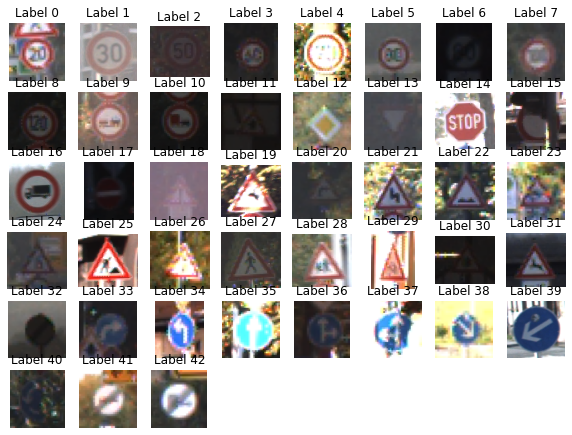

In [100]:
def display_traffic_images(images, labels):
    #Display one image from each set
    unique_labels = set(labels)
    plt.figure(figsize =(10,10))
    im_idx = 1
    for label in unique_labels:
        #Pick the image for each label.
        image = images[labels.index(label)]
        plt.subplot(8,8, im_idx)
        plt.axis("off")
        plt.title("Label {0}".format(label))
        im_idx= im_idx+1
        _=plt.imshow(image)
    plt.show()
    
display_traffic_images(X_train_list,y_train_list)

#### Histogram of the Images

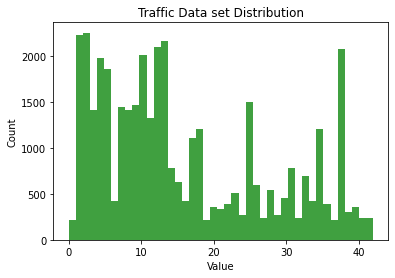

In [101]:
plt.hist(y_train_labels, bins=43,facecolor='green',linewidth=2, alpha=0.75)
plt.title ("Traffic Data set Distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

### Basic Input Parameters 

In [102]:
image_size = 32
num_labels = len(np.unique(y_train_labels))
num_channels = 1 

In [103]:
#Refomat the convolutions
def reformat(features, labels):
    features = features.reshape((-1,image_size,image_size,num_channels)).astype(np.float32)
    labels = (np.arange(num_labels)==labels[:,None]).astype(np.float32)
    return features, labels

In [104]:
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (31367, 32, 32, 1) (31367, 43)
Validation set (7842, 32, 32, 1) (7842, 43)
Test set (12630, 32, 32, 1) (12630, 43)


### Helper Functions for Calculating Accuracy, Loss

In [105]:
#Define Accuracy Function
def cal_accuracy(predictions, labels):
    accuracy = (100*np.sum(np.argmax(predictions,1)== np.argmax(labels,1))/predictions.shape[0])
    return accuracy

In [106]:
#Define Loss Function
def cal_loss(predictions,labels):
    loss = np.mean(np.square(predictions-labels))
    return loss

In [107]:
def plot_confusion_matrix(cm,title):
    cm = [row/sum(row)   for row in cm]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    title = title+' '+'Confusion Matrix'
    plt.title(title)
    plt.xlabel('Predicted Class IDs')
    plt.ylabel('True Class IDs')
    plt.show()

## Model 1 

In this simple model for classification I build the model with two convolution layers and 1 fully connected layer. I used 64 hidden units for the fully connected layer. 
I used a constant output filters or depth of 16 for both the convolution layers.
I did not use any regularization for optimizing the cost function.
A batch size of 128 was used for training the model.

In [108]:
batch_size =128
patch_size =5
depth =16
num_hidden =64

In [109]:
graph= tf.Graph()
with graph.as_default():
    
    #Define the placeholder
    x= tf.placeholder(tf.float32, shape=(None, image_size, image_size, num_channels), name='x')
    y= tf.placeholder(tf.float32, shape=(None,num_labels))
    
    train_x = tf.constant(train_dataset)
    valid_x = tf.constant(valid_dataset)
    test_x = tf.constant(test_dataset)
    
    #Define the weight variables
    l1_weight = tf.Variable(tf.truncated_normal([patch_size,patch_size,num_channels,depth],mean=0, stddev=0.1))
    
    l1_bias = tf.Variable(tf.zeros([depth]))
    
    #Layer 2
    l2_weight = tf.Variable(tf.truncated_normal([patch_size,patch_size,depth,depth],mean=0, stddev=0.1))
    
    l2_bias = tf.Variable(tf.constant(1.0, shape=[depth]))
    
    #Layer 3
    l3_weight = tf.Variable(tf.truncated_normal([image_size//4*image_size//4 * depth,num_hidden],mean=0, stddev=0.1))
    
    l3_bias = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    
    #Layer 4
    l4_weight = tf.Variable(tf.truncated_normal([num_hidden,num_labels],mean=0, stddev=0.1))
    l4_bias = tf.Variable(tf.constant(1.0,shape=[num_labels]))
    
    #Define Model
    def model(data):
        conv1 = tf.nn.conv2d(data,l1_weight,[1,2,2,1], padding="SAME")
        
        hidden1 = tf.nn.relu(conv1+l1_bias)
       
        conv2 = tf.nn.conv2d(hidden1, l2_weight,[1,2,2,1], padding="SAME")
        hidden2 = tf.nn.relu(conv2+l2_bias)
       
        shape = hidden2.get_shape().as_list()
        
   
        reshape = tf.reshape(hidden2,[-1, shape[1]*shape[2]*shape[3]])
        
       
        hidden3 = tf.nn.relu(tf.matmul(reshape,l3_weight)+l3_bias)
       
        out_layer = tf.matmul(hidden3,l4_weight) + l4_bias
        
        return out_layer
    
    
    #Training Computation
    logits = model(x)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = y)
    #loss = tf.reduce_mean(cross_entropy) +0.0001 *(tf.nn.l2_loss(layer1_weight)+tf.nn.l2_loss(layer2_weight)+tf.nn.l2_loss(layer3_weight)+tf.nn.l2_loss(layer4_weight))
    loss = tf.reduce_mean(cross_entropy)
    #Optimizer
    optimizer = tf.train.AdamOptimizer(1e-3).minimize(loss)
    
    #Prediction
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(valid_x))
    test_prediction = tf.nn.softmax(model(test_x))

Training Stared Simple Model
---------------------------
Minibatch loss at step 0: 4.707083
Minibatch accuracy: 3.1%
Validation accuracy: 2.6%
Minibatch loss at step 50: 3.150609
Minibatch accuracy: 18.0%
Validation accuracy: 17.5%
Minibatch loss at step 100: 2.429310
Minibatch accuracy: 35.9%
Validation accuracy: 33.5%
Minibatch loss at step 150: 1.783210
Minibatch accuracy: 52.3%
Validation accuracy: 52.5%
Minibatch loss at step 200: 1.330543
Minibatch accuracy: 67.2%
Validation accuracy: 62.9%
Minibatch loss at step 250: 0.986030
Minibatch accuracy: 70.3%
Validation accuracy: 71.9%
Minibatch loss at step 300: 0.759093
Minibatch accuracy: 82.0%
Validation accuracy: 79.3%
Minibatch loss at step 350: 0.562837
Minibatch accuracy: 89.8%
Validation accuracy: 82.6%
Minibatch loss at step 400: 0.475372
Minibatch accuracy: 88.3%
Validation accuracy: 84.5%
Minibatch loss at step 450: 0.519850
Minibatch accuracy: 87.5%
Validation accuracy: 85.0%
Minibatch loss at step 500: 0.411247
Minibatch a

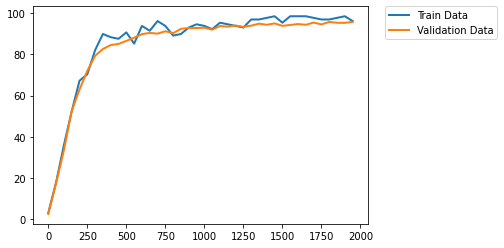

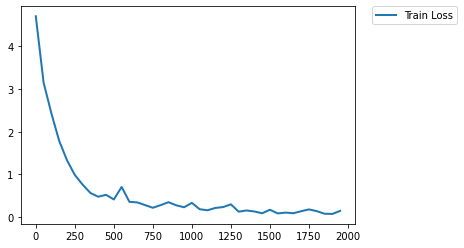

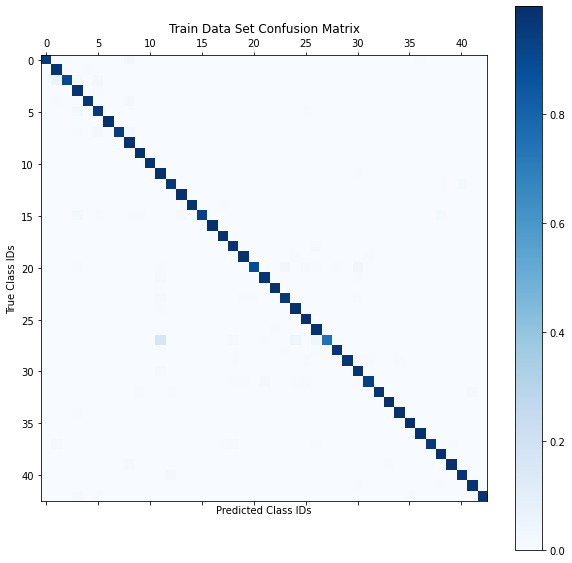

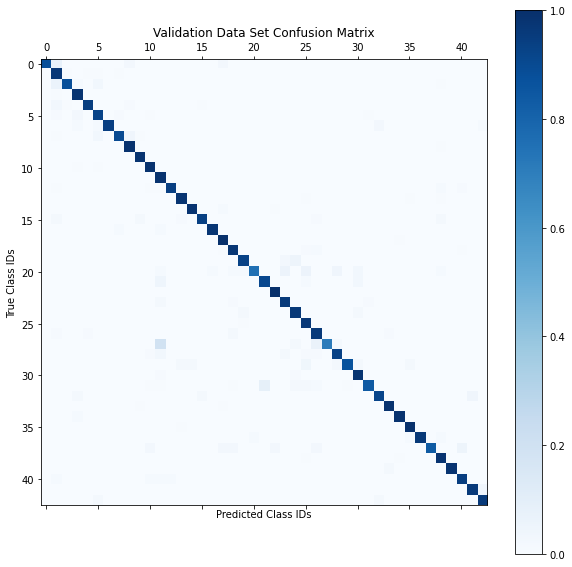

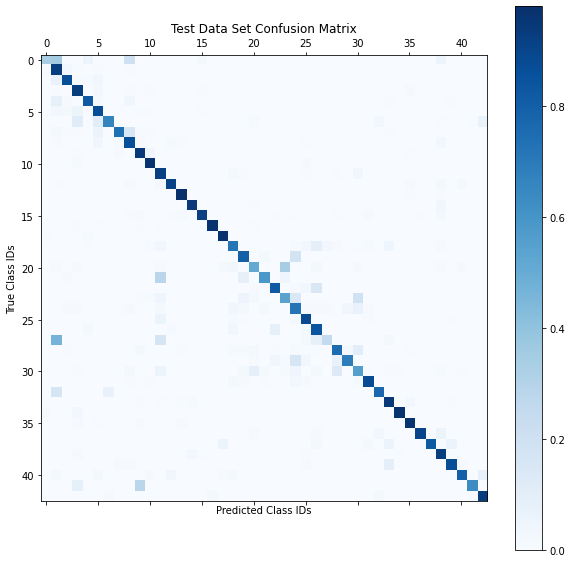

In [110]:
epochs = 2000

with tf.Session(graph=graph) as session:
    #tf.initialize_all_variables().run()
    session.run(tf.global_variables_initializer())
    print('Training Stared Simple Model')
    print ('---------------------------')
    train_acc_history = np.zeros(epochs)
    train_loss_history= np.zeros(epochs)
    valid_acc_history = np.zeros(epochs)
    
    for step in range(epochs):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        feed_dict = {x : batch_data, y : batch_labels}
        model_Network1, train_loss, predictions = session.run([optimizer, loss, train_prediction], 
                                                              feed_dict=feed_dict)
        if (step % 50 == 0):
            print('Minibatch loss at step %d: %f' % (step, train_loss))
            print('Minibatch accuracy: %.1f%%' % cal_accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % cal_accuracy(valid_prediction.eval(), valid_labels))
            train_acc_history[step] = cal_accuracy(predictions, batch_labels)
            valid_acc_history[step] = cal_accuracy(valid_prediction.eval(), valid_labels)
            train_loss_history[step] = train_loss
            
        
        #valid_pred = valid_prediction.eval()
    
    t_pred=(session.run([train_prediction],feed_dict={x:train_dataset,y:train_labels}))
    y_pred_train = np.argmax(t_pred[0],1)
    y_true_train = np.argmax(train_labels,1)
    cm_train = confusion_matrix(y_true_train,y_pred_train)
    
    
    y_pred_valid = (tf.argmax(valid_prediction.eval(), 1)).eval()
    y_true_valid = np.argmax(valid_labels, 1)
    cm_valid = confusion_matrix(y_true_valid, y_pred_valid)
    
    
    #test data set results
    y_pred_test = (tf.argmax(test_prediction.eval(), 1)).eval()
    y_true_test = np.argmax(test_labels, 1)
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    
    
    print('Train accuracy: %.1f%%' % cal_accuracy(t_pred[0], train_labels))
    print('valid accuracy: %.1f%%' % cal_accuracy(valid_prediction.eval(), valid_labels))
    print('Test accuracy: %.1f%%' % cal_accuracy(test_prediction.eval(), test_labels))
    
    
    
x_axis = np.arange(epochs)
plt.plot(x_axis[train_acc_history > 0], train_acc_history[train_acc_history > 0], linewidth=2, label= "Train Data")
plt.plot(x_axis[valid_acc_history > 0], valid_acc_history[valid_acc_history > 0],  linewidth=2, label= "Validation Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.plot(x_axis[train_loss_history > 0], train_loss_history[train_loss_history > 0],  linewidth=2, label= "Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Train Set Confusion Matrix
plot_confusion_matrix(cm_train,"Train Data Set")
dm_cm_train= pd.DataFrame(cm_train)
    
#Validation Set Confusion Matrix
dm_cm_valid= pd.DataFrame(cm_valid)
plot_confusion_matrix(cm_valid,"Validation Data Set")
    
#Test Set Confusion Matrix
dm_cm_test= pd.DataFrame(cm_test)
plot_confusion_matrix(cm_test,"Test Data Set")

#Calculate Precision, Recall and F1 Score for the test data
TP_test = np.diagonal(cm_test)
precision = TP_test/np.sum(cm_test, axis=1)
recall = TP_test/np.sum(cm_test, axis=0)
f1_score = 2*precision*recall/(precision+recall)



In [111]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix


#### Precision, Recall and F1 Scores for all classes 

In [112]:
report_model1 = classification_report(y_true_test, y_pred_test)
print (report_model1)

              precision    recall  f1-score   support

           0       0.67      0.33      0.44        60
           1       0.77      0.93      0.84       720
           2       0.94      0.87      0.90       750
           3       0.81      0.93      0.86       450
           4       0.95      0.82      0.88       660
           5       0.83      0.87      0.85       630
           6       0.93      0.66      0.77       150
           7       0.94      0.74      0.83       450
           8       0.75      0.86      0.80       450
           9       0.91      0.94      0.93       480
          10       0.94      0.96      0.95       660
          11       0.78      0.92      0.84       420
          12       0.98      0.91      0.94       690
          13       0.98      0.98      0.98       720
          14       0.93      0.94      0.93       270
          15       0.92      0.92      0.92       210
          16       0.99      0.97      0.98       150
          17       0.97    

#### Macro Averaging of Precision, Recall and F1 Scores

In [113]:
from sklearn.metrics import f1_score
f1_score_macro = f1_score(y_true_test, y_pred_test, average="macro")
precision_macro =precision_score(y_true_test, y_pred_test, average="macro")
recall_macro =recall_score(y_true_test, y_pred_test, average="macro")
df_macro = pd.DataFrame({'Precision':[precision_macro],'Recall':[recall_macro],'f1 score':[f1_score_macro]})
df_macro.round(2)

,Precision,Recall,f1 score
0,0.83,0.8,0.81


#### Micro Averaging of Precision, Recall and F1 Scores

In [114]:
f1_score_micro = f1_score(y_true_test, y_pred_test, average="micro")
precision_micro =precision_score(y_true_test, y_pred_test, average="micro")
recall_micro =recall_score(y_true_test, y_pred_test, average="micro")
df_micro = pd.DataFrame({'Precision':[precision_micro],'Recall':[recall_micro],'f1 score':[f1_score_micro]})
df_micro.round(2)

,Precision,Recall,f1 score
0,0.87,0.87,0.87


#### Weighted Averaging of Precision, Recall and F1 Scores 

In [115]:
f1_score_weighted = f1_score(y_true_test, y_pred_test, average="weighted")
precision_weighted =precision_score(y_true_test, y_pred_test, average="weighted")
recall_weighted =recall_score(y_true_test, y_pred_test, average="weighted")
df_weighted = pd.DataFrame({'Precision':[precision_weighted],'Recall':[recall_weighted],'f1 score':[f1_score_weighted]})
df_weighted.round(2)

,Precision,Recall,f1 score
0,0.87,0.87,0.87


## Model 2 Architecture

In this model we build a more detailed CNN. This architecture is very similar to the LENET architecture. In this model I have implemented the drop out and added L2 regularization so to improve accuracy of the model and also prevent over fitting.

In [119]:
batch_size = 128
patch_size = 5
depth = 16
num_hidden = 256
beta_regul = 1e-4
drop_out = 0.5

graph = tf.Graph()

with graph.as_default():

    # Input data.
    x_train_dataset = tf.placeholder(tf.float32, shape=(None, image_size, image_size, num_channels))
    y_train_labels = tf.placeholder(tf.float32, shape=(None, num_labels))
    
    train_x = tf.constant(train_dataset)
    x_valid_dataset = tf.constant(valid_dataset)
    x_test_dataset = tf.constant(test_dataset)
    global_step = tf.Variable(0)
  
    # Variables.
    l1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth], stddev=0.1))
    l1_biases = tf.Variable(tf.zeros([depth]))
    
    l2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth, 2*depth], stddev=0.1))
    l2_biases = tf.Variable(tf.constant(1.0, shape=[2*depth]))
  
    #Size for the next layer
    size3 = ((image_size - patch_size + 1) // 2 - patch_size + 1) // 2
  
    l3_weights = tf.Variable(tf.truncated_normal([2*size3 * size3 * depth, num_hidden], stddev=0.1))
    l3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    #print ("This is layer3", layer3_weights)
    l4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_hidden], stddev=0.1))
    l4_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    
    l5_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
    l5_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
    # Model.
    def modelCNN(data, keep_prob):
        # C1 input 28 x 28
        conv1 = tf.nn.conv2d(data, l1_weights, [1, 1, 1, 1], padding='VALID')
        #bias1 = tf.nn.relu(conv1 + l1_biases)
        conv1 = tf.nn.relu(conv1 + l1_biases)
                     
        pool2 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        
        # C3 input 12 x 12
        conv3 = tf.nn.conv2d(pool2, l2_weights, [1, 1, 1, 1], padding='VALID')
        conv3 = tf.nn.relu(conv3 + l2_biases)
        
        # S4 input 8 x 8
        pool4 = tf.nn.max_pool(conv3, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        
        # F5 input 4 x 4
        shape = pool4.get_shape().as_list()
        pool_flat = tf.keras.layers.Flatten()(pool4)
        fc5 = tf.nn.relu(tf.matmul(pool_flat, l3_weights) + l3_biases)
    
        drop5 = tf.nn.dropout(fc5, keep_prob)
    
        fc6 = tf.nn.relu(tf.matmul(fc5, l4_weights) + l4_biases)
        
        drop6 = tf.nn.dropout(fc6, keep_prob)
        out_layer = tf.matmul(drop6, l5_weights) + l5_biases
        
        return out_layer
  
    # Training computation.
    logits = modelCNN(x_train_dataset, drop_out)
      
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_train_labels)+
                       0.0001*(tf.nn.l2_loss(l1_weights)+tf.nn.l2_loss(l2_weights)+
                               tf.nn.l2_loss(l3_weights)+tf.nn.l2_loss(l4_weights)+ 
                               tf.nn.l2_loss(l5_weights)))
    
    # Optimizer.
    learning_rate = tf.train.exponential_decay(0.05, global_step, 1000, 0.90, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(modelCNN(x_valid_dataset, 1.0))
    test_prediction = tf.nn.softmax(modelCNN(x_test_dataset, 1.0))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Training Started
---------------------------
Minibatch loss at step 0: 16.657789
Minibatch accuracy: 2.3%
Validation accuracy: 5.7%
Minibatch loss at step 50: 3.380351
Minibatch accuracy: 19.5%
Validation accuracy: 16.3%
Minibatch loss at step 100: 2.700448
Minibatch accuracy: 32.0%
Validation accuracy: 37.4%
Minibatch loss at step 150: 2.109162
Minibatch accuracy: 46.1%
Validation accuracy: 51.7%
Minibatch loss at step 200: 1.766791
Minibatch accuracy: 49.2%
Validation accuracy: 64.8%
Minibatch loss at step 250: 1.428915
Minibatch accuracy: 65.6%
Validation accuracy: 69.0%
Minibatch loss at step 300: 1.212901
Minibatch accuracy: 68.8%
Validation accuracy: 79.0%
Minibatch loss at step 350: 0.823362
Minibatch accuracy: 76.6%
Validation accuracy: 84.7%
Minibatch loss at step 400: 0.925393
Minibatch accuracy: 75.8%
Validation accuracy: 80.9%
Minibatch loss at step 450: 0.792966
Minibatch accuracy: 82.0%
Validation accuracy: 89.0%
Minibatch loss at step 500: 0.743094
Minibatch accuracy: 81

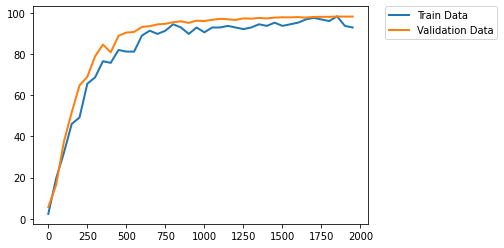

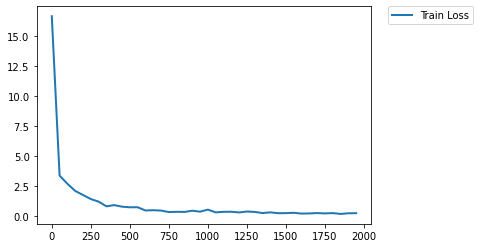

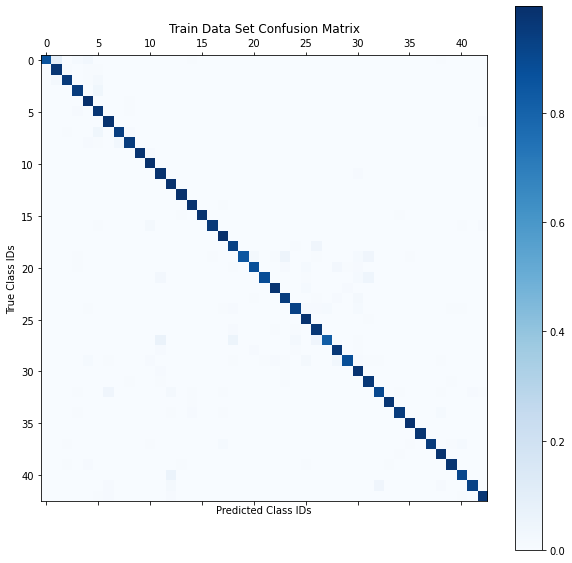

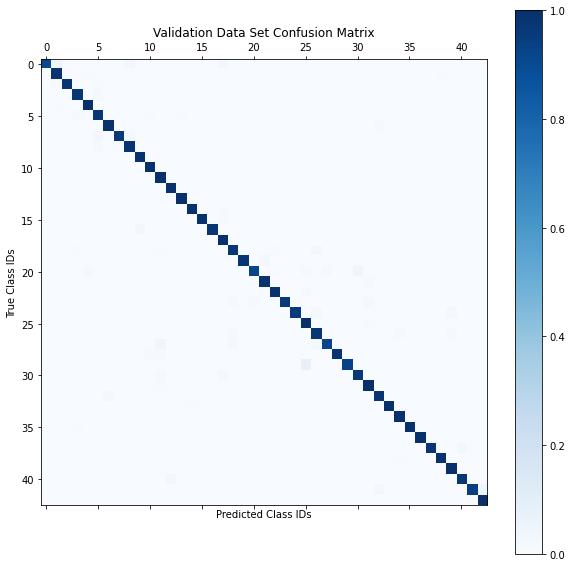

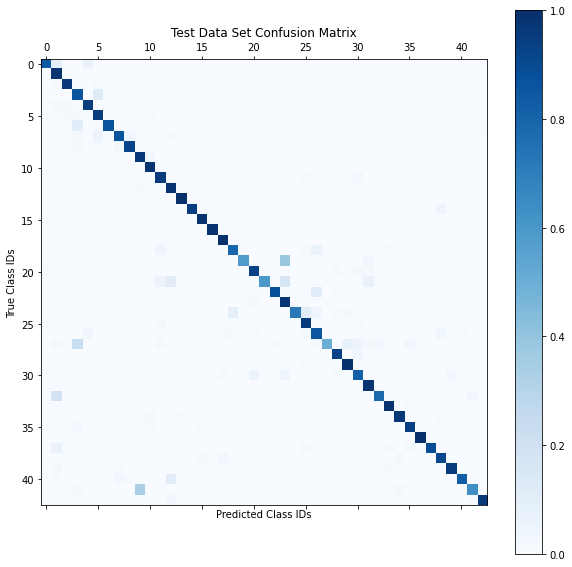

In [120]:
epochs = 2000

with tf.Session(graph=graph) as session:
    saver = tf.train.Saver()
    session.run(tf.global_variables_initializer())
    print('Training Started')
    print ('---------------------------')
    train_acc_history = np.zeros(epochs)
    train_loss_history= np.zeros(epochs)
    valid_acc_history = np.zeros(epochs)
    for step in range(epochs):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        feed_dict = {x_train_dataset : batch_data, y_train_labels : batch_labels}
        model3, train_loss, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 50 == 0):
            print('Minibatch loss at step %d: %f' % (step, train_loss))
            print('Minibatch accuracy: %.1f%%' % cal_accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % cal_accuracy(valid_prediction.eval(), valid_labels))
            train_acc_history[step] = cal_accuracy(predictions, batch_labels)
            valid_acc_history[step] = cal_accuracy(valid_prediction.eval(), valid_labels)
            train_loss_history[step] = train_loss
            
    t_pred=(session.run([train_prediction],feed_dict={x_train_dataset:train_dataset,y_train_labels:train_labels}))
    y_pred_train = np.argmax(t_pred[0],1)
    y_true_train = np.argmax(train_labels,1)
    cm_train = confusion_matrix(y_true_train,y_pred_train)
   
    
    #Valid Data Set Results
    y_pred_valid = (tf.argmax(valid_prediction.eval(), 1)).eval()
    y_true_valid = np.argmax(valid_labels, 1)
    cm_valid = confusion_matrix(y_true_valid, y_pred_valid)
    
    
    
    #Test Results
    y_pred_test = (tf.argmax(test_prediction.eval(), 1)).eval()
    y_true_test = np.argmax(test_labels, 1)
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    
    
    print('Train accuracy: %.1f%%' % cal_accuracy(t_pred[0], train_labels))
    print('valid accuracy: %.1f%%' % cal_accuracy(valid_prediction.eval(), valid_labels))
    print('Test accuracy: %.1f%%' % cal_accuracy(test_prediction.eval(), test_labels))
    saver.save(session, 'Save_Model\model_final.ckpt')
    print("Model saved")
x_axis = np.arange(epochs)
plt.plot(x_axis[train_acc_history > 0], train_acc_history[train_acc_history > 0], linewidth=2, label= "Train Data")
plt.plot(x_axis[valid_acc_history > 0], valid_acc_history[valid_acc_history > 0],  linewidth=2, label= "Validation Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.plot(x_axis[train_loss_history > 0], train_loss_history[train_loss_history > 0],  linewidth=2, label= "Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Train Set Confusion Matrix
plot_confusion_matrix(cm_train,"Train Data Set")
dm_cm_train= pd.DataFrame(cm_train)
    
#Validation Set Confusion Matrix
dm_cm_valid= pd.DataFrame(cm_valid)
plot_confusion_matrix(cm_valid,"Validation Data Set")
    
#Test Set Confusion Matrix
dm_cm_test= pd.DataFrame(cm_test)
plot_confusion_matrix(cm_test,"Test Data Set")

#Calculate Precision, Recall and F1 Score for the test data
TP_test = np.diagonal(cm_test)
precision = TP_test/np.sum(cm_test, axis=1)
recall = TP_test/np.sum(cm_test, axis=0)
f1_score = 2*precision*recall/(precision+recall)


   

#### Precision, Recall and F1 Scores for all classes 

In [121]:
report_model2 = classification_report(y_true_test, y_pred_test)
print (report_model2)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        60
           1       0.93      0.98      0.95       720
           2       0.97      0.96      0.96       750
           3       0.85      0.86      0.85       450
           4       0.96      0.95      0.95       660
           5       0.86      0.95      0.90       630
           6       0.96      0.87      0.91       150
           7       0.94      0.87      0.90       450
           8       0.94      0.92      0.93       450
           9       0.94      0.96      0.95       480
          10       0.95      0.98      0.97       660
          11       0.91      0.95      0.93       420
          12       0.95      0.98      0.97       690
          13       0.98      0.99      0.99       720
          14       0.97      0.94      0.96       270
          15       0.90      0.99      0.94       210
          16       1.00      0.98      0.99       150
          17       0.92    

#### Macro Averaging of Precision, Recall and F1 Scores

In [122]:
from sklearn.metrics import f1_score
f1_score_macro = f1_score(y_true_test, y_pred_test, average="macro")
precision_macro =precision_score(y_true_test, y_pred_test, average="macro")
recall_macro =recall_score(y_true_test, y_pred_test, average="macro")
df_macro = pd.DataFrame({'Precision':[precision_macro],'Recall':[recall_macro],'f1 score':[f1_score_macro]})
df_macro.round(2)

,Precision,Recall,f1 score
0,0.93,0.89,0.9


#### Micro Averaging of Precision, Recall and F1 Scores 

In [123]:
from sklearn.metrics import f1_score
f1_score_micro = f1_score(y_true_test, y_pred_test, average="micro")
precision_micro =precision_score(y_true_test, y_pred_test, average="micro")
recall_micro =recall_score(y_true_test, y_pred_test, average="micro")
df_micro = pd.DataFrame({'Precision':[precision_micro],'Recall':[recall_micro],'f1 score':[f1_score_micro]})
df_micro.round(2)

,Precision,Recall,f1 score
0,0.93,0.93,0.93


#### Weighted Averaging of Precision, Recall and F1 Scores

In [124]:
f1_score_weighted = f1_score(y_true_test, y_pred_test, average="weighted")
precision_weighted =precision_score(y_true_test, y_pred_test, average="weighted")
recall_weighted =recall_score(y_true_test, y_pred_test, average="weighted")
df_weighted = pd.DataFrame({'Precision':[precision_weighted],'Recall':[recall_weighted],'f1 score':[f1_score_weighted]})
df_weighted.round(2)

,Precision,Recall,f1 score
0,0.93,0.93,0.93


# Test Model on New Images

After training the model I used the model to classify new images downloaded from the internet.

import os
new_data_dir = "New_Data"
directories =os.listdir(new_data_dir)
file_names = directories[:6]

images_new=[]

file_path = new_data_dir+ '/*.png'
#for i in traffic_classes:
for file_name in glob.glob(file_path):
     
    images_new.append(skimage.data.imread(file_name))



In [36]:
new_data= [file for file in glob.glob("New_Data/*.png")]

In [37]:
images_test=[]
for file in new_data:
    image = plt.imread(file)
    image = image.astype(np.float32)
    images_test.append(image)

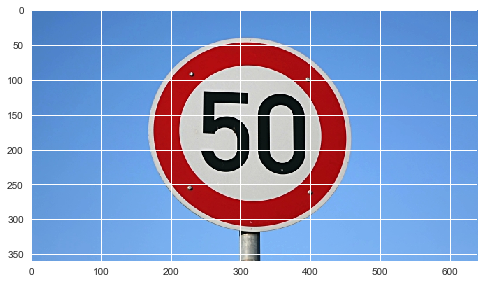

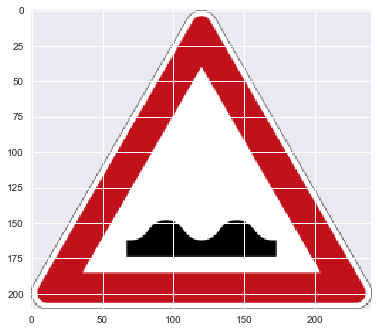

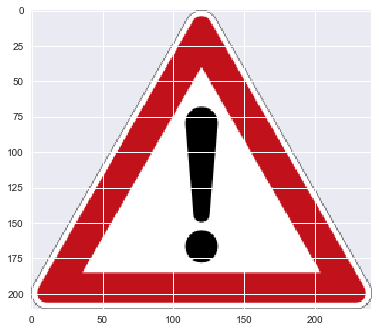

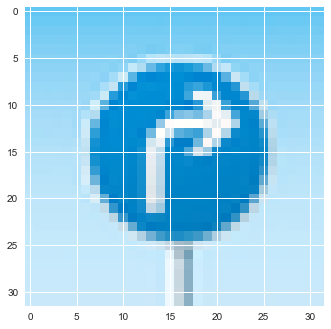

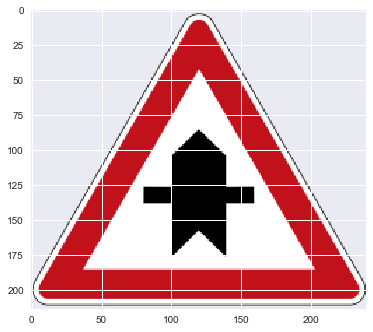

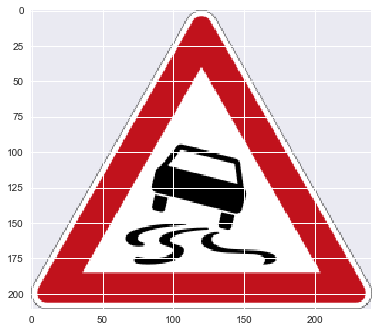

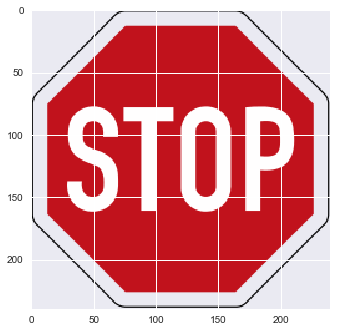

In [38]:
for image in images_test:
    plt.imshow(image)
    plt.show()

In [39]:
#Resize and normalize
image_resize=[]
for image in images_test:
    image = cv2.resize(image,(32,32))
    image = np.mean(image,axis=2)
    image -=np.mean(image)
    image /= np.std(image)
    
    image_resize.append(image)

image_norm = np.array(image_resize)

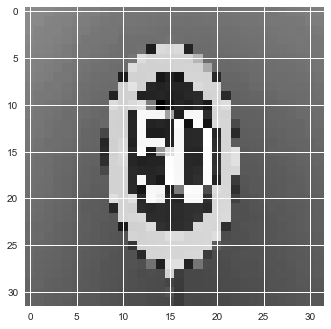

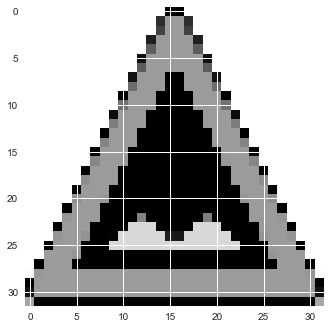

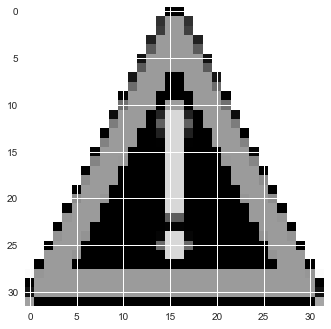

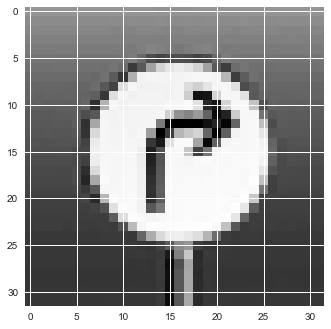

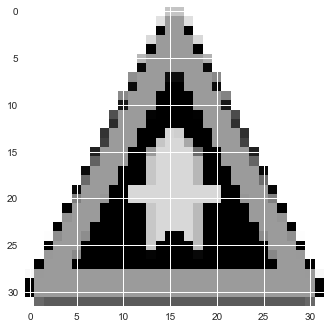

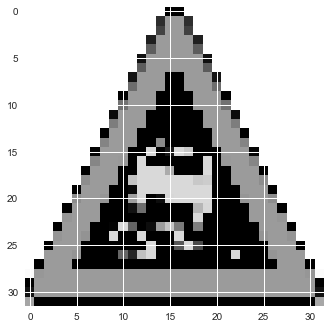

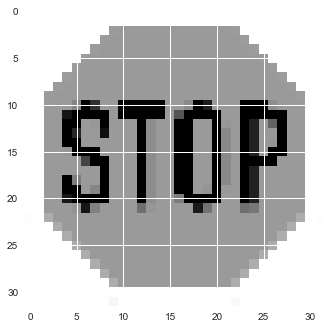

In [40]:
for image in image_norm:
    plt.imshow(image)
    plt.show()

In [41]:
#Manually Label the images
y_collected = np.array([2,22, 18, 33,11, 23, 14])

In [42]:
x_new_cnn, y_new = reformat(image_norm, y_collected)

In [43]:

with tf.Session(graph=graph) as session:
    saver.restore(session, 'Save_Model\model_final.ckpt')
    classes = session.run(logits, feed_dict={x_train_dataset:x_new_cnn})
    print (classes.shape)
    output = session.run(tf.nn.top_k(tf.constant(classes), k=5))
    for i in range(len(output[0])):
        print('Image', i, output[0][i], 'and output', output[1][i])
    

(7, 43)
Image 0 [ 29.49888229  21.80272102  19.48609161  17.92178917  16.32008553] and output [2 1 7 3 5]
Image 1 [ 20.69504166  20.18960762  19.14031219  17.33232689  15.21952629] and output [22 26 18 29 25]
Image 2 [ 28.65303802  19.96107101  15.46544266  15.22623634  14.03529072] and output [18 26 27 24 40]
Image 3 [ 38.10641861  18.90814781  18.72649193  16.5335598   11.5761776 ] and output [33 11 16 32 35]
Image 4 [ 23.640131    18.19000244  16.04700279  13.67135715  13.56851292] and output [11 30 28  1 24]
Image 5 [ 30.04604912  20.33771706  18.88495827  17.43384552  15.70975876] and output [23 30 11 21 19]
Image 6 [ 10.43318748  10.14661407   8.40258884   8.34756756   7.91613865] and output [13  2 15 25 38]


In [44]:
y_collected

array([ 2, 22, 18, 33, 11, 23, 14])

In [45]:
y_predicted =output[1][:,0]

In [46]:
y_predicted

array([ 2, 22, 18, 33, 11, 23, 13])

In [47]:
output[1]

array([[ 2,  1,  7,  3,  5],
       [22, 26, 18, 29, 25],
       [18, 26, 27, 24, 40],
       [33, 11, 16, 32, 35],
       [11, 30, 28,  1, 24],
       [23, 30, 11, 21, 19],
       [13,  2, 15, 25, 38]])

In [48]:
new_data_accuracy= accuracy_score(y_collected,y_predicted)

In [50]:
print ("New Test Data Accuracy: %0.2f"%new_data_accuracy)

New Test Data Accuracy 0.86
